In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd

In [2]:
from PIL import Image
import numpy as np
import sys
import os
import csv

# Function to create a list of files, labels, and names
def createFileList(myDir, format='.jpg'):
    fileList = []
    labels = []
    names = []
    for root, dirs, files in os.walk(myDir, topdown=True):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
                # Infer the class based on the file name
                if name.lower().startswith('healthy'):
                    labels.append('0')
                elif name.lower().startswith('unhealthy'):
                    labels.append('1')
                else:
                    labels.append('-1')  # A placeholder value for files with unknown class
                names.append(name)
    return fileList, labels, names

# Function to reduce the dimensions of the image
def reduce_dimensions(image_path, new_width=100, new_height=100):
    img = Image.open(image_path)
    img = img.resize((new_width, new_height))
    return img

# Directory where the images are located
image_dir = 'D:\sem7\project\Rice_Seed_Dataset'

# Create a list of files, labels, and names
myFileList, labels, names = createFileList(image_dir, '.jpg')

# Loop through each file in the list
i = 0
for file in myFileList:
    print(file)

    # Reduce the dimensions of the image while keeping 3 color channels
    reduced_img = reduce_dimensions(file, new_width=100, new_height=100)

    # Continue with the rest of your code...
    width, height = reduced_img.size
    format = reduced_img.format
    mode = reduced_img.mode

    # Convert to numpy array while keeping 3 channels
    value = np.array(reduced_img).reshape((width, height, 3))

    # Flatten the array and append the label
    value = value.flatten()
    value = np.append(value, labels[i])
    i += 1

    print(value)
    with open("finalproj.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)


D:\sem7\project\Rice_Seed_Dataset\Healthy_Images\healthy (193).jpg
['113' '161' '80' ... '180' '132' '0']
D:\sem7\project\Rice_Seed_Dataset\Healthy_Images\healthy (194).jpg
['187' '165' '126' ... '112' '64' '0']
D:\sem7\project\Rice_Seed_Dataset\Healthy_Images\healthy (195).jpg
['132' '130' '97' ... '71' '23' '0']
D:\sem7\project\Rice_Seed_Dataset\Healthy_Images\healthy (196).jpg
['246' '244' '251' ... '122' '93' '0']
D:\sem7\project\Rice_Seed_Dataset\Healthy_Images\healthy (197).jpg
['203' '201' '173' ... '229' '214' '0']
D:\sem7\project\Rice_Seed_Dataset\Healthy_Images\healthy (198).jpg
['98' '122' '60' ... '69' '14' '0']
D:\sem7\project\Rice_Seed_Dataset\Healthy_Images\healthy (199).jpg
['93' '134' '69' ... '96' '42' '0']
D:\sem7\project\Rice_Seed_Dataset\Healthy_Images\healthy (200).jpg
['27' '66' '14' ... '95' '41' '0']
D:\sem7\project\Rice_Seed_Dataset\Healthy_Images\healthy (201).jpg
['126' '177' '73' ... '143' '66' '0']
D:\sem7\project\Rice_Seed_Dataset\Healthy_Images\healthy (

In [3]:
df=pd.read_csv('finalproj.csv')

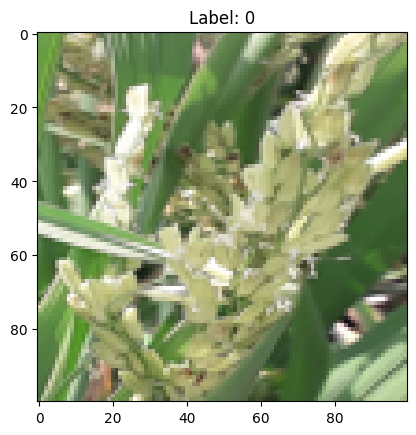

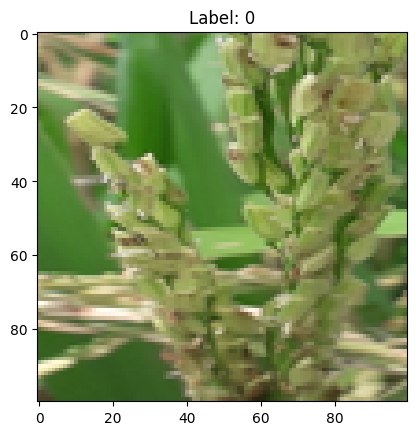

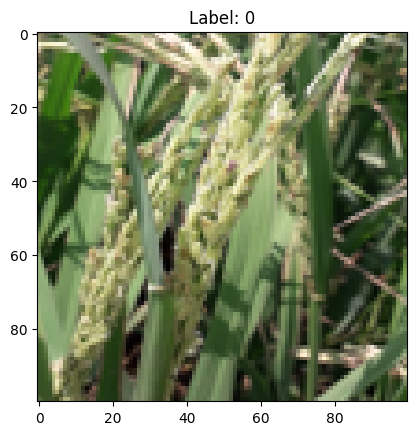

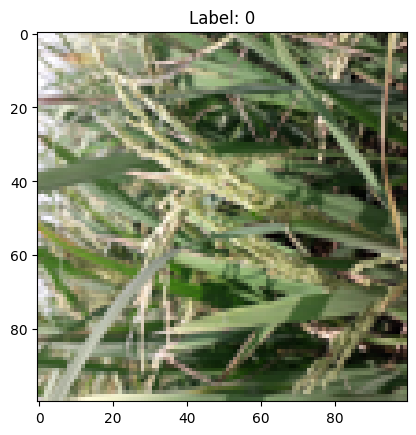

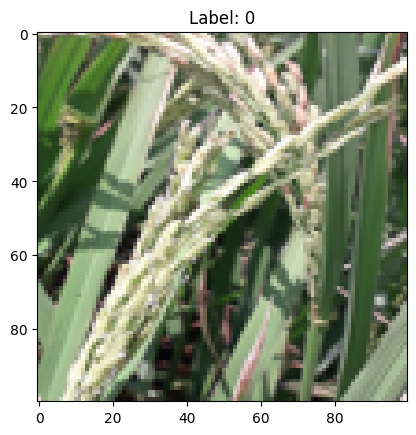

In [4]:
import numpy as np
import csv
from PIL import Image
import matplotlib.pyplot as plt

# Load data from the CSV file
csv_file = 'finalproj.csv'
data = np.loadtxt(csv_file, delimiter=',')

# Extract image data and labels
images = data[:, :-1]
labels = data[:, -1]

# Choose how many images you want to display
num_images_to_display = 5

# Loop through and display some images
for i in range(num_images_to_display):
    # Reshape the flattened image data to its original shape
    image_shape = (100, 100 , 3)  # Change this based on your image dimensions
    img_data = images[i, :].reshape(image_shape)

    # Convert to PIL image for display
    img = Image.fromarray(img_data.astype(np.uint8))

    # Display the image with its label
    plt.imshow(img, cmap='gray')  # Assuming images are grayscale
    plt.title(f"Label: {int(labels[i])}")
    plt.show()


In [5]:
pip install seaborn

In [6]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [7]:
BATCH_SIZE = 32
IMG_SIZE = (100,100,3)


In [136]:
class_names= ["healthy" ,"Unhealthy"]

In [8]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split

# Load data from the CSV file
csv_file = 'Finalproj.csv'
data = np.loadtxt(csv_file, delimiter=',')

# Extract features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

image_shape = (100, 100, 3)
X = X.reshape(-1, *image_shape).astype(np.uint8)

# Reshape y to a column vector if it's a 1D array
y = y.reshape(-1, 1)

# Split the data into training and testing sets
test_size = 0.3  # You can adjust the test size as needed
random_state = 42  # Set a seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Print the shape of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2289, 100, 100, 3)
y_train shape: (2289, 1)
X_test shape: (981, 100, 100, 3)
y_test shape: (981, 1)


In [9]:
IMG_SHAPE = IMG_SIZE +(3,)

In [10]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(100,100,3),include_top=False,weights='imagenet')

In [11]:
from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid" , name="classification"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 3, 3, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 1)                 5

In [13]:
nb_layers = len(model.layers)
print("Numbers of Layers =" , nb_layers)
print(model.layers[nb_layers - 2].name)  # pre- Last name
print(model.layers[nb_layers - 1].name)  # Last Layer name
# Last two layers are called top layers (Classification)


Numbers of Layers = 6
dense_1
classification


In [14]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train, verbose=2 , epochs=10 , validation_data=(X_test,y_test))

Epoch 1/10


72/72 - 40s - loss: 0.3009 - accuracy: 0.8947 - val_loss: 1.9916 - val_accuracy: 0.7482 - 40s/epoch - 550ms/step
Epoch 2/10
72/72 - 28s - loss: 0.0469 - accuracy: 0.9865 - val_loss: 0.2560 - val_accuracy: 0.9715 - 28s/epoch - 383ms/step
Epoch 3/10
72/72 - 31s - loss: 0.0846 - accuracy: 0.9738 - val_loss: 0.3236 - val_accuracy: 0.9460 - 31s/epoch - 427ms/step
Epoch 4/10
72/72 - 29s - loss: 0.0387 - accuracy: 0.9856 - val_loss: 0.0321 - val_accuracy: 0.9857 - 29s/epoch - 405ms/step
Epoch 5/10
72/72 - 30s - loss: 0.0397 - accuracy: 0.9900 - val_loss: 0.0957 - val_accuracy: 0.9674 - 30s/epoch - 410ms/step
Epoch 6/10
72/72 - 29s - loss: 0.0340 - accuracy: 0.9891 - val_loss: 0.0184 - val_accuracy: 0.9898 - 29s/epoch - 397ms/step
Epoch 7/10
72/72 - 28s - loss: 0.0475 - accuracy: 0.9873 - val_loss: 0.1179 - val_accuracy: 0.9664 - 28s/epoch - 386ms/step
Epoch 8/10
72/72 - 29s - loss: 0.0427 - accuracy: 0.9851 - val_loss: 0.0306 - val_accuracy: 0.9969 - 29s/epoch - 404ms/step
Epoch 

In [16]:
model.evaluate(X_test,y_test)

31/31 [==============================] - 3s 102ms/step - loss: 0.1691 - accuracy: 0.9694


[0.16907618939876556, 0.9694189429283142]

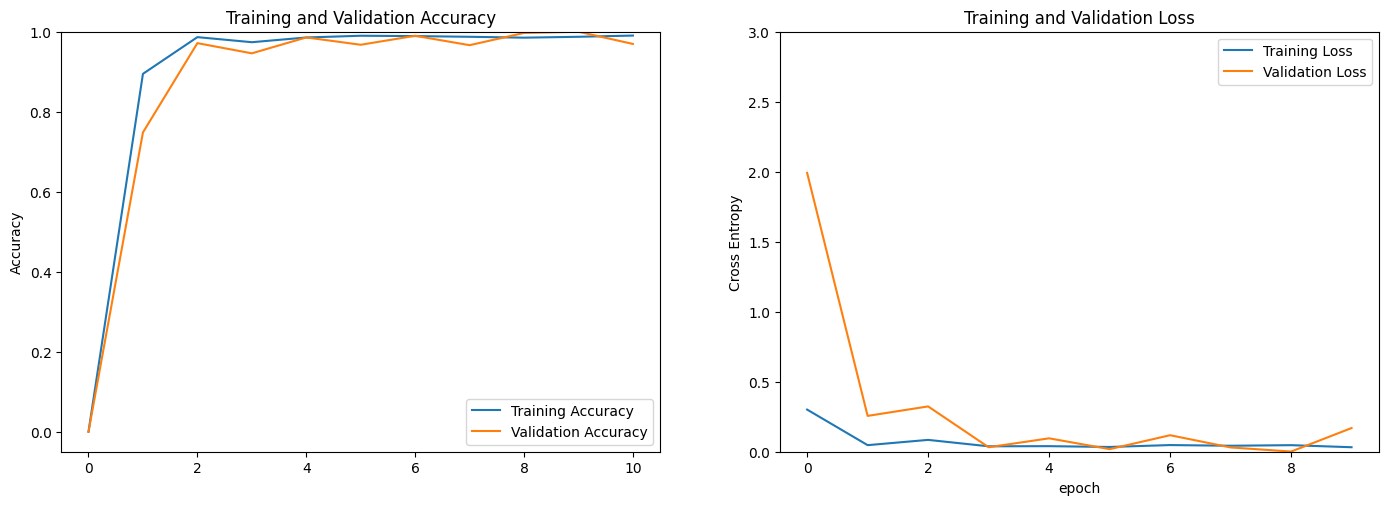

In [17]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

true_labels = y_test
predictions = model.predict(X_test)
predicted_labels = np.round(predictions)

precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

31/31 [==============================] - 4s 102ms/step
Precision: 0.9953596287703016
Recall: 0.9387308533916849
F1-score: 0.9662162162162162

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       524
         1.0       1.00      0.94      0.97       457

    accuracy                           0.97       981
   macro avg       0.97      0.97      0.97       981
weighted avg       0.97      0.97      0.97       981



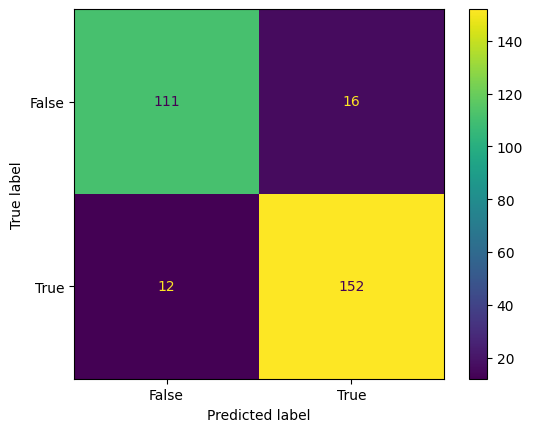

In [148]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [19]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input
from keras.callbacks import EarlyStopping
from keras.callbacks import EarlyStopping
from time import time
from sklearn import datasets
%matplotlib inline

In [20]:
def MOBINET(optimizer,neurons,batch_size,epochs,activation,patience):
    model = Sequential()
    model.add(mobilenet)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid' , name="classification"))
    model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor="loss", patience = patience)
    history = model.fit(X_train, y_train, epochs=epochs, callbacks = [early_stopping],batch_size=batch_size,verbose=1)
    return model

In [151]:
MOBINET(optimizer='adam',neurons=512,batch_size=32,epochs=10,activation='sigmoid',patience=5)

Epoch 1/10
22/22 [==============================] - 19s 311ms/step - loss: 0.1458 - accuracy: 0.9543
Epoch 2/10
22/22 [==============================] - 6s 294ms/step - loss: 0.1644 - accuracy: 0.9455
Epoch 3/10
22/22 [==============================] - 7s 296ms/step - loss: 0.1060 - accuracy: 0.9632
Epoch 4/10
22/22 [==============================] - 7s 294ms/step - loss: 0.1216 - accuracy: 0.9632
Epoch 5/10
22/22 [==============================] - 6s 288ms/step - loss: 0.0435 - accuracy: 0.9867
Epoch 6/10
22/22 [==============================] - 6s 293ms/step - loss: 0.0569 - accuracy: 0.9882
Epoch 7/10
22/22 [==============================] - 6s 290ms/step - loss: 0.0653 - accuracy: 0.9750
Epoch 8/10
22/22 [==============================] - 6s 288ms/step - loss: 0.0888 - accuracy: 0.9779
Epoch 9/10
22/22 [==============================] - 7s 311ms/step - loss: 0.0479 - accuracy: 0.9882
Epoch 10/10
22/22 [==============================] - 7s 298ms/step - loss: 0.0203 - accuracy: 0.992

In [21]:
mobinet_example_model = MOBINET(
    optimizer='adam',neurons=256, batch_size=32, epochs=5, activation='sigmoid',patience=19
)

Epoch 1/5
72/72 [==============================] - 33s 318ms/step - loss: 0.0712 - accuracy: 0.9812
Epoch 2/5
72/72 [==============================] - 28s 388ms/step - loss: 0.0369 - accuracy: 0.9865
Epoch 3/5
72/72 [==============================] - 28s 383ms/step - loss: 0.0486 - accuracy: 0.9878
Epoch 4/5
72/72 [==============================] - 29s 409ms/step - loss: 0.0104 - accuracy: 0.9978
Epoch 5/5
72/72 [==============================] - 28s 392ms/step - loss: 0.0502 - accuracy: 0.9825


In [22]:
mobinet_example_model.evaluate(X_test,y_test)

31/31 [==============================] - 4s 90ms/step - loss: 0.0585 - accuracy: 0.9878


[0.05850262567400932, 0.9877675771713257]

In [ ]:
from skopt import BayesSearchCV
from time import time
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from xlsxwriter import Workbook

# Assuming you have a function CNN defined for your Keras model

# Define the parameter search space
rf_params = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh','leaky_relu','sigmoid','softmax'],
    'batch_size': (16,32, 64),  # Adjust based on your preference
    'neurons': (16, 32,64,128,256,512),
    'epochs': (10,),
    'patience': (3, 20)
}

# Create a KerasClassifier instance
clf = KerasClassifier(build_fn=MOBINET, verbose=0)

# Create a BayesSearchCV instance
ga1 = BayesSearchCV(
    estimator=clf,
    search_spaces=rf_params,
    scoring="accuracy",
    cv=10,
    verbose=1,
    n_iter=5,  # Number of evaluations
    n_jobs=1
)

results = []

for i in range(10):  # Iterate over different runs
    start = time()
    ga1.fit(X_train, y_train)
    end = time()

    # Calculate precision, recall, and F1 score
    y_pred = ga1.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    result = {
        'Hyperparameters': ga1.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Time taken (s)': end - start
    }
    results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Write results to Excel
with pd.ExcelWriter('parameter_search_results.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Results', index=False)


Fitting 10 folds for each of 1 candidates, totalling 10 fits


/tmp/ipykernel_15377/438295254.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=MOBINET, verbose=0)


Epoch 1/30
22/22 [==============================] - 5s 141ms/step - loss: 0.0824 - accuracy: 0.9661
Epoch 2/30
22/22 [==============================] - 3s 143ms/step - loss: 0.0572 - accuracy: 0.9853
Epoch 3/30
22/22 [==============================] - 3s 143ms/step - loss: 0.0257 - accuracy: 0.9897
Epoch 4/30
22/22 [==============================] - 3s 142ms/step - loss: 0.0320 - accuracy: 0.9897
Epoch 5/30
22/22 [==============================] - 3s 140ms/step - loss: 0.0393 - accuracy: 0.9867
Epoch 6/30
22/22 [==============================] - 3s 142ms/step - loss: 0.0467 - accuracy: 0.9853
Epoch 7/30
22/22 [==============================] - 3s 145ms/step - loss: 0.0071 - accuracy: 0.9971
Epoch 8/30
22/22 [==============================] - 3s 146ms/step - loss: 0.0245 - accuracy: 0.9912
Epoch 9/30
22/22 [==============================] - 3s 140ms/step - loss: 0.0279 - accuracy: 0.9926
Epoch 10/30
22/22 [==============================] - 3s 141ms/step - loss: 0.0109 - accuracy: 0.9956

KeyboardInterrupt: 

In [ ]:
import math
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))
total = end-start
seconds = int(total % 60)
minutes = int((total//60)%60)
hours = int((total//60)//60)
print('{0}h:{1}m:{2}s'.format(hours, minutes, seconds))

OrderedDict([('activation', 'relu'), ('batch_size', 32), ('epochs', 30), ('neurons', 256), ('optimizer', 'sgd'), ('patience', 13)])
Accuracy:1.0
2h:54m:52s


In [ ]:
test_model = MOBINET(
    optimizer='adam',
    activation='sigmoid',
    batch_size=16,
    neurons=256,
    epochs=10,
    patience=10
)

Epoch 1/10
43/43 [==============================] - 8s 93ms/step - loss: 0.2396 - accuracy: 0.9234
Epoch 2/10
43/43 [==============================] - 4s 92ms/step - loss: 0.2400 - accuracy: 0.9116
Epoch 3/10
43/43 [==============================] - 4s 91ms/step - loss: 0.1186 - accuracy: 0.9558
Epoch 4/10
43/43 [==============================] - 4s 91ms/step - loss: 0.1997 - accuracy: 0.9308
Epoch 5/10
43/43 [==============================] - 4s 91ms/step - loss: 0.1362 - accuracy: 0.9558
Epoch 6/10
43/43 [==============================] - 4s 91ms/step - loss: 0.1970 - accuracy: 0.9396
Epoch 7/10
43/43 [==============================] - 4s 90ms/step - loss: 0.0842 - accuracy: 0.9691
Epoch 8/10
43/43 [==============================] - 4s 91ms/step - loss: 0.1006 - accuracy: 0.9632
Epoch 9/10
43/43 [==============================] - 4s 91ms/step - loss: 0.0438 - accuracy: 0.9853
Epoch 10/10
43/43 [==============================] - 4s 91ms/step - loss: 0.0652 - accuracy: 0.9823


In [ ]:
test_model.evaluate(X_test, y_test)

10/10 [==============================] - 1s 41ms/step - loss: 0.6196 - accuracy: 0.8351


[0.6195570826530457, 0.8350515365600586]

In [ ]:
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 3, 3, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 256)               262400    
                                                                 
 classification (Dense)      (None, 1)                

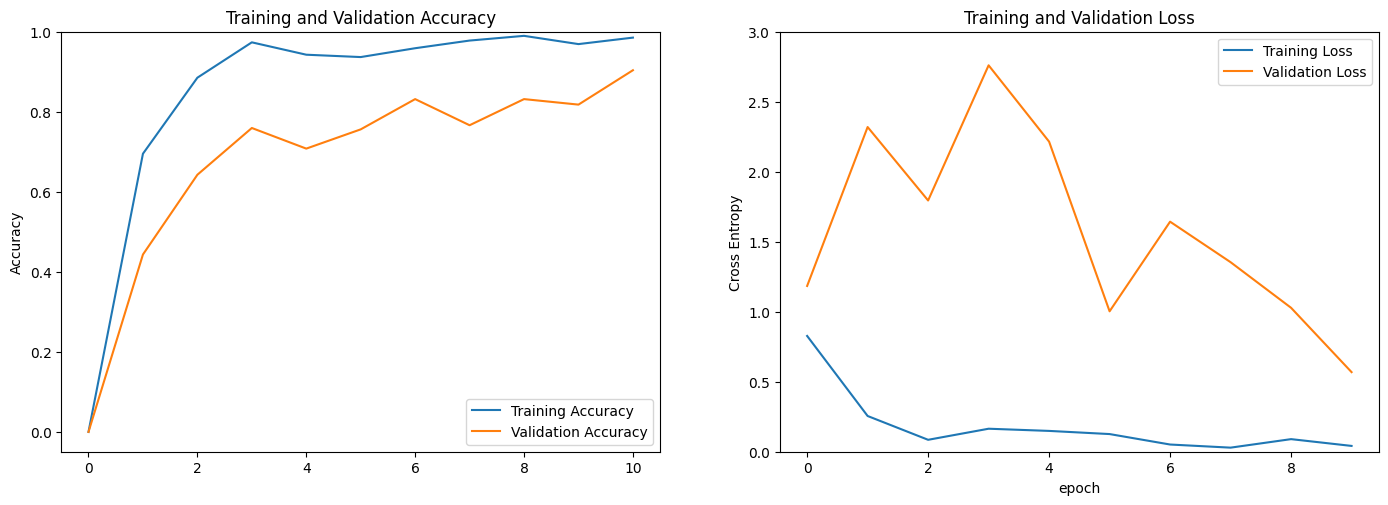

In [154]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [155]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

true_labels = y_test
predictions = mobinet_example_model.predict(X_test)
predicted_labels = np.round(predictions)

precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

10/10 [==============================] - 1s 81ms/step
Precision: 0.8988095238095238
Recall: 0.9207317073170732
F1-score: 0.9096385542168675

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       127
         1.0       0.90      0.92      0.91       164

    accuracy                           0.90       291
   macro avg       0.90      0.89      0.89       291
weighted avg       0.90      0.90      0.90       291



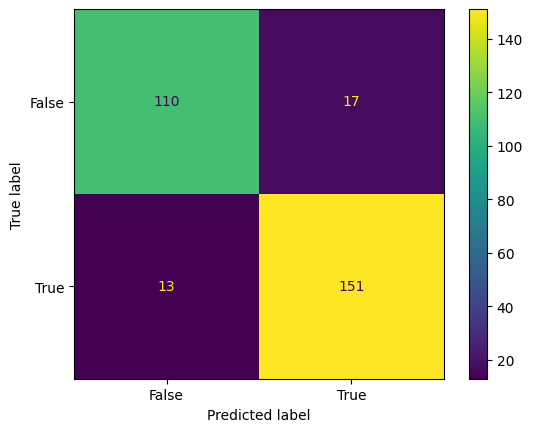

In [156]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

XAI

In [23]:
!pip install lime


Healthy


1/1 [==============================] - 1s 1s/step
Predicted class: 0, Confidence: [[0.00025485]]


d:\sem 5\New folder\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/5000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 10/5000 [00:01<11:16,  7.38it/s]

1/1 [==============================] - 0s 85ms/step


  0%|          | 20/5000 [00:01<05:32, 14.97it/s]

1/1 [==============================] - 0s 84ms/step


  1%|          | 30/5000 [00:01<03:37, 22.86it/s]

1/1 [==============================] - 0s 86ms/step


  1%|          | 40/5000 [00:01<02:47, 29.68it/s]

1/1 [==============================] - 0s 77ms/step


  1%|          | 50/5000 [00:02<02:16, 36.38it/s]

1/1 [==============================] - 0s 87ms/step


  1%|          | 60/5000 [00:02<01:57, 42.07it/s]

1/1 [==============================] - 0s 112ms/step


  1%|▏         | 70/5000 [00:02<01:53, 43.60it/s]

1/1 [==============================] - 0s 106ms/step


  2%|▏         | 80/5000 [00:02<01:56, 42.33it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▏         | 90/5000 [00:02<01:46, 46.23it/s]

1/1 [==============================] - 0s 114ms/step


  2%|▏         | 100/5000 [00:03<01:48, 45.19it/s]

1/1 [==============================] - 0s 125ms/step


  2%|▏         | 110/5000 [00:03<01:51, 43.99it/s]

1/1 [==============================] - 0s 113ms/step


  2%|▏         | 120/5000 [00:03<01:55, 42.19it/s]

1/1 [==============================] - 0s 123ms/step


  3%|▎         | 130/5000 [00:03<01:57, 41.45it/s]

1/1 [==============================] - 0s 103ms/step


  3%|▎         | 140/5000 [00:04<01:50, 44.17it/s]

1/1 [==============================] - 0s 112ms/step


  3%|▎         | 150/5000 [00:04<01:49, 44.20it/s]

1/1 [==============================] - 0s 110ms/step


  3%|▎         | 160/5000 [00:04<01:49, 44.36it/s]

1/1 [==============================] - 0s 108ms/step


  3%|▎         | 170/5000 [00:04<01:45, 45.89it/s]

1/1 [==============================] - 0s 131ms/step


  4%|▎         | 180/5000 [00:04<01:51, 43.09it/s]

1/1 [==============================] - 0s 115ms/step


  4%|▍         | 190/5000 [00:05<01:51, 43.00it/s]

1/1 [==============================] - 0s 106ms/step


  4%|▍         | 200/5000 [00:05<01:51, 42.89it/s]

1/1 [==============================] - 0s 110ms/step


  4%|▍         | 210/5000 [00:05<01:49, 43.87it/s]

1/1 [==============================] - 0s 130ms/step


  4%|▍         | 220/5000 [00:05<01:54, 41.80it/s]

1/1 [==============================] - 0s 111ms/step


  5%|▍         | 230/5000 [00:06<01:53, 41.96it/s]

1/1 [==============================] - 0s 117ms/step


  5%|▍         | 240/5000 [00:06<01:53, 41.99it/s]

1/1 [==============================] - 0s 100ms/step


  5%|▌         | 250/5000 [00:06<01:51, 42.46it/s]

1/1 [==============================] - 0s 114ms/step


  5%|▌         | 260/5000 [00:06<01:53, 41.85it/s]

1/1 [==============================] - 0s 106ms/step


  5%|▌         | 270/5000 [00:07<01:52, 42.20it/s]

1/1 [==============================] - 0s 105ms/step


  6%|▌         | 280/5000 [00:07<01:50, 42.77it/s]

1/1 [==============================] - 0s 110ms/step


  6%|▌         | 290/5000 [00:07<01:50, 42.54it/s]

1/1 [==============================] - 0s 114ms/step


  6%|▌         | 300/5000 [00:07<01:50, 42.52it/s]

1/1 [==============================] - 0s 116ms/step


  6%|▌         | 310/5000 [00:08<01:50, 42.43it/s]

1/1 [==============================] - 0s 78ms/step


  6%|▋         | 320/5000 [00:08<01:45, 44.20it/s]

1/1 [==============================] - 0s 80ms/step


  7%|▋         | 330/5000 [00:08<01:45, 44.18it/s]

1/1 [==============================] - 0s 72ms/step


  7%|▋         | 340/5000 [00:08<01:37, 47.74it/s]

1/1 [==============================] - 0s 114ms/step


  7%|▋         | 350/5000 [00:08<01:41, 45.94it/s]

1/1 [==============================] - 0s 89ms/step


  7%|▋         | 360/5000 [00:09<01:39, 46.45it/s]

1/1 [==============================] - 0s 103ms/step


  7%|▋         | 370/5000 [00:09<01:41, 45.41it/s]

1/1 [==============================] - 0s 84ms/step


  8%|▊         | 380/5000 [00:09<01:39, 46.40it/s]

1/1 [==============================] - 0s 110ms/step


  8%|▊         | 390/5000 [00:09<01:42, 45.07it/s]

1/1 [==============================] - 0s 71ms/step


  8%|▊         | 400/5000 [00:09<01:39, 46.16it/s]

1/1 [==============================] - 0s 78ms/step


  8%|▊         | 410/5000 [00:10<01:32, 49.36it/s]

1/1 [==============================] - 0s 70ms/step


  8%|▊         | 420/5000 [00:10<01:27, 52.45it/s]

1/1 [==============================] - 0s 115ms/step


  9%|▊         | 430/5000 [00:10<01:31, 50.09it/s]

1/1 [==============================] - 0s 103ms/step


  9%|▉         | 440/5000 [00:10<01:31, 50.06it/s]

1/1 [==============================] - 0s 72ms/step


  9%|▉         | 450/5000 [00:10<01:27, 52.16it/s]

1/1 [==============================] - 0s 120ms/step


  9%|▉         | 460/5000 [00:11<01:31, 49.54it/s]

1/1 [==============================] - 0s 116ms/step


  9%|▉         | 470/5000 [00:11<01:38, 46.03it/s]

1/1 [==============================] - 0s 115ms/step


 10%|▉         | 480/5000 [00:11<01:42, 44.18it/s]

1/1 [==============================] - 0s 116ms/step


 10%|▉         | 490/5000 [00:11<01:42, 43.90it/s]

1/1 [==============================] - 0s 70ms/step


 10%|█         | 500/5000 [00:11<01:32, 48.84it/s]

1/1 [==============================] - 0s 100ms/step


 10%|█         | 510/5000 [00:12<01:36, 46.67it/s]

1/1 [==============================] - 0s 119ms/step


 10%|█         | 520/5000 [00:12<01:36, 46.40it/s]

1/1 [==============================] - 0s 88ms/step


 11%|█         | 530/5000 [00:12<01:32, 48.48it/s]

1/1 [==============================] - 0s 76ms/step


 11%|█         | 540/5000 [00:12<01:26, 51.66it/s]

1/1 [==============================] - 0s 81ms/step


 11%|█         | 550/5000 [00:12<01:23, 53.39it/s]

1/1 [==============================] - 0s 101ms/step


 11%|█         | 560/5000 [00:13<01:29, 49.84it/s]

1/1 [==============================] - 0s 93ms/step


 11%|█▏        | 570/5000 [00:13<01:26, 51.51it/s]

1/1 [==============================] - 0s 116ms/step


 12%|█▏        | 580/5000 [00:13<01:28, 49.79it/s]

1/1 [==============================] - 0s 80ms/step


 12%|█▏        | 590/5000 [00:13<01:27, 50.28it/s]

1/1 [==============================] - 0s 90ms/step


 12%|█▏        | 600/5000 [00:13<01:31, 48.27it/s]

1/1 [==============================] - 0s 98ms/step


 12%|█▏        | 610/5000 [00:14<01:26, 50.51it/s]

1/1 [==============================] - 0s 100ms/step


 12%|█▏        | 620/5000 [00:14<01:24, 51.54it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█▎        | 630/5000 [00:14<01:22, 53.12it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█▎        | 640/5000 [00:14<01:26, 50.45it/s]

1/1 [==============================] - 0s 84ms/step


 13%|█▎        | 650/5000 [00:14<01:22, 52.77it/s]

1/1 [==============================] - 0s 92ms/step


 13%|█▎        | 660/5000 [00:15<01:22, 52.79it/s]

1/1 [==============================] - 0s 109ms/step


 13%|█▎        | 670/5000 [00:15<01:26, 50.11it/s]

1/1 [==============================] - 0s 114ms/step


 14%|█▎        | 680/5000 [00:15<01:32, 46.92it/s]

1/1 [==============================] - 0s 123ms/step


 14%|█▍        | 690/5000 [00:15<01:38, 43.71it/s]

1/1 [==============================] - 0s 70ms/step


 14%|█▍        | 700/5000 [00:16<01:29, 47.85it/s]

1/1 [==============================] - 0s 111ms/step


 14%|█▍        | 710/5000 [00:16<01:33, 45.92it/s]

1/1 [==============================] - 0s 110ms/step


 14%|█▍        | 720/5000 [00:16<01:35, 44.66it/s]

1/1 [==============================] - 0s 89ms/step


 15%|█▍        | 730/5000 [00:16<01:33, 45.63it/s]

1/1 [==============================] - 0s 117ms/step


 15%|█▍        | 740/5000 [00:16<01:37, 43.88it/s]

1/1 [==============================] - 0s 105ms/step


 15%|█▌        | 750/5000 [00:17<01:35, 44.44it/s]

1/1 [==============================] - 0s 122ms/step


 15%|█▌        | 760/5000 [00:17<01:35, 44.55it/s]

1/1 [==============================] - 0s 112ms/step


 15%|█▌        | 770/5000 [00:17<01:38, 43.15it/s]

1/1 [==============================] - 0s 79ms/step


 16%|█▌        | 780/5000 [00:17<01:31, 46.33it/s]

1/1 [==============================] - 0s 104ms/step


 16%|█▌        | 790/5000 [00:18<01:28, 47.51it/s]

1/1 [==============================] - 0s 86ms/step


 16%|█▌        | 800/5000 [00:18<01:34, 44.67it/s]

1/1 [==============================] - 0s 89ms/step


 16%|█▌        | 810/5000 [00:18<01:26, 48.41it/s]

1/1 [==============================] - 0s 114ms/step


 16%|█▋        | 820/5000 [00:18<01:28, 47.42it/s]

1/1 [==============================] - 0s 97ms/step


 17%|█▋        | 830/5000 [00:18<01:28, 47.20it/s]

1/1 [==============================] - 0s 117ms/step


 17%|█▋        | 840/5000 [00:19<01:32, 45.03it/s]

1/1 [==============================] - 0s 118ms/step


 17%|█▋        | 850/5000 [00:19<01:33, 44.20it/s]

1/1 [==============================] - 0s 105ms/step


 17%|█▋        | 860/5000 [00:19<01:34, 43.87it/s]

1/1 [==============================] - 0s 125ms/step


 17%|█▋        | 870/5000 [00:19<01:37, 42.46it/s]

1/1 [==============================] - 0s 101ms/step


 18%|█▊        | 880/5000 [00:20<01:31, 44.83it/s]

1/1 [==============================] - 0s 77ms/step


 18%|█▊        | 890/5000 [00:20<01:27, 47.21it/s]

1/1 [==============================] - 0s 114ms/step


 18%|█▊        | 900/5000 [00:20<01:25, 48.19it/s]

1/1 [==============================] - 0s 112ms/step


 18%|█▊        | 910/5000 [00:20<01:31, 44.86it/s]

1/1 [==============================] - 0s 84ms/step


 18%|█▊        | 920/5000 [00:20<01:26, 47.40it/s]

1/1 [==============================] - 0s 66ms/step


 19%|█▊        | 930/5000 [00:21<01:19, 51.06it/s]

1/1 [==============================] - 0s 71ms/step


 19%|█▉        | 940/5000 [00:21<01:16, 53.29it/s]

1/1 [==============================] - 0s 86ms/step


 19%|█▉        | 950/5000 [00:21<01:17, 52.16it/s]

1/1 [==============================] - 0s 103ms/step


 19%|█▉        | 960/5000 [00:21<01:22, 48.70it/s]

1/1 [==============================] - 0s 102ms/step


 19%|█▉        | 970/5000 [00:21<01:25, 47.31it/s]

1/1 [==============================] - 0s 73ms/step


 20%|█▉        | 980/5000 [00:22<01:22, 49.01it/s]

1/1 [==============================] - 0s 102ms/step


 20%|█▉        | 990/5000 [00:22<01:23, 48.22it/s]

1/1 [==============================] - 0s 71ms/step


 20%|██        | 1000/5000 [00:22<01:20, 49.48it/s]

1/1 [==============================] - 0s 94ms/step


 20%|██        | 1010/5000 [00:22<01:19, 50.21it/s]

1/1 [==============================] - 0s 95ms/step


 20%|██        | 1020/5000 [00:22<01:20, 49.66it/s]

1/1 [==============================] - 0s 73ms/step


 21%|██        | 1030/5000 [00:23<01:17, 51.13it/s]

1/1 [==============================] - 0s 111ms/step


 21%|██        | 1040/5000 [00:23<01:18, 50.45it/s]

1/1 [==============================] - 0s 104ms/step


 21%|██        | 1050/5000 [00:23<01:23, 47.21it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██        | 1060/5000 [00:23<01:24, 46.89it/s]

1/1 [==============================] - 0s 103ms/step


 21%|██▏       | 1070/5000 [00:23<01:25, 45.92it/s]

1/1 [==============================] - 0s 100ms/step


 22%|██▏       | 1080/5000 [00:24<01:26, 45.19it/s]

1/1 [==============================] - 0s 100ms/step


 22%|██▏       | 1090/5000 [00:24<01:26, 44.95it/s]

1/1 [==============================] - 0s 84ms/step


 22%|██▏       | 1100/5000 [00:24<01:24, 46.30it/s]

1/1 [==============================] - 0s 108ms/step


 22%|██▏       | 1110/5000 [00:24<01:24, 46.20it/s]

1/1 [==============================] - 0s 73ms/step


 22%|██▏       | 1120/5000 [00:24<01:15, 51.16it/s]

1/1 [==============================] - 0s 93ms/step


 23%|██▎       | 1130/5000 [00:25<01:15, 51.56it/s]

1/1 [==============================] - 0s 102ms/step


 23%|██▎       | 1140/5000 [00:25<01:16, 50.46it/s]

1/1 [==============================] - 0s 107ms/step


 23%|██▎       | 1150/5000 [00:25<01:20, 47.75it/s]

1/1 [==============================] - 0s 120ms/step


 23%|██▎       | 1160/5000 [00:25<01:23, 46.26it/s]

1/1 [==============================] - 0s 123ms/step


 23%|██▎       | 1170/5000 [00:26<01:28, 43.28it/s]

1/1 [==============================] - 0s 113ms/step


 24%|██▎       | 1180/5000 [00:26<01:28, 43.30it/s]

1/1 [==============================] - 0s 92ms/step


 24%|██▍       | 1190/5000 [00:26<01:26, 43.90it/s]

1/1 [==============================] - 0s 105ms/step


 24%|██▍       | 1200/5000 [00:26<01:25, 44.31it/s]

1/1 [==============================] - 0s 118ms/step


 24%|██▍       | 1210/5000 [00:26<01:28, 42.96it/s]

1/1 [==============================] - 0s 102ms/step


 24%|██▍       | 1220/5000 [00:27<01:27, 43.38it/s]

1/1 [==============================] - 0s 107ms/step


 25%|██▍       | 1230/5000 [00:27<01:28, 42.60it/s]

1/1 [==============================] - 0s 73ms/step


 25%|██▍       | 1240/5000 [00:27<01:23, 45.08it/s]

1/1 [==============================] - 0s 111ms/step


 25%|██▌       | 1250/5000 [00:27<01:24, 44.48it/s]

1/1 [==============================] - 0s 113ms/step


 25%|██▌       | 1260/5000 [00:28<01:25, 43.70it/s]

1/1 [==============================] - 0s 107ms/step


 25%|██▌       | 1270/5000 [00:28<01:26, 43.32it/s]

1/1 [==============================] - 0s 92ms/step


 26%|██▌       | 1280/5000 [00:28<01:22, 44.98it/s]

1/1 [==============================] - 0s 76ms/step


 26%|██▌       | 1290/5000 [00:28<01:19, 46.82it/s]

1/1 [==============================] - 0s 69ms/step


 26%|██▌       | 1300/5000 [00:28<01:13, 50.34it/s]

1/1 [==============================] - 0s 89ms/step


 26%|██▌       | 1310/5000 [00:29<01:12, 50.88it/s]

1/1 [==============================] - 0s 69ms/step


 26%|██▋       | 1320/5000 [00:29<01:17, 47.65it/s]

1/1 [==============================] - 0s 79ms/step


 27%|██▋       | 1330/5000 [00:29<01:16, 48.16it/s]

1/1 [==============================] - 0s 110ms/step


 27%|██▋       | 1340/5000 [00:29<01:18, 46.52it/s]

1/1 [==============================] - 0s 74ms/step


 27%|██▋       | 1350/5000 [00:29<01:16, 47.79it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 1360/5000 [00:30<01:10, 52.00it/s]

1/1 [==============================] - 0s 70ms/step


 27%|██▋       | 1370/5000 [00:30<01:07, 53.46it/s]

1/1 [==============================] - 0s 84ms/step


 28%|██▊       | 1380/5000 [00:30<01:08, 52.90it/s]

1/1 [==============================] - 0s 74ms/step


 28%|██▊       | 1390/5000 [00:30<01:06, 54.45it/s]

1/1 [==============================] - 0s 69ms/step


 28%|██▊       | 1400/5000 [00:30<01:02, 57.55it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██▊       | 1410/5000 [00:31<01:07, 53.38it/s]

1/1 [==============================] - 0s 80ms/step


 28%|██▊       | 1420/5000 [00:31<01:08, 52.01it/s]

1/1 [==============================] - 0s 79ms/step


 29%|██▊       | 1430/5000 [00:31<01:08, 52.00it/s]

1/1 [==============================] - 0s 84ms/step


 29%|██▉       | 1440/5000 [00:31<01:10, 50.40it/s]

1/1 [==============================] - 0s 78ms/step


 29%|██▉       | 1450/5000 [00:31<01:09, 51.11it/s]

1/1 [==============================] - 0s 92ms/step


 29%|██▉       | 1460/5000 [00:32<01:09, 51.18it/s]

1/1 [==============================] - 0s 105ms/step


 29%|██▉       | 1470/5000 [00:32<01:12, 48.46it/s]

1/1 [==============================] - 0s 69ms/step


 30%|██▉       | 1480/5000 [00:32<01:10, 50.11it/s]

1/1 [==============================] - 0s 79ms/step


 30%|██▉       | 1490/5000 [00:32<01:08, 50.98it/s]

1/1 [==============================] - 0s 79ms/step


 30%|███       | 1500/5000 [00:32<01:06, 52.81it/s]

1/1 [==============================] - 0s 63ms/step


 30%|███       | 1510/5000 [00:32<01:00, 57.27it/s]

1/1 [==============================] - 0s 60ms/step


 30%|███       | 1520/5000 [00:33<00:57, 61.01it/s]

1/1 [==============================] - 0s 106ms/step


 31%|███       | 1530/5000 [00:33<01:03, 54.30it/s]

1/1 [==============================] - 0s 89ms/step


 31%|███       | 1540/5000 [00:33<01:06, 52.21it/s]

1/1 [==============================] - 0s 78ms/step


 31%|███       | 1550/5000 [00:33<01:02, 54.96it/s]

1/1 [==============================] - 0s 75ms/step


 31%|███       | 1560/5000 [00:33<01:00, 56.59it/s]

1/1 [==============================] - 0s 71ms/step


 31%|███▏      | 1570/5000 [00:34<00:58, 58.87it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 1580/5000 [00:34<00:54, 62.90it/s]

1/1 [==============================] - 0s 103ms/step


 32%|███▏      | 1590/5000 [00:34<01:01, 55.44it/s]

1/1 [==============================] - 0s 78ms/step


 32%|███▏      | 1600/5000 [00:34<01:02, 54.17it/s]

1/1 [==============================] - 0s 76ms/step


 32%|███▏      | 1610/5000 [00:34<01:00, 56.34it/s]

1/1 [==============================] - 0s 74ms/step


 32%|███▏      | 1620/5000 [00:34<00:58, 58.10it/s]

1/1 [==============================] - 0s 99ms/step


 33%|███▎      | 1630/5000 [00:35<00:58, 57.36it/s]

1/1 [==============================] - 0s 107ms/step


 33%|███▎      | 1640/5000 [00:35<01:02, 53.36it/s]

1/1 [==============================] - 0s 67ms/step


 33%|███▎      | 1650/5000 [00:35<00:59, 55.99it/s]

1/1 [==============================] - 0s 70ms/step


 33%|███▎      | 1660/5000 [00:35<00:58, 57.26it/s]

1/1 [==============================] - 0s 67ms/step


 33%|███▎      | 1670/5000 [00:35<00:55, 59.91it/s]

1/1 [==============================] - 0s 78ms/step


 34%|███▎      | 1680/5000 [00:35<00:57, 57.95it/s]

1/1 [==============================] - 0s 81ms/step


 34%|███▍      | 1690/5000 [00:36<00:59, 55.76it/s]

1/1 [==============================] - 0s 72ms/step


 34%|███▍      | 1700/5000 [00:36<00:59, 55.13it/s]

1/1 [==============================] - 0s 74ms/step


 34%|███▍      | 1710/5000 [00:36<01:01, 53.84it/s]

1/1 [==============================] - 0s 76ms/step


 34%|███▍      | 1720/5000 [00:36<00:57, 57.36it/s]

1/1 [==============================] - 0s 79ms/step


 35%|███▍      | 1730/5000 [00:36<00:58, 56.19it/s]

1/1 [==============================] - 0s 77ms/step


 35%|███▍      | 1740/5000 [00:37<00:58, 55.69it/s]

1/1 [==============================] - 0s 68ms/step


 35%|███▌      | 1750/5000 [00:37<00:55, 59.03it/s]

1/1 [==============================] - 0s 77ms/step


 35%|███▌      | 1760/5000 [00:37<00:56, 56.96it/s]

1/1 [==============================] - 0s 80ms/step


 35%|███▌      | 1770/5000 [00:37<00:59, 54.02it/s]

1/1 [==============================] - 0s 105ms/step


 36%|███▌      | 1780/5000 [00:37<01:03, 50.61it/s]

1/1 [==============================] - 0s 111ms/step


 36%|███▌      | 1790/5000 [00:38<01:07, 47.60it/s]

1/1 [==============================] - 0s 95ms/step


 36%|███▌      | 1800/5000 [00:38<01:06, 48.02it/s]

1/1 [==============================] - 0s 67ms/step


 36%|███▌      | 1810/5000 [00:38<01:03, 50.09it/s]

1/1 [==============================] - 0s 80ms/step


 36%|███▋      | 1820/5000 [00:38<01:01, 51.73it/s]

1/1 [==============================] - 0s 80ms/step


 37%|███▋      | 1830/5000 [00:38<01:02, 50.89it/s]

1/1 [==============================] - 0s 100ms/step


 37%|███▋      | 1840/5000 [00:39<01:04, 49.22it/s]

1/1 [==============================] - 0s 102ms/step


 37%|███▋      | 1850/5000 [00:39<01:05, 47.78it/s]

1/1 [==============================] - 0s 86ms/step


 37%|███▋      | 1860/5000 [00:39<01:06, 47.49it/s]

1/1 [==============================] - 0s 70ms/step


 37%|███▋      | 1870/5000 [00:39<01:01, 50.52it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███▊      | 1880/5000 [00:39<00:57, 53.86it/s]

1/1 [==============================] - 0s 72ms/step


 38%|███▊      | 1890/5000 [00:39<00:54, 56.65it/s]

1/1 [==============================] - 0s 72ms/step


 38%|███▊      | 1900/5000 [00:40<00:55, 56.27it/s]

1/1 [==============================] - 0s 70ms/step


 38%|███▊      | 1910/5000 [00:40<00:56, 54.27it/s]

1/1 [==============================] - 0s 77ms/step


 38%|███▊      | 1920/5000 [00:40<00:55, 55.08it/s]

1/1 [==============================] - 0s 111ms/step


 39%|███▊      | 1930/5000 [00:40<00:58, 52.07it/s]

1/1 [==============================] - 0s 77ms/step


 39%|███▉      | 1940/5000 [00:40<00:59, 51.47it/s]

1/1 [==============================] - 0s 68ms/step


 39%|███▉      | 1950/5000 [00:41<00:56, 54.09it/s]

1/1 [==============================] - 0s 71ms/step


 39%|███▉      | 1960/5000 [00:41<00:53, 56.30it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███▉      | 1970/5000 [00:41<00:56, 53.19it/s]

1/1 [==============================] - 0s 107ms/step


 40%|███▉      | 1980/5000 [00:41<01:04, 46.71it/s]

1/1 [==============================] - 0s 83ms/step


 40%|███▉      | 1990/5000 [00:41<01:01, 48.82it/s]

1/1 [==============================] - 0s 94ms/step


 40%|████      | 2000/5000 [00:42<01:01, 48.41it/s]

1/1 [==============================] - 0s 109ms/step


 40%|████      | 2010/5000 [00:42<01:04, 46.56it/s]

1/1 [==============================] - 0s 75ms/step


 40%|████      | 2020/5000 [00:42<01:02, 48.03it/s]

1/1 [==============================] - 0s 99ms/step


 41%|████      | 2030/5000 [00:42<01:04, 45.81it/s]

1/1 [==============================] - 0s 81ms/step


 41%|████      | 2040/5000 [00:42<01:01, 48.02it/s]

1/1 [==============================] - 0s 104ms/step


 41%|████      | 2050/5000 [00:43<01:04, 45.64it/s]

1/1 [==============================] - 0s 97ms/step


 41%|████      | 2060/5000 [00:43<01:02, 46.91it/s]

1/1 [==============================] - 0s 82ms/step


 41%|████▏     | 2070/5000 [00:43<01:00, 48.17it/s]

1/1 [==============================] - 0s 114ms/step


 42%|████▏     | 2080/5000 [00:43<01:02, 47.07it/s]

1/1 [==============================] - 0s 118ms/step


 42%|████▏     | 2090/5000 [00:44<01:04, 44.81it/s]

1/1 [==============================] - 0s 99ms/step


 42%|████▏     | 2100/5000 [00:44<01:05, 44.45it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 2110/5000 [00:44<00:57, 49.88it/s]

1/1 [==============================] - 0s 108ms/step


 42%|████▏     | 2120/5000 [00:44<00:58, 49.09it/s]

1/1 [==============================] - 0s 96ms/step


 43%|████▎     | 2130/5000 [00:44<01:00, 47.20it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████▎     | 2140/5000 [00:45<01:06, 42.77it/s]

1/1 [==============================] - 0s 123ms/step


 43%|████▎     | 2150/5000 [00:45<01:07, 42.48it/s]

1/1 [==============================] - 0s 126ms/step


 43%|████▎     | 2160/5000 [00:45<01:06, 42.96it/s]

1/1 [==============================] - 0s 142ms/step


 43%|████▎     | 2170/5000 [00:45<01:07, 42.01it/s]

1/1 [==============================] - 0s 129ms/step


 44%|████▎     | 2180/5000 [00:46<01:06, 42.33it/s]

1/1 [==============================] - 0s 89ms/step


 44%|████▍     | 2190/5000 [00:46<01:02, 44.62it/s]

1/1 [==============================] - 0s 91ms/step


 44%|████▍     | 2200/5000 [00:46<01:00, 46.10it/s]

1/1 [==============================] - 0s 102ms/step


 44%|████▍     | 2210/5000 [00:46<01:00, 46.18it/s]

1/1 [==============================] - 0s 92ms/step


 44%|████▍     | 2220/5000 [00:46<00:59, 46.90it/s]

1/1 [==============================] - 0s 108ms/step


 45%|████▍     | 2230/5000 [00:47<00:59, 46.58it/s]

1/1 [==============================] - 0s 131ms/step


 45%|████▍     | 2240/5000 [00:47<01:01, 44.63it/s]

1/1 [==============================] - 0s 99ms/step


 45%|████▌     | 2250/5000 [00:47<01:01, 44.80it/s]

1/1 [==============================] - 0s 107ms/step


 45%|████▌     | 2260/5000 [00:47<01:01, 44.53it/s]

1/1 [==============================] - 0s 108ms/step


 45%|████▌     | 2270/5000 [00:48<01:01, 44.46it/s]

1/1 [==============================] - 0s 106ms/step


 46%|████▌     | 2280/5000 [00:48<01:01, 44.50it/s]

1/1 [==============================] - 0s 77ms/step


 46%|████▌     | 2290/5000 [00:48<00:56, 48.04it/s]

1/1 [==============================] - 0s 95ms/step


 46%|████▌     | 2300/5000 [00:48<00:55, 48.82it/s]

1/1 [==============================] - 0s 131ms/step


 46%|████▌     | 2310/5000 [00:48<00:59, 45.55it/s]

1/1 [==============================] - 0s 99ms/step


 46%|████▋     | 2320/5000 [00:49<00:57, 46.82it/s]

1/1 [==============================] - 0s 110ms/step


 47%|████▋     | 2330/5000 [00:49<01:01, 43.61it/s]

1/1 [==============================] - 0s 82ms/step


 47%|████▋     | 2340/5000 [00:49<00:56, 46.92it/s]

1/1 [==============================] - 0s 121ms/step


 47%|████▋     | 2350/5000 [00:49<00:59, 44.49it/s]

1/1 [==============================] - 0s 81ms/step


 47%|████▋     | 2360/5000 [00:50<00:56, 46.37it/s]

1/1 [==============================] - 0s 160ms/step


 47%|████▋     | 2370/5000 [00:50<00:59, 44.54it/s]

1/1 [==============================] - 0s 90ms/step


 48%|████▊     | 2380/5000 [00:50<00:56, 45.99it/s]

1/1 [==============================] - 0s 112ms/step


 48%|████▊     | 2390/5000 [00:50<00:56, 46.25it/s]

1/1 [==============================] - 0s 88ms/step


 48%|████▊     | 2400/5000 [00:50<00:54, 47.55it/s]

1/1 [==============================] - 0s 90ms/step


 48%|████▊     | 2410/5000 [00:51<00:53, 48.35it/s]

1/1 [==============================] - 0s 118ms/step


 48%|████▊     | 2420/5000 [00:51<00:54, 47.75it/s]

1/1 [==============================] - 0s 97ms/step


 49%|████▊     | 2430/5000 [00:51<00:52, 49.29it/s]

1/1 [==============================] - 0s 114ms/step


 49%|████▉     | 2440/5000 [00:51<00:51, 49.85it/s]

1/1 [==============================] - 0s 124ms/step


 49%|████▉     | 2450/5000 [00:51<00:52, 48.16it/s]

1/1 [==============================] - 0s 100ms/step


 49%|████▉     | 2460/5000 [00:52<00:54, 46.97it/s]

1/1 [==============================] - 0s 109ms/step


 49%|████▉     | 2470/5000 [00:52<00:54, 46.07it/s]

1/1 [==============================] - 0s 91ms/step


 50%|████▉     | 2480/5000 [00:52<00:54, 46.11it/s]

1/1 [==============================] - 0s 119ms/step


 50%|████▉     | 2490/5000 [00:52<00:58, 42.89it/s]

1/1 [==============================] - 0s 87ms/step


 50%|█████     | 2500/5000 [00:53<00:53, 46.33it/s]

1/1 [==============================] - 0s 75ms/step


 50%|█████     | 2510/5000 [00:53<00:49, 50.77it/s]

1/1 [==============================] - 0s 84ms/step


 50%|█████     | 2520/5000 [00:53<00:47, 51.96it/s]

1/1 [==============================] - 0s 75ms/step


 51%|█████     | 2530/5000 [00:53<00:46, 53.23it/s]

1/1 [==============================] - 0s 99ms/step


 51%|█████     | 2540/5000 [00:53<00:49, 50.14it/s]

1/1 [==============================] - 0s 66ms/step


 51%|█████     | 2550/5000 [00:53<00:46, 53.11it/s]

1/1 [==============================] - 0s 77ms/step


 51%|█████     | 2560/5000 [00:54<00:50, 48.35it/s]

1/1 [==============================] - 0s 108ms/step


 51%|█████▏    | 2570/5000 [00:54<00:50, 47.83it/s]

1/1 [==============================] - 0s 65ms/step


 52%|█████▏    | 2580/5000 [00:54<00:49, 48.48it/s]

1/1 [==============================] - 0s 102ms/step


 52%|█████▏    | 2590/5000 [00:54<00:50, 47.83it/s]

1/1 [==============================] - 0s 119ms/step


 52%|█████▏    | 2600/5000 [00:55<00:53, 45.25it/s]

1/1 [==============================] - 0s 127ms/step


 52%|█████▏    | 2610/5000 [00:55<00:57, 41.54it/s]

1/1 [==============================] - 0s 79ms/step


 52%|█████▏    | 2620/5000 [00:55<00:52, 45.66it/s]

1/1 [==============================] - 0s 120ms/step


 53%|█████▎    | 2630/5000 [00:55<00:52, 44.89it/s]

1/1 [==============================] - 0s 121ms/step


 53%|█████▎    | 2640/5000 [00:55<00:52, 45.21it/s]

1/1 [==============================] - 0s 127ms/step


 53%|█████▎    | 2650/5000 [00:56<00:53, 44.14it/s]

1/1 [==============================] - 0s 101ms/step


 53%|█████▎    | 2660/5000 [00:56<00:51, 45.04it/s]

1/1 [==============================] - 0s 121ms/step


 53%|█████▎    | 2670/5000 [00:56<00:55, 41.72it/s]

1/1 [==============================] - 0s 111ms/step


 54%|█████▎    | 2680/5000 [00:56<00:54, 42.46it/s]

1/1 [==============================] - 0s 111ms/step


 54%|█████▍    | 2690/5000 [00:57<00:53, 42.87it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████▍    | 2700/5000 [00:57<00:53, 43.30it/s]

1/1 [==============================] - 0s 70ms/step


 54%|█████▍    | 2710/5000 [00:57<00:48, 47.26it/s]

1/1 [==============================] - 0s 86ms/step


 54%|█████▍    | 2720/5000 [00:57<00:46, 49.06it/s]

1/1 [==============================] - 0s 134ms/step


 55%|█████▍    | 2730/5000 [00:57<00:49, 45.62it/s]

1/1 [==============================] - 0s 113ms/step


 55%|█████▍    | 2740/5000 [00:58<00:51, 44.02it/s]

1/1 [==============================] - 0s 119ms/step


 55%|█████▌    | 2750/5000 [00:58<00:53, 41.73it/s]

1/1 [==============================] - 0s 126ms/step


 55%|█████▌    | 2760/5000 [00:58<00:53, 41.84it/s]

1/1 [==============================] - 0s 140ms/step


 55%|█████▌    | 2770/5000 [00:58<00:54, 41.19it/s]

1/1 [==============================] - 0s 114ms/step


 56%|█████▌    | 2780/5000 [00:59<00:53, 41.81it/s]

1/1 [==============================] - 0s 87ms/step


 56%|█████▌    | 2790/5000 [00:59<00:49, 45.02it/s]

1/1 [==============================] - 0s 71ms/step


 56%|█████▌    | 2800/5000 [00:59<00:45, 48.22it/s]

1/1 [==============================] - 0s 101ms/step


 56%|█████▌    | 2810/5000 [00:59<00:45, 47.80it/s]

1/1 [==============================] - 0s 121ms/step


 56%|█████▋    | 2820/5000 [01:00<00:48, 44.85it/s]

1/1 [==============================] - 0s 70ms/step


 57%|█████▋    | 2830/5000 [01:00<00:46, 46.79it/s]

1/1 [==============================] - 0s 89ms/step


 57%|█████▋    | 2840/5000 [01:00<00:45, 47.60it/s]

1/1 [==============================] - 0s 151ms/step


 57%|█████▋    | 2850/5000 [01:00<00:52, 41.33it/s]

1/1 [==============================] - 0s 82ms/step


 57%|█████▋    | 2860/5000 [01:00<00:48, 44.50it/s]

1/1 [==============================] - 0s 82ms/step


 57%|█████▋    | 2870/5000 [01:01<00:45, 47.14it/s]

1/1 [==============================] - 0s 85ms/step


 58%|█████▊    | 2880/5000 [01:01<00:43, 48.34it/s]

1/1 [==============================] - 0s 107ms/step


 58%|█████▊    | 2890/5000 [01:01<00:43, 48.46it/s]

1/1 [==============================] - 0s 122ms/step


 58%|█████▊    | 2900/5000 [01:01<00:46, 45.42it/s]

1/1 [==============================] - 0s 83ms/step


 58%|█████▊    | 2910/5000 [01:01<00:44, 46.46it/s]

1/1 [==============================] - 0s 119ms/step


 58%|█████▊    | 2920/5000 [01:02<00:46, 44.86it/s]

1/1 [==============================] - 0s 79ms/step


 59%|█████▊    | 2930/5000 [01:02<00:42, 48.21it/s]

1/1 [==============================] - 0s 97ms/step


 59%|█████▉    | 2940/5000 [01:02<00:41, 49.13it/s]

1/1 [==============================] - 0s 95ms/step


 59%|█████▉    | 2950/5000 [01:02<00:41, 49.55it/s]

1/1 [==============================] - 0s 114ms/step


 59%|█████▉    | 2960/5000 [01:02<00:42, 47.62it/s]

1/1 [==============================] - 0s 126ms/step


 59%|█████▉    | 2970/5000 [01:03<00:44, 45.48it/s]

1/1 [==============================] - 0s 84ms/step


 60%|█████▉    | 2980/5000 [01:03<00:41, 48.33it/s]

1/1 [==============================] - 0s 96ms/step


 60%|█████▉    | 2990/5000 [01:03<00:40, 49.41it/s]

1/1 [==============================] - 0s 92ms/step


 60%|██████    | 3000/5000 [01:03<00:39, 50.98it/s]

1/1 [==============================] - 0s 76ms/step


 60%|██████    | 3010/5000 [01:03<00:37, 52.61it/s]

1/1 [==============================] - 0s 63ms/step


 60%|██████    | 3020/5000 [01:04<00:34, 57.37it/s]

1/1 [==============================] - 0s 107ms/step


 61%|██████    | 3030/5000 [01:04<00:36, 54.66it/s]

1/1 [==============================] - 0s 99ms/step


 61%|██████    | 3040/5000 [01:04<00:37, 51.92it/s]

1/1 [==============================] - 0s 166ms/step


 61%|██████    | 3050/5000 [01:04<00:41, 46.74it/s]

1/1 [==============================] - 0s 90ms/step


 61%|██████    | 3060/5000 [01:04<00:39, 48.84it/s]

1/1 [==============================] - 0s 79ms/step


 61%|██████▏   | 3070/5000 [01:05<00:38, 50.40it/s]

1/1 [==============================] - 0s 89ms/step


 62%|██████▏   | 3080/5000 [01:05<00:37, 50.54it/s]

1/1 [==============================] - 0s 68ms/step


 62%|██████▏   | 3090/5000 [01:05<00:35, 53.65it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 3100/5000 [01:05<00:33, 57.42it/s]

1/1 [==============================] - 0s 70ms/step


 62%|██████▏   | 3110/5000 [01:05<00:31, 59.69it/s]

1/1 [==============================] - 0s 84ms/step


 62%|██████▏   | 3120/5000 [01:05<00:31, 59.17it/s]

1/1 [==============================] - 0s 101ms/step


 63%|██████▎   | 3130/5000 [01:06<00:33, 55.66it/s]

1/1 [==============================] - 0s 94ms/step


 63%|██████▎   | 3140/5000 [01:06<00:38, 48.58it/s]

1/1 [==============================] - 0s 84ms/step


 63%|██████▎   | 3150/5000 [01:06<00:37, 49.93it/s]

1/1 [==============================] - 0s 94ms/step


 63%|██████▎   | 3160/5000 [01:06<00:35, 52.36it/s]

1/1 [==============================] - 0s 99ms/step


 63%|██████▎   | 3170/5000 [01:06<00:35, 51.64it/s]

1/1 [==============================] - 0s 96ms/step


 64%|██████▎   | 3180/5000 [01:07<00:35, 51.37it/s]

1/1 [==============================] - 0s 71ms/step


 64%|██████▍   | 3190/5000 [01:07<00:33, 53.70it/s]

1/1 [==============================] - 0s 159ms/step


 64%|██████▍   | 3200/5000 [01:07<00:36, 49.83it/s]

1/1 [==============================] - 0s 101ms/step


 64%|██████▍   | 3210/5000 [01:07<00:35, 50.03it/s]

1/1 [==============================] - 0s 88ms/step


 64%|██████▍   | 3220/5000 [01:07<00:35, 49.94it/s]

1/1 [==============================] - 0s 95ms/step


 65%|██████▍   | 3230/5000 [01:08<00:36, 48.97it/s]

1/1 [==============================] - 0s 85ms/step


 65%|██████▍   | 3240/5000 [01:08<00:34, 50.43it/s]

1/1 [==============================] - 0s 100ms/step


 65%|██████▌   | 3250/5000 [01:08<00:34, 50.26it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████▌   | 3260/5000 [01:08<00:33, 51.27it/s]

1/1 [==============================] - 0s 96ms/step


 65%|██████▌   | 3270/5000 [01:08<00:33, 52.02it/s]

1/1 [==============================] - 0s 73ms/step


 66%|██████▌   | 3280/5000 [01:09<00:32, 52.85it/s]

1/1 [==============================] - 0s 68ms/step


 66%|██████▌   | 3290/5000 [01:09<00:29, 57.30it/s]

1/1 [==============================] - 0s 80ms/step


 66%|██████▌   | 3300/5000 [01:09<00:28, 58.76it/s]

1/1 [==============================] - 0s 91ms/step


 66%|██████▌   | 3310/5000 [01:09<00:29, 57.97it/s]

1/1 [==============================] - 0s 89ms/step


 66%|██████▋   | 3320/5000 [01:09<00:29, 56.77it/s]

1/1 [==============================] - 0s 72ms/step


 67%|██████▋   | 3330/5000 [01:09<00:28, 58.16it/s]

1/1 [==============================] - 0s 81ms/step


 67%|██████▋   | 3340/5000 [01:10<00:28, 57.53it/s]

1/1 [==============================] - 0s 81ms/step


 67%|██████▋   | 3350/5000 [01:10<00:27, 58.94it/s]

1/1 [==============================] - 0s 68ms/step


 67%|██████▋   | 3360/5000 [01:10<00:30, 54.60it/s]

1/1 [==============================] - 0s 74ms/step


 67%|██████▋   | 3370/5000 [01:10<00:28, 57.53it/s]

1/1 [==============================] - 0s 81ms/step


 68%|██████▊   | 3380/5000 [01:10<00:27, 58.29it/s]

1/1 [==============================] - 0s 100ms/step


 68%|██████▊   | 3390/5000 [01:11<00:29, 55.27it/s]

1/1 [==============================] - 0s 108ms/step


 68%|██████▊   | 3400/5000 [01:11<00:31, 51.10it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████▊   | 3410/5000 [01:11<00:33, 48.13it/s]

1/1 [==============================] - 0s 167ms/step


 68%|██████▊   | 3420/5000 [01:11<00:36, 43.18it/s]

1/1 [==============================] - 0s 75ms/step


 69%|██████▊   | 3430/5000 [01:11<00:33, 46.42it/s]

1/1 [==============================] - 0s 104ms/step


 69%|██████▉   | 3440/5000 [01:12<00:32, 48.22it/s]

1/1 [==============================] - 0s 102ms/step


 69%|██████▉   | 3450/5000 [01:12<00:32, 47.96it/s]

1/1 [==============================] - 0s 139ms/step


 69%|██████▉   | 3460/5000 [01:12<00:33, 45.69it/s]

1/1 [==============================] - 0s 244ms/step


 69%|██████▉   | 3470/5000 [01:12<00:40, 37.51it/s]

1/1 [==============================] - 0s 101ms/step


 70%|██████▉   | 3480/5000 [01:13<00:38, 39.05it/s]

1/1 [==============================] - 0s 100ms/step


 70%|██████▉   | 3490/5000 [01:13<00:37, 40.31it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████   | 3500/5000 [01:13<00:35, 42.44it/s]

1/1 [==============================] - 0s 85ms/step


 70%|███████   | 3510/5000 [01:13<00:33, 43.93it/s]

1/1 [==============================] - 0s 95ms/step


 70%|███████   | 3520/5000 [01:14<00:33, 44.58it/s]

1/1 [==============================] - 0s 101ms/step


 71%|███████   | 3530/5000 [01:14<00:33, 43.33it/s]

1/1 [==============================] - 0s 101ms/step


 71%|███████   | 3540/5000 [01:14<00:33, 43.96it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████   | 3550/5000 [01:14<00:32, 44.15it/s]

1/1 [==============================] - 0s 96ms/step


 71%|███████   | 3560/5000 [01:14<00:30, 46.55it/s]

1/1 [==============================] - 0s 103ms/step


 71%|███████▏  | 3570/5000 [01:15<00:30, 46.54it/s]

1/1 [==============================] - 0s 142ms/step


 72%|███████▏  | 3580/5000 [01:15<00:34, 40.93it/s]

1/1 [==============================] - 0s 91ms/step


 72%|███████▏  | 3590/5000 [01:15<00:31, 44.26it/s]

1/1 [==============================] - 0s 101ms/step


 72%|███████▏  | 3600/5000 [01:15<00:30, 46.04it/s]

1/1 [==============================] - 0s 81ms/step


 72%|███████▏  | 3610/5000 [01:16<00:27, 49.80it/s]

1/1 [==============================] - 0s 129ms/step


 72%|███████▏  | 3620/5000 [01:16<00:28, 48.45it/s]

1/1 [==============================] - 0s 97ms/step


 73%|███████▎  | 3630/5000 [01:16<00:27, 49.99it/s]

1/1 [==============================] - 0s 83ms/step


 73%|███████▎  | 3640/5000 [01:16<00:25, 53.16it/s]

1/1 [==============================] - 0s 95ms/step


 73%|███████▎  | 3650/5000 [01:16<00:24, 54.54it/s]

1/1 [==============================] - 0s 75ms/step


 73%|███████▎  | 3660/5000 [01:16<00:23, 56.50it/s]

1/1 [==============================] - 0s 64ms/step


 73%|███████▎  | 3670/5000 [01:17<00:22, 60.24it/s]

1/1 [==============================] - 0s 75ms/step


 74%|███████▎  | 3680/5000 [01:17<00:21, 60.50it/s]

1/1 [==============================] - 0s 111ms/step


 74%|███████▍  | 3690/5000 [01:17<00:24, 53.98it/s]

1/1 [==============================] - 0s 113ms/step


 74%|███████▍  | 3700/5000 [01:17<00:25, 51.90it/s]

1/1 [==============================] - 0s 81ms/step


 74%|███████▍  | 3710/5000 [01:17<00:23, 53.98it/s]

1/1 [==============================] - 0s 124ms/step


 74%|███████▍  | 3720/5000 [01:18<00:24, 51.34it/s]

1/1 [==============================] - 0s 74ms/step


 75%|███████▍  | 3730/5000 [01:18<00:24, 52.72it/s]

1/1 [==============================] - 0s 96ms/step


 75%|███████▍  | 3740/5000 [01:18<00:25, 49.01it/s]

1/1 [==============================] - 0s 104ms/step


 75%|███████▌  | 3750/5000 [01:18<00:25, 48.39it/s]

1/1 [==============================] - 0s 111ms/step


 75%|███████▌  | 3760/5000 [01:18<00:25, 48.08it/s]

1/1 [==============================] - 0s 116ms/step


 75%|███████▌  | 3770/5000 [01:19<00:25, 47.88it/s]

1/1 [==============================] - 0s 99ms/step


 76%|███████▌  | 3780/5000 [01:19<00:25, 48.18it/s]

1/1 [==============================] - 0s 81ms/step


 76%|███████▌  | 3790/5000 [01:19<00:25, 47.73it/s]

1/1 [==============================] - 0s 119ms/step


 76%|███████▌  | 3800/5000 [01:19<00:24, 48.30it/s]

1/1 [==============================] - 0s 115ms/step


 76%|███████▌  | 3810/5000 [01:19<00:25, 47.18it/s]

1/1 [==============================] - 0s 112ms/step


 76%|███████▋  | 3820/5000 [01:20<00:25, 46.86it/s]

1/1 [==============================] - 0s 126ms/step


 77%|███████▋  | 3830/5000 [01:20<00:25, 46.29it/s]

1/1 [==============================] - 0s 90ms/step


 77%|███████▋  | 3840/5000 [01:20<00:24, 46.69it/s]

1/1 [==============================] - 0s 85ms/step


 77%|███████▋  | 3850/5000 [01:20<00:24, 47.85it/s]

1/1 [==============================] - 0s 120ms/step


 77%|███████▋  | 3860/5000 [01:21<00:24, 47.18it/s]

1/1 [==============================] - 0s 108ms/step


 77%|███████▋  | 3870/5000 [01:21<00:24, 45.88it/s]

1/1 [==============================] - 0s 84ms/step


 78%|███████▊  | 3880/5000 [01:21<00:23, 48.18it/s]

1/1 [==============================] - 0s 85ms/step


 78%|███████▊  | 3890/5000 [01:21<00:22, 49.89it/s]

1/1 [==============================] - 0s 126ms/step


 78%|███████▊  | 3900/5000 [01:21<00:22, 48.32it/s]

1/1 [==============================] - 0s 126ms/step


 78%|███████▊  | 3910/5000 [01:22<00:23, 46.67it/s]

1/1 [==============================] - 0s 98ms/step


 78%|███████▊  | 3920/5000 [01:22<00:22, 47.09it/s]

1/1 [==============================] - 0s 109ms/step


 79%|███████▊  | 3930/5000 [01:22<00:22, 47.95it/s]

1/1 [==============================] - 0s 75ms/step


 79%|███████▉  | 3940/5000 [01:22<00:21, 49.26it/s]

1/1 [==============================] - 0s 108ms/step


 79%|███████▉  | 3950/5000 [01:22<00:22, 47.71it/s]

1/1 [==============================] - 0s 115ms/step


 79%|███████▉  | 3960/5000 [01:23<00:21, 47.99it/s]

1/1 [==============================] - 0s 95ms/step


 79%|███████▉  | 3970/5000 [01:23<00:21, 47.59it/s]

1/1 [==============================] - 0s 121ms/step


 80%|███████▉  | 3980/5000 [01:23<00:21, 46.81it/s]

1/1 [==============================] - 0s 74ms/step


 80%|███████▉  | 3990/5000 [01:23<00:20, 48.96it/s]

1/1 [==============================] - 0s 118ms/step


 80%|████████  | 4000/5000 [01:23<00:20, 48.10it/s]

1/1 [==============================] - 0s 77ms/step


 80%|████████  | 4010/5000 [01:24<00:19, 50.96it/s]

1/1 [==============================] - 0s 121ms/step


 80%|████████  | 4020/5000 [01:24<00:19, 49.85it/s]

1/1 [==============================] - 0s 83ms/step


 81%|████████  | 4030/5000 [01:24<00:19, 50.46it/s]

1/1 [==============================] - 0s 88ms/step


 81%|████████  | 4040/5000 [01:24<00:19, 49.78it/s]

1/1 [==============================] - 0s 97ms/step


 81%|████████  | 4050/5000 [01:24<00:18, 50.20it/s]

1/1 [==============================] - 0s 97ms/step


 81%|████████  | 4060/5000 [01:25<00:18, 51.76it/s]

1/1 [==============================] - 0s 105ms/step


 81%|████████▏ | 4070/5000 [01:25<00:19, 48.19it/s]

1/1 [==============================] - 0s 170ms/step


 82%|████████▏ | 4080/5000 [01:25<00:21, 42.82it/s]

1/1 [==============================] - 0s 110ms/step


 82%|████████▏ | 4090/5000 [01:25<00:20, 45.15it/s]

1/1 [==============================] - 0s 110ms/step


 82%|████████▏ | 4100/5000 [01:26<00:20, 43.57it/s]

1/1 [==============================] - 0s 111ms/step


 82%|████████▏ | 4110/5000 [01:26<00:21, 42.14it/s]

1/1 [==============================] - 0s 112ms/step


 82%|████████▏ | 4120/5000 [01:26<00:21, 41.54it/s]

1/1 [==============================] - 0s 108ms/step


 83%|████████▎ | 4130/5000 [01:26<00:20, 42.56it/s]

1/1 [==============================] - 0s 116ms/step


 83%|████████▎ | 4140/5000 [01:27<00:20, 41.11it/s]

1/1 [==============================] - 0s 90ms/step


 83%|████████▎ | 4150/5000 [01:27<00:19, 44.02it/s]

1/1 [==============================] - 0s 107ms/step


 83%|████████▎ | 4160/5000 [01:27<00:18, 44.67it/s]

1/1 [==============================] - 0s 93ms/step


 83%|████████▎ | 4170/5000 [01:27<00:18, 44.53it/s]

1/1 [==============================] - 0s 119ms/step


 84%|████████▎ | 4180/5000 [01:27<00:19, 43.06it/s]

1/1 [==============================] - 0s 110ms/step


 84%|████████▍ | 4190/5000 [01:28<00:18, 43.36it/s]

1/1 [==============================] - 0s 73ms/step


 84%|████████▍ | 4200/5000 [01:28<00:19, 42.04it/s]

1/1 [==============================] - 0s 103ms/step


 84%|████████▍ | 4210/5000 [01:28<00:18, 42.82it/s]

1/1 [==============================] - 0s 111ms/step


 84%|████████▍ | 4220/5000 [01:28<00:18, 42.20it/s]

1/1 [==============================] - 0s 115ms/step


 85%|████████▍ | 4230/5000 [01:29<00:18, 42.21it/s]

1/1 [==============================] - 0s 102ms/step


 85%|████████▍ | 4240/5000 [01:29<00:17, 43.68it/s]

1/1 [==============================] - 0s 84ms/step


 85%|████████▌ | 4250/5000 [01:29<00:16, 45.98it/s]

1/1 [==============================] - 0s 110ms/step


 85%|████████▌ | 4260/5000 [01:29<00:16, 44.73it/s]

1/1 [==============================] - 0s 71ms/step


 85%|████████▌ | 4270/5000 [01:29<00:15, 45.98it/s]

1/1 [==============================] - 0s 104ms/step


 86%|████████▌ | 4280/5000 [01:30<00:15, 45.24it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▌ | 4290/5000 [01:30<00:14, 47.99it/s]

1/1 [==============================] - 0s 108ms/step


 86%|████████▌ | 4300/5000 [01:30<00:15, 45.57it/s]

1/1 [==============================] - 0s 78ms/step


 86%|████████▌ | 4310/5000 [01:30<00:15, 45.40it/s]

1/1 [==============================] - 0s 95ms/step


 86%|████████▋ | 4320/5000 [01:31<00:15, 44.61it/s]

1/1 [==============================] - 0s 92ms/step


 87%|████████▋ | 4330/5000 [01:31<00:14, 45.42it/s]

1/1 [==============================] - 0s 121ms/step


 87%|████████▋ | 4340/5000 [01:31<00:15, 43.88it/s]

1/1 [==============================] - 0s 88ms/step


 87%|████████▋ | 4350/5000 [01:31<00:14, 43.94it/s]

1/1 [==============================] - 0s 69ms/step


 87%|████████▋ | 4360/5000 [01:31<00:13, 47.48it/s]

1/1 [==============================] - 0s 94ms/step


 87%|████████▋ | 4370/5000 [01:32<00:12, 48.95it/s]

1/1 [==============================] - 0s 97ms/step


 88%|████████▊ | 4380/5000 [01:32<00:12, 48.77it/s]

1/1 [==============================] - 0s 112ms/step


 88%|████████▊ | 4390/5000 [01:32<00:12, 47.08it/s]

1/1 [==============================] - 0s 72ms/step


 88%|████████▊ | 4400/5000 [01:32<00:12, 49.07it/s]

1/1 [==============================] - 0s 76ms/step


 88%|████████▊ | 4410/5000 [01:32<00:11, 51.30it/s]

1/1 [==============================] - 0s 88ms/step


 88%|████████▊ | 4420/5000 [01:33<00:11, 50.87it/s]

1/1 [==============================] - 0s 101ms/step


 89%|████████▊ | 4430/5000 [01:33<00:11, 50.16it/s]

1/1 [==============================] - 0s 96ms/step


 89%|████████▉ | 4440/5000 [01:33<00:11, 47.46it/s]

1/1 [==============================] - 0s 120ms/step


 89%|████████▉ | 4450/5000 [01:33<00:11, 47.25it/s]

1/1 [==============================] - 0s 106ms/step


 89%|████████▉ | 4460/5000 [01:34<00:11, 45.85it/s]

1/1 [==============================] - 0s 75ms/step


 89%|████████▉ | 4470/5000 [01:34<00:10, 49.28it/s]

1/1 [==============================] - 0s 91ms/step


 90%|████████▉ | 4480/5000 [01:34<00:10, 50.40it/s]

1/1 [==============================] - 0s 94ms/step


 90%|████████▉ | 4490/5000 [01:35<00:17, 28.91it/s]

1/1 [==============================] - 0s 115ms/step


 90%|█████████ | 4500/5000 [01:35<00:15, 31.92it/s]

1/1 [==============================] - 0s 88ms/step


 90%|█████████ | 4510/5000 [01:35<00:13, 36.72it/s]

1/1 [==============================] - 0s 94ms/step


 90%|█████████ | 4520/5000 [01:35<00:11, 41.17it/s]

1/1 [==============================] - 0s 109ms/step


 91%|█████████ | 4530/5000 [01:35<00:10, 43.45it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████ | 4540/5000 [01:36<00:09, 46.53it/s]

1/1 [==============================] - 0s 102ms/step


 91%|█████████ | 4550/5000 [01:36<00:09, 46.99it/s]

1/1 [==============================] - 0s 71ms/step


 91%|█████████ | 4560/5000 [01:36<00:09, 48.11it/s]

1/1 [==============================] - 0s 85ms/step


 91%|█████████▏| 4570/5000 [01:36<00:08, 50.18it/s]

1/1 [==============================] - 0s 98ms/step


 92%|█████████▏| 4580/5000 [01:36<00:09, 46.28it/s]

1/1 [==============================] - 0s 122ms/step


 92%|█████████▏| 4590/5000 [01:37<00:08, 46.98it/s]

1/1 [==============================] - 0s 67ms/step


 92%|█████████▏| 4600/5000 [01:37<00:07, 50.66it/s]

1/1 [==============================] - 0s 69ms/step


 92%|█████████▏| 4610/5000 [01:37<00:07, 53.38it/s]

1/1 [==============================] - 0s 115ms/step


 92%|█████████▏| 4620/5000 [01:37<00:07, 47.97it/s]

1/1 [==============================] - 0s 112ms/step


 93%|█████████▎| 4630/5000 [01:37<00:08, 45.27it/s]

1/1 [==============================] - 0s 84ms/step


 93%|█████████▎| 4640/5000 [01:38<00:07, 47.08it/s]

1/1 [==============================] - 0s 112ms/step


 93%|█████████▎| 4650/5000 [01:38<00:07, 44.80it/s]

1/1 [==============================] - 0s 104ms/step


 93%|█████████▎| 4660/5000 [01:38<00:07, 45.62it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 4670/5000 [01:38<00:07, 46.51it/s]

1/1 [==============================] - 0s 80ms/step


 94%|█████████▎| 4680/5000 [01:38<00:06, 48.00it/s]

1/1 [==============================] - 0s 112ms/step


 94%|█████████▍| 4690/5000 [01:39<00:06, 45.83it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 4700/5000 [01:39<00:06, 45.29it/s]

1/1 [==============================] - 0s 149ms/step


 94%|█████████▍| 4710/5000 [01:39<00:06, 43.39it/s]

1/1 [==============================] - 0s 85ms/step


 94%|█████████▍| 4720/5000 [01:39<00:06, 46.48it/s]

1/1 [==============================] - 0s 100ms/step


 95%|█████████▍| 4730/5000 [01:40<00:05, 47.13it/s]

1/1 [==============================] - 0s 122ms/step


 95%|█████████▍| 4740/5000 [01:40<00:05, 43.55it/s]

1/1 [==============================] - 0s 100ms/step


 95%|█████████▌| 4750/5000 [01:40<00:05, 45.27it/s]

1/1 [==============================] - 0s 94ms/step


 95%|█████████▌| 4760/5000 [01:40<00:05, 46.88it/s]

1/1 [==============================] - 0s 123ms/step


 95%|█████████▌| 4770/5000 [01:40<00:05, 44.47it/s]

1/1 [==============================] - 0s 103ms/step


 96%|█████████▌| 4780/5000 [01:41<00:04, 44.87it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████▌| 4790/5000 [01:41<00:04, 44.60it/s]

1/1 [==============================] - 0s 127ms/step


 96%|█████████▌| 4800/5000 [01:41<00:04, 44.55it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████▌| 4810/5000 [01:41<00:04, 46.05it/s]

1/1 [==============================] - 0s 106ms/step


 96%|█████████▋| 4820/5000 [01:42<00:03, 45.26it/s]

1/1 [==============================] - 0s 82ms/step


 97%|█████████▋| 4830/5000 [01:42<00:03, 47.39it/s]

1/1 [==============================] - 0s 148ms/step


 97%|█████████▋| 4840/5000 [01:42<00:03, 42.00it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████▋| 4850/5000 [01:42<00:03, 45.35it/s]

1/1 [==============================] - 0s 126ms/step


 97%|█████████▋| 4860/5000 [01:42<00:03, 45.59it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████▋| 4870/5000 [01:43<00:02, 48.01it/s]

1/1 [==============================] - 0s 90ms/step


 98%|█████████▊| 4880/5000 [01:43<00:02, 49.63it/s]

1/1 [==============================] - 0s 73ms/step


 98%|█████████▊| 4890/5000 [01:43<00:02, 52.49it/s]

1/1 [==============================] - 0s 93ms/step


 98%|█████████▊| 4900/5000 [01:43<00:01, 52.40it/s]

1/1 [==============================] - 0s 115ms/step


 98%|█████████▊| 4910/5000 [01:43<00:01, 51.19it/s]

1/1 [==============================] - 0s 87ms/step


 98%|█████████▊| 4920/5000 [01:44<00:01, 52.49it/s]

1/1 [==============================] - 0s 65ms/step


 99%|█████████▊| 4930/5000 [01:44<00:01, 55.41it/s]

1/1 [==============================] - 0s 77ms/step


 99%|█████████▉| 4940/5000 [01:44<00:01, 53.78it/s]

1/1 [==============================] - 0s 120ms/step


 99%|█████████▉| 4950/5000 [01:44<00:00, 52.77it/s]

1/1 [==============================] - 0s 122ms/step


 99%|█████████▉| 4960/5000 [01:44<00:00, 50.44it/s]

1/1 [==============================] - 0s 103ms/step


 99%|█████████▉| 4970/5000 [01:45<00:00, 49.24it/s]

1/1 [==============================] - 0s 121ms/step


100%|█████████▉| 4980/5000 [01:45<00:00, 45.97it/s]

1/1 [==============================] - 0s 100ms/step


100%|█████████▉| 4990/5000 [01:45<00:00, 46.95it/s]

1/1 [==============================] - 0s 86ms/step


100%|██████████| 5000/5000 [01:45<00:00, 47.30it/s]


(-0.5, 99.5, 99.5, -0.5)

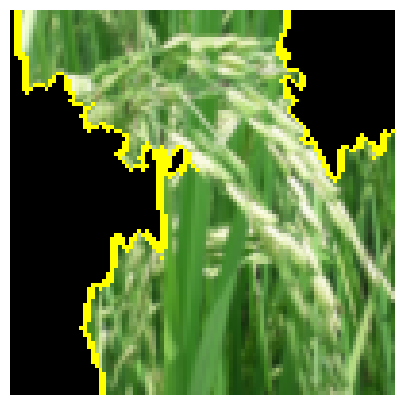

In [24]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (201).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

# Make sure to pass your own prediction function here
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=1, hide_color=0, num_samples=5000)

from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(mark_boundaries(temp, mask))
ax.axis('off')


1/1 [==============================] - 0s 56ms/step
Predicted class: 0, Confidence: [[0.9850127]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 139ms/step


  1%|          | 10/1000 [00:00<00:26, 37.21it/s]

1/1 [==============================] - 0s 79ms/step


  2%|▏         | 20/1000 [00:00<00:23, 42.27it/s]

1/1 [==============================] - 0s 120ms/step


  3%|▎         | 30/1000 [00:00<00:23, 40.75it/s]

1/1 [==============================] - 0s 108ms/step


  4%|▍         | 40/1000 [00:00<00:22, 42.88it/s]

1/1 [==============================] - 0s 93ms/step


  5%|▌         | 50/1000 [00:01<00:20, 45.37it/s]

1/1 [==============================] - 0s 127ms/step


  6%|▌         | 60/1000 [00:01<00:22, 42.34it/s]

1/1 [==============================] - 0s 128ms/step


  7%|▋         | 70/1000 [00:01<00:22, 41.49it/s]

1/1 [==============================] - 0s 127ms/step


  8%|▊         | 80/1000 [00:01<00:22, 41.31it/s]

1/1 [==============================] - 0s 109ms/step


  9%|▉         | 90/1000 [00:02<00:21, 43.12it/s]

1/1 [==============================] - 0s 121ms/step


 10%|█         | 100/1000 [00:02<00:21, 42.65it/s]

1/1 [==============================] - 0s 129ms/step


 11%|█         | 110/1000 [00:02<00:21, 40.67it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█▏        | 120/1000 [00:02<00:21, 40.91it/s]

1/1 [==============================] - 0s 125ms/step


 13%|█▎        | 130/1000 [00:03<00:21, 39.83it/s]

1/1 [==============================] - 0s 123ms/step


 14%|█▍        | 140/1000 [00:03<00:21, 40.93it/s]

1/1 [==============================] - 0s 119ms/step


 15%|█▌        | 150/1000 [00:03<00:20, 40.48it/s]

1/1 [==============================] - 0s 79ms/step


 16%|█▌        | 160/1000 [00:03<00:18, 45.16it/s]

1/1 [==============================] - 0s 120ms/step


 17%|█▋        | 170/1000 [00:04<00:18, 44.86it/s]

1/1 [==============================] - 0s 125ms/step


 18%|█▊        | 180/1000 [00:04<00:18, 45.44it/s]

1/1 [==============================] - 0s 118ms/step


 19%|█▉        | 190/1000 [00:04<00:18, 43.05it/s]

1/1 [==============================] - 0s 105ms/step


 20%|██        | 200/1000 [00:04<00:18, 42.84it/s]

1/1 [==============================] - 0s 76ms/step


 21%|██        | 210/1000 [00:04<00:17, 44.50it/s]

1/1 [==============================] - 0s 72ms/step


 22%|██▏       | 220/1000 [00:05<00:16, 46.88it/s]

1/1 [==============================] - 0s 99ms/step


 23%|██▎       | 230/1000 [00:05<00:16, 47.65it/s]

1/1 [==============================] - 0s 75ms/step


 24%|██▍       | 240/1000 [00:05<00:15, 48.94it/s]

1/1 [==============================] - 0s 83ms/step


 25%|██▌       | 250/1000 [00:05<00:15, 47.32it/s]

1/1 [==============================] - 0s 115ms/step


 26%|██▌       | 260/1000 [00:05<00:16, 44.02it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██▋       | 270/1000 [00:06<00:16, 43.11it/s]

1/1 [==============================] - 0s 127ms/step


 28%|██▊       | 280/1000 [00:06<00:17, 42.18it/s]

1/1 [==============================] - 0s 77ms/step


 29%|██▉       | 290/1000 [00:06<00:15, 45.82it/s]

1/1 [==============================] - 0s 84ms/step


 30%|███       | 300/1000 [00:06<00:14, 48.55it/s]

1/1 [==============================] - 0s 117ms/step


 31%|███       | 310/1000 [00:07<00:15, 44.92it/s]

1/1 [==============================] - 0s 124ms/step


 32%|███▏      | 320/1000 [00:07<00:15, 44.50it/s]

1/1 [==============================] - 0s 123ms/step


 33%|███▎      | 330/1000 [00:07<00:15, 42.71it/s]

1/1 [==============================] - 0s 95ms/step


 34%|███▍      | 340/1000 [00:07<00:15, 43.13it/s]

1/1 [==============================] - 0s 113ms/step


 35%|███▌      | 350/1000 [00:08<00:14, 43.49it/s]

1/1 [==============================] - 0s 111ms/step


 36%|███▌      | 360/1000 [00:08<00:15, 42.05it/s]

1/1 [==============================] - 0s 99ms/step


 37%|███▋      | 370/1000 [00:08<00:15, 41.79it/s]

1/1 [==============================] - 0s 100ms/step


 38%|███▊      | 380/1000 [00:08<00:14, 44.26it/s]

1/1 [==============================] - 0s 94ms/step


 39%|███▉      | 390/1000 [00:08<00:14, 43.40it/s]

1/1 [==============================] - 0s 110ms/step


 40%|████      | 400/1000 [00:09<00:13, 43.04it/s]

1/1 [==============================] - 0s 100ms/step


 41%|████      | 410/1000 [00:09<00:13, 44.42it/s]

1/1 [==============================] - 0s 75ms/step


 42%|████▏     | 420/1000 [00:09<00:12, 47.76it/s]

1/1 [==============================] - 0s 119ms/step


 43%|████▎     | 430/1000 [00:09<00:12, 44.23it/s]

1/1 [==============================] - 0s 108ms/step


 44%|████▍     | 440/1000 [00:10<00:12, 45.50it/s]

1/1 [==============================] - 0s 78ms/step


 45%|████▌     | 450/1000 [00:10<00:12, 42.45it/s]

1/1 [==============================] - 0s 78ms/step


 46%|████▌     | 460/1000 [00:10<00:11, 46.06it/s]

1/1 [==============================] - 0s 81ms/step


 47%|████▋     | 470/1000 [00:10<00:10, 49.05it/s]

1/1 [==============================] - 0s 81ms/step


 48%|████▊     | 480/1000 [00:10<00:10, 51.11it/s]

1/1 [==============================] - 0s 113ms/step


 49%|████▉     | 490/1000 [00:11<00:10, 49.28it/s]

1/1 [==============================] - 0s 105ms/step


 50%|█████     | 500/1000 [00:11<00:10, 46.41it/s]

1/1 [==============================] - 0s 84ms/step


 51%|█████     | 510/1000 [00:11<00:09, 49.21it/s]

1/1 [==============================] - 0s 86ms/step


 52%|█████▏    | 520/1000 [00:11<00:09, 49.52it/s]

1/1 [==============================] - 0s 83ms/step


 53%|█████▎    | 530/1000 [00:11<00:08, 52.49it/s]

1/1 [==============================] - 0s 78ms/step


 54%|█████▍    | 540/1000 [00:12<00:08, 52.79it/s]

1/1 [==============================] - 0s 95ms/step


 55%|█████▌    | 550/1000 [00:12<00:08, 54.26it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████▌    | 560/1000 [00:12<00:07, 55.01it/s]

1/1 [==============================] - 0s 146ms/step


 57%|█████▋    | 570/1000 [00:12<00:08, 51.55it/s]

1/1 [==============================] - 0s 66ms/step


 58%|█████▊    | 580/1000 [00:12<00:07, 54.99it/s]

1/1 [==============================] - 0s 75ms/step


 59%|█████▉    | 590/1000 [00:12<00:07, 56.39it/s]

1/1 [==============================] - 0s 84ms/step


 60%|██████    | 600/1000 [00:13<00:07, 56.30it/s]

1/1 [==============================] - 0s 129ms/step


 61%|██████    | 610/1000 [00:13<00:07, 51.92it/s]

1/1 [==============================] - 0s 72ms/step


 62%|██████▏   | 620/1000 [00:13<00:06, 54.53it/s]

1/1 [==============================] - 0s 86ms/step


 63%|██████▎   | 630/1000 [00:13<00:06, 55.56it/s]

1/1 [==============================] - 0s 82ms/step


 64%|██████▍   | 640/1000 [00:13<00:06, 56.18it/s]

1/1 [==============================] - 0s 109ms/step


 65%|██████▌   | 650/1000 [00:14<00:06, 53.05it/s]

1/1 [==============================] - 0s 70ms/step


 66%|██████▌   | 660/1000 [00:14<00:06, 53.35it/s]

1/1 [==============================] - 0s 102ms/step


 67%|██████▋   | 670/1000 [00:14<00:06, 53.67it/s]

1/1 [==============================] - 0s 72ms/step


 68%|██████▊   | 680/1000 [00:14<00:05, 57.10it/s]

1/1 [==============================] - 0s 70ms/step


 69%|██████▉   | 690/1000 [00:14<00:05, 59.16it/s]

1/1 [==============================] - 0s 101ms/step


 70%|███████   | 700/1000 [00:14<00:05, 58.27it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████   | 710/1000 [00:15<00:04, 59.83it/s]

1/1 [==============================] - 0s 72ms/step


 72%|███████▏  | 720/1000 [00:15<00:04, 60.43it/s]

1/1 [==============================] - 0s 93ms/step


 73%|███████▎  | 730/1000 [00:15<00:04, 59.44it/s]

1/1 [==============================] - 0s 165ms/step


 74%|███████▍  | 740/1000 [00:15<00:05, 50.77it/s]

1/1 [==============================] - 0s 87ms/step


 75%|███████▌  | 750/1000 [00:15<00:04, 52.39it/s]

1/1 [==============================] - 0s 130ms/step


 76%|███████▌  | 760/1000 [00:16<00:04, 48.41it/s]

1/1 [==============================] - 0s 70ms/step


 77%|███████▋  | 770/1000 [00:16<00:04, 51.38it/s]

1/1 [==============================] - 0s 68ms/step


 78%|███████▊  | 780/1000 [00:16<00:03, 55.14it/s]

1/1 [==============================] - 0s 79ms/step


 79%|███████▉  | 790/1000 [00:16<00:03, 56.18it/s]

1/1 [==============================] - 0s 82ms/step


 80%|████████  | 800/1000 [00:16<00:03, 56.51it/s]

1/1 [==============================] - 0s 90ms/step


 81%|████████  | 810/1000 [00:16<00:03, 55.97it/s]

1/1 [==============================] - 0s 124ms/step


 82%|████████▏ | 820/1000 [00:17<00:03, 53.66it/s]

1/1 [==============================] - 0s 72ms/step


 83%|████████▎ | 830/1000 [00:17<00:02, 57.39it/s]

1/1 [==============================] - 0s 101ms/step


 84%|████████▍ | 840/1000 [00:17<00:02, 54.40it/s]

1/1 [==============================] - 0s 82ms/step


 85%|████████▌ | 850/1000 [00:17<00:02, 53.89it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 860/1000 [00:17<00:02, 58.70it/s]

1/1 [==============================] - 0s 100ms/step


 87%|████████▋ | 870/1000 [00:17<00:02, 58.17it/s]

1/1 [==============================] - 0s 86ms/step


 88%|████████▊ | 880/1000 [00:18<00:02, 58.01it/s]

1/1 [==============================] - 0s 75ms/step


 89%|████████▉ | 890/1000 [00:18<00:01, 60.39it/s]

1/1 [==============================] - 0s 132ms/step


 90%|█████████ | 900/1000 [00:18<00:01, 53.37it/s]

1/1 [==============================] - 0s 74ms/step


 91%|█████████ | 910/1000 [00:18<00:01, 54.58it/s]

1/1 [==============================] - 0s 69ms/step


 92%|█████████▏| 920/1000 [00:18<00:01, 57.31it/s]

1/1 [==============================] - 0s 82ms/step


 93%|█████████▎| 930/1000 [00:19<00:01, 58.80it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 940/1000 [00:19<00:01, 57.83it/s]

1/1 [==============================] - 0s 79ms/step


 95%|█████████▌| 950/1000 [00:19<00:00, 57.74it/s]

1/1 [==============================] - 0s 68ms/step


 96%|█████████▌| 960/1000 [00:19<00:00, 57.49it/s]

1/1 [==============================] - 0s 69ms/step


 97%|█████████▋| 970/1000 [00:19<00:00, 59.79it/s]

1/1 [==============================] - 0s 140ms/step


 98%|█████████▊| 980/1000 [00:19<00:00, 54.76it/s]

1/1 [==============================] - 0s 87ms/step


 99%|█████████▉| 990/1000 [00:20<00:00, 54.25it/s]

1/1 [==============================] - 0s 61ms/step


100%|██████████| 1000/1000 [00:20<00:00, 49.32it/s]


(-0.5, 99.5, 99.5, -0.5)

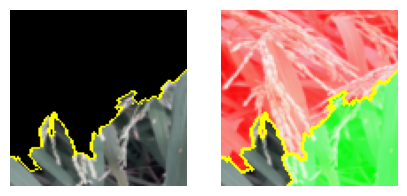

In [159]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (225).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), mobinet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 69ms/step
Predicted class: 0, Confidence: [[0.9848152]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 97ms/step


  1%|          | 10/1000 [00:00<00:22, 43.21it/s]

1/1 [==============================] - 0s 83ms/step


  2%|▏         | 20/1000 [00:00<00:19, 51.29it/s]

1/1 [==============================] - 0s 77ms/step


  3%|▎         | 30/1000 [00:00<00:18, 53.23it/s]

1/1 [==============================] - 0s 99ms/step


  4%|▍         | 40/1000 [00:00<00:18, 50.94it/s]

1/1 [==============================] - 0s 106ms/step


  5%|▌         | 50/1000 [00:00<00:18, 50.94it/s]

1/1 [==============================] - 0s 99ms/step


  6%|▌         | 60/1000 [00:01<00:18, 49.81it/s]

1/1 [==============================] - 0s 114ms/step


  7%|▋         | 70/1000 [00:01<00:19, 47.02it/s]

1/1 [==============================] - 0s 112ms/step


  8%|▊         | 80/1000 [00:01<00:19, 46.11it/s]

1/1 [==============================] - 0s 70ms/step


  9%|▉         | 90/1000 [00:01<00:18, 48.53it/s]

1/1 [==============================] - 0s 74ms/step


 10%|█         | 100/1000 [00:02<00:17, 50.50it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█         | 110/1000 [00:02<00:17, 50.71it/s]

1/1 [==============================] - 0s 99ms/step


 12%|█▏        | 120/1000 [00:02<00:17, 49.09it/s]

1/1 [==============================] - 0s 81ms/step


 13%|█▎        | 130/1000 [00:02<00:16, 52.44it/s]

1/1 [==============================] - 0s 80ms/step


 14%|█▍        | 140/1000 [00:02<00:16, 53.49it/s]

1/1 [==============================] - 0s 102ms/step


 15%|█▌        | 150/1000 [00:02<00:15, 53.52it/s]

1/1 [==============================] - 0s 78ms/step


 16%|█▌        | 160/1000 [00:03<00:15, 52.80it/s]

1/1 [==============================] - 0s 92ms/step


 17%|█▋        | 170/1000 [00:03<00:15, 52.51it/s]

1/1 [==============================] - 0s 101ms/step


 18%|█▊        | 180/1000 [00:03<00:15, 52.30it/s]

1/1 [==============================] - 0s 128ms/step


 19%|█▉        | 190/1000 [00:03<00:17, 47.50it/s]

1/1 [==============================] - 0s 111ms/step


 20%|██        | 200/1000 [00:04<00:16, 47.27it/s]

1/1 [==============================] - 0s 126ms/step


 21%|██        | 210/1000 [00:04<00:18, 43.87it/s]

1/1 [==============================] - 0s 62ms/step


 22%|██▏       | 220/1000 [00:04<00:16, 47.78it/s]

1/1 [==============================] - 0s 130ms/step


 23%|██▎       | 230/1000 [00:04<00:17, 44.70it/s]

1/1 [==============================] - 0s 85ms/step


 24%|██▍       | 240/1000 [00:04<00:17, 44.04it/s]

1/1 [==============================] - 0s 112ms/step


 25%|██▌       | 250/1000 [00:05<00:17, 43.32it/s]

1/1 [==============================] - 0s 85ms/step


 26%|██▌       | 260/1000 [00:05<00:16, 45.01it/s]

1/1 [==============================] - 0s 68ms/step


 27%|██▋       | 270/1000 [00:05<00:15, 47.44it/s]

1/1 [==============================] - 0s 69ms/step


 28%|██▊       | 280/1000 [00:05<00:13, 52.76it/s]

1/1 [==============================] - 0s 71ms/step


 29%|██▉       | 290/1000 [00:05<00:12, 56.20it/s]

1/1 [==============================] - 0s 149ms/step


 30%|███       | 300/1000 [00:06<00:15, 46.59it/s]

1/1 [==============================] - 0s 67ms/step


 31%|███       | 310/1000 [00:06<00:13, 50.65it/s]

1/1 [==============================] - 0s 82ms/step


 32%|███▏      | 320/1000 [00:06<00:13, 50.96it/s]

1/1 [==============================] - 0s 126ms/step


 33%|███▎      | 330/1000 [00:06<00:14, 47.58it/s]

1/1 [==============================] - 0s 122ms/step


 34%|███▍      | 340/1000 [00:06<00:14, 45.56it/s]

1/1 [==============================] - 0s 130ms/step


 35%|███▌      | 350/1000 [00:07<00:15, 42.72it/s]

1/1 [==============================] - 0s 106ms/step


 36%|███▌      | 360/1000 [00:07<00:15, 41.77it/s]

1/1 [==============================] - 0s 134ms/step


 37%|███▋      | 370/1000 [00:07<00:15, 39.56it/s]

1/1 [==============================] - 0s 131ms/step


 38%|███▊      | 380/1000 [00:08<00:15, 39.30it/s]

1/1 [==============================] - 0s 103ms/step


 39%|███▉      | 390/1000 [00:08<00:15, 39.06it/s]

1/1 [==============================] - 0s 136ms/step


 40%|████      | 400/1000 [00:08<00:15, 38.40it/s]

1/1 [==============================] - 0s 117ms/step


 41%|████      | 410/1000 [00:08<00:14, 40.20it/s]

1/1 [==============================] - 0s 111ms/step


 42%|████▏     | 420/1000 [00:09<00:13, 42.68it/s]

1/1 [==============================] - 0s 85ms/step


 43%|████▎     | 430/1000 [00:09<00:12, 44.77it/s]

1/1 [==============================] - 0s 105ms/step


 44%|████▍     | 440/1000 [00:09<00:12, 46.13it/s]

1/1 [==============================] - 0s 127ms/step


 45%|████▌     | 450/1000 [00:09<00:12, 42.69it/s]

1/1 [==============================] - 0s 121ms/step


 46%|████▌     | 460/1000 [00:09<00:13, 40.31it/s]

1/1 [==============================] - 0s 124ms/step


 47%|████▋     | 470/1000 [00:10<00:13, 39.90it/s]

1/1 [==============================] - 0s 110ms/step


 48%|████▊     | 480/1000 [00:10<00:13, 39.81it/s]

1/1 [==============================] - 0s 117ms/step


 49%|████▉     | 490/1000 [00:10<00:12, 40.69it/s]

1/1 [==============================] - 0s 104ms/step


 50%|█████     | 500/1000 [00:10<00:11, 42.68it/s]

1/1 [==============================] - 0s 115ms/step


 51%|█████     | 510/1000 [00:11<00:11, 42.74it/s]

1/1 [==============================] - 0s 108ms/step


 52%|█████▏    | 520/1000 [00:11<00:11, 42.96it/s]

1/1 [==============================] - 0s 89ms/step


 53%|█████▎    | 530/1000 [00:11<00:10, 46.99it/s]

1/1 [==============================] - 0s 119ms/step


 54%|█████▍    | 540/1000 [00:11<00:10, 44.04it/s]

1/1 [==============================] - 0s 85ms/step


 55%|█████▌    | 550/1000 [00:12<00:10, 43.85it/s]

1/1 [==============================] - 0s 116ms/step


 56%|█████▌    | 560/1000 [00:12<00:10, 42.69it/s]

1/1 [==============================] - 0s 70ms/step


 57%|█████▋    | 570/1000 [00:12<00:09, 45.15it/s]

1/1 [==============================] - 0s 120ms/step


 58%|█████▊    | 580/1000 [00:12<00:09, 43.99it/s]

1/1 [==============================] - 0s 87ms/step


 59%|█████▉    | 590/1000 [00:12<00:08, 46.30it/s]

1/1 [==============================] - 0s 122ms/step


 60%|██████    | 600/1000 [00:13<00:09, 43.48it/s]

1/1 [==============================] - 0s 128ms/step


 61%|██████    | 610/1000 [00:13<00:09, 41.69it/s]

1/1 [==============================] - 0s 118ms/step


 62%|██████▏   | 620/1000 [00:13<00:09, 41.08it/s]

1/1 [==============================] - 0s 130ms/step


 63%|██████▎   | 630/1000 [00:13<00:08, 41.18it/s]

1/1 [==============================] - 0s 128ms/step


 64%|██████▍   | 640/1000 [00:14<00:09, 39.31it/s]

1/1 [==============================] - 0s 127ms/step


 65%|██████▌   | 650/1000 [00:14<00:08, 40.56it/s]

1/1 [==============================] - 0s 119ms/step


 66%|██████▌   | 660/1000 [00:14<00:08, 39.59it/s]

1/1 [==============================] - 0s 89ms/step


 67%|██████▋   | 670/1000 [00:14<00:07, 41.50it/s]

1/1 [==============================] - 0s 127ms/step


 68%|██████▊   | 680/1000 [00:15<00:07, 41.15it/s]

1/1 [==============================] - 0s 110ms/step


 69%|██████▉   | 690/1000 [00:15<00:07, 40.80it/s]

1/1 [==============================] - 0s 108ms/step


 70%|███████   | 700/1000 [00:15<00:07, 40.61it/s]

1/1 [==============================] - 0s 129ms/step


 71%|███████   | 710/1000 [00:15<00:07, 40.53it/s]

1/1 [==============================] - 0s 118ms/step


 72%|███████▏  | 720/1000 [00:16<00:06, 40.41it/s]

1/1 [==============================] - 0s 107ms/step


 73%|███████▎  | 730/1000 [00:16<00:06, 41.10it/s]

1/1 [==============================] - 0s 73ms/step


 74%|███████▍  | 740/1000 [00:16<00:05, 45.45it/s]

1/1 [==============================] - 0s 87ms/step


 75%|███████▌  | 750/1000 [00:16<00:05, 47.13it/s]

1/1 [==============================] - 0s 118ms/step


 76%|███████▌  | 760/1000 [00:16<00:05, 44.68it/s]

1/1 [==============================] - 0s 125ms/step


 77%|███████▋  | 770/1000 [00:17<00:05, 43.77it/s]

1/1 [==============================] - 0s 96ms/step


 78%|███████▊  | 780/1000 [00:17<00:05, 42.68it/s]

1/1 [==============================] - 0s 121ms/step


 79%|███████▉  | 790/1000 [00:17<00:05, 41.47it/s]

1/1 [==============================] - 0s 126ms/step


 80%|████████  | 800/1000 [00:18<00:04, 40.33it/s]

1/1 [==============================] - 0s 115ms/step


 81%|████████  | 810/1000 [00:18<00:04, 42.11it/s]

1/1 [==============================] - 0s 102ms/step


 82%|████████▏ | 820/1000 [00:18<00:04, 41.49it/s]

1/1 [==============================] - 0s 115ms/step


 83%|████████▎ | 830/1000 [00:18<00:04, 41.09it/s]

1/1 [==============================] - 0s 126ms/step


 84%|████████▍ | 840/1000 [00:18<00:03, 40.50it/s]

1/1 [==============================] - 0s 114ms/step


 85%|████████▌ | 850/1000 [00:19<00:03, 41.24it/s]

1/1 [==============================] - 0s 115ms/step


 86%|████████▌ | 860/1000 [00:19<00:03, 39.93it/s]

1/1 [==============================] - 0s 130ms/step


 87%|████████▋ | 870/1000 [00:19<00:03, 38.89it/s]

1/1 [==============================] - 0s 114ms/step


 88%|████████▊ | 880/1000 [00:19<00:02, 40.05it/s]

1/1 [==============================] - 0s 97ms/step


 89%|████████▉ | 890/1000 [00:20<00:02, 40.65it/s]

1/1 [==============================] - 0s 89ms/step


 90%|█████████ | 900/1000 [00:20<00:02, 43.79it/s]

1/1 [==============================] - 0s 82ms/step


 91%|█████████ | 910/1000 [00:20<00:01, 47.68it/s]

1/1 [==============================] - 0s 117ms/step


 92%|█████████▏| 920/1000 [00:20<00:01, 46.51it/s]

1/1 [==============================] - 0s 129ms/step


 93%|█████████▎| 930/1000 [00:21<00:01, 41.93it/s]

1/1 [==============================] - 0s 111ms/step


 94%|█████████▍| 940/1000 [00:21<00:01, 41.39it/s]

1/1 [==============================] - 0s 131ms/step


 95%|█████████▌| 950/1000 [00:21<00:01, 40.82it/s]

1/1 [==============================] - 0s 192ms/step


 96%|█████████▌| 960/1000 [00:21<00:01, 36.14it/s]

1/1 [==============================] - 0s 78ms/step


 97%|█████████▋| 970/1000 [00:22<00:00, 40.41it/s]

1/1 [==============================] - 0s 79ms/step


 98%|█████████▊| 980/1000 [00:22<00:00, 42.25it/s]

1/1 [==============================] - 0s 118ms/step


 99%|█████████▉| 990/1000 [00:22<00:00, 42.10it/s]

1/1 [==============================] - 0s 123ms/step


100%|██████████| 1000/1000 [00:22<00:00, 43.82it/s]


(-0.5, 99.5, 99.5, -0.5)

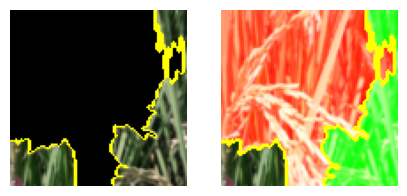

In [160]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (250).jpg'
images = read_and_transform_img(url)
if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), mobinet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


In [161]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (220).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), mobinet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 78ms/step
Predicted class: 0, Confidence: [[0.9850063]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 81ms/step


  1%|          | 10/1000 [00:00<00:16, 60.42it/s]

1/1 [==============================] - 0s 76ms/step


  2%|▏         | 20/1000 [00:00<00:18, 53.99it/s]

1/1 [==============================] - 0s 72ms/step


  3%|▎         | 30/1000 [00:00<00:17, 56.47it/s]

1/1 [==============================] - 0s 100ms/step


  4%|▍         | 40/1000 [00:00<00:18, 52.60it/s]

1/1 [==============================] - 0s 82ms/step


  5%|▌         | 50/1000 [00:00<00:18, 50.70it/s]

1/1 [==============================] - 0s 78ms/step


  6%|▌         | 60/1000 [00:01<00:17, 54.79it/s]

1/1 [==============================] - 0s 67ms/step


  8%|▊         | 79/1000 [00:01<00:15, 60.27it/s]


KeyboardInterrupt: 

1/1 [==============================] - 0s 49ms/step
Predicted class: 0, Confidence: [[0.00202668]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 60ms/step


  1%|          | 10/1000 [00:00<00:11, 83.13it/s]

1/1 [==============================] - 0s 66ms/step


  2%|▏         | 20/1000 [00:00<00:11, 86.01it/s]

1/1 [==============================] - 0s 62ms/step


  3%|▎         | 30/1000 [00:00<00:11, 82.72it/s]

1/1 [==============================] - 0s 68ms/step


  4%|▍         | 40/1000 [00:00<00:12, 75.07it/s]

1/1 [==============================] - 0s 60ms/step


  5%|▌         | 50/1000 [00:00<00:12, 78.63it/s]

1/1 [==============================] - 0s 60ms/step


  6%|▌         | 60/1000 [00:00<00:11, 80.77it/s]

1/1 [==============================] - 0s 59ms/step


  7%|▋         | 70/1000 [00:00<00:11, 82.53it/s]

1/1 [==============================] - 0s 67ms/step


  8%|▊         | 80/1000 [00:00<00:11, 83.54it/s]

1/1 [==============================] - 0s 68ms/step


  9%|▉         | 90/1000 [00:01<00:11, 80.50it/s]

1/1 [==============================] - 0s 60ms/step


 10%|█         | 100/1000 [00:01<00:11, 80.36it/s]

1/1 [==============================] - 0s 68ms/step


 11%|█         | 110/1000 [00:01<00:11, 80.38it/s]

1/1 [==============================] - 0s 69ms/step


 12%|█▏        | 120/1000 [00:01<00:11, 75.21it/s]

1/1 [==============================] - 0s 75ms/step


 13%|█▎        | 130/1000 [00:01<00:11, 75.50it/s]

1/1 [==============================] - 0s 59ms/step


 14%|█▍        | 140/1000 [00:01<00:10, 78.30it/s]

1/1 [==============================] - 0s 67ms/step


 15%|█▌        | 150/1000 [00:01<00:10, 77.35it/s]

1/1 [==============================] - 0s 65ms/step


 16%|█▌        | 160/1000 [00:02<00:10, 78.45it/s]

1/1 [==============================] - 0s 59ms/step


 17%|█▋        | 170/1000 [00:02<00:10, 80.01it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 180/1000 [00:02<00:10, 78.47it/s]

1/1 [==============================] - 0s 67ms/step


 19%|█▉        | 190/1000 [00:02<00:10, 78.94it/s]

1/1 [==============================] - 0s 75ms/step


 20%|██        | 200/1000 [00:02<00:10, 76.32it/s]

1/1 [==============================] - 0s 67ms/step


 21%|██        | 210/1000 [00:02<00:10, 75.93it/s]

1/1 [==============================] - 0s 61ms/step


 22%|██▏       | 220/1000 [00:02<00:10, 75.34it/s]

1/1 [==============================] - 0s 107ms/step


 23%|██▎       | 230/1000 [00:03<00:12, 63.99it/s]

1/1 [==============================] - 0s 91ms/step


 24%|██▍       | 240/1000 [00:03<00:12, 58.75it/s]

1/1 [==============================] - 0s 77ms/step


 25%|██▌       | 250/1000 [00:03<00:12, 58.99it/s]

1/1 [==============================] - 0s 68ms/step


 26%|██▌       | 260/1000 [00:03<00:11, 63.01it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██▋       | 270/1000 [00:03<00:10, 67.23it/s]

1/1 [==============================] - 0s 67ms/step


 28%|██▊       | 280/1000 [00:03<00:10, 69.39it/s]

1/1 [==============================] - 0s 59ms/step


 29%|██▉       | 290/1000 [00:03<00:09, 73.62it/s]

1/1 [==============================] - 0s 65ms/step


 30%|███       | 300/1000 [00:04<00:09, 74.54it/s]

1/1 [==============================] - 0s 89ms/step


 31%|███       | 310/1000 [00:04<00:09, 71.39it/s]

1/1 [==============================] - 0s 81ms/step


 32%|███▏      | 320/1000 [00:04<00:10, 65.70it/s]

1/1 [==============================] - 0s 63ms/step


 33%|███▎      | 330/1000 [00:04<00:09, 69.25it/s]

1/1 [==============================] - 0s 86ms/step


 34%|███▍      | 340/1000 [00:04<00:09, 66.10it/s]

1/1 [==============================] - 0s 65ms/step


 35%|███▌      | 350/1000 [00:04<00:09, 68.09it/s]

1/1 [==============================] - 0s 63ms/step


 36%|███▌      | 360/1000 [00:04<00:09, 69.31it/s]

1/1 [==============================] - 0s 66ms/step


 37%|███▋      | 370/1000 [00:05<00:09, 69.97it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 380/1000 [00:05<00:08, 74.36it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▉      | 390/1000 [00:05<00:08, 75.01it/s]

1/1 [==============================] - 0s 67ms/step


 40%|████      | 400/1000 [00:05<00:08, 72.53it/s]

1/1 [==============================] - 0s 58ms/step


 41%|████      | 410/1000 [00:05<00:07, 74.59it/s]

1/1 [==============================] - 0s 59ms/step


 42%|████▏     | 420/1000 [00:05<00:07, 77.63it/s]

1/1 [==============================] - 0s 78ms/step


 43%|████▎     | 430/1000 [00:05<00:07, 73.09it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▍     | 440/1000 [00:06<00:07, 72.37it/s]

1/1 [==============================] - 0s 70ms/step


 45%|████▌     | 450/1000 [00:06<00:07, 72.71it/s]

1/1 [==============================] - 0s 62ms/step


 46%|████▌     | 460/1000 [00:06<00:06, 77.17it/s]

1/1 [==============================] - 0s 76ms/step


 47%|████▋     | 470/1000 [00:06<00:07, 72.62it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 480/1000 [00:06<00:07, 73.75it/s]

1/1 [==============================] - 0s 67ms/step


 49%|████▉     | 490/1000 [00:06<00:06, 73.68it/s]

1/1 [==============================] - 0s 67ms/step


 50%|█████     | 500/1000 [00:06<00:06, 75.29it/s]

1/1 [==============================] - 0s 68ms/step


 51%|█████     | 510/1000 [00:06<00:06, 77.79it/s]

1/1 [==============================] - 0s 76ms/step


 52%|█████▏    | 520/1000 [00:07<00:06, 75.48it/s]

1/1 [==============================] - 0s 67ms/step


 53%|█████▎    | 530/1000 [00:07<00:06, 75.65it/s]

1/1 [==============================] - 0s 68ms/step


 54%|█████▍    | 540/1000 [00:07<00:06, 72.71it/s]

1/1 [==============================] - 0s 67ms/step


 55%|█████▌    | 550/1000 [00:07<00:05, 75.73it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████▌    | 560/1000 [00:07<00:05, 77.43it/s]

1/1 [==============================] - 0s 66ms/step


 57%|█████▋    | 570/1000 [00:07<00:05, 76.63it/s]

1/1 [==============================] - 0s 75ms/step


 58%|█████▊    | 580/1000 [00:07<00:05, 73.43it/s]

1/1 [==============================] - 0s 67ms/step


 59%|█████▉    | 590/1000 [00:08<00:05, 73.31it/s]

1/1 [==============================] - 0s 66ms/step


 60%|██████    | 600/1000 [00:08<00:05, 75.51it/s]

1/1 [==============================] - 0s 64ms/step


 61%|██████    | 610/1000 [00:08<00:04, 78.34it/s]

1/1 [==============================] - 0s 58ms/step


 62%|██████▏   | 620/1000 [00:08<00:04, 78.88it/s]

1/1 [==============================] - 0s 67ms/step


 63%|██████▎   | 630/1000 [00:08<00:04, 74.64it/s]

1/1 [==============================] - 0s 61ms/step


 64%|██████▍   | 640/1000 [00:08<00:04, 75.70it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▌   | 650/1000 [00:08<00:04, 75.72it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 660/1000 [00:08<00:04, 77.00it/s]

1/1 [==============================] - 0s 71ms/step


 67%|██████▋   | 670/1000 [00:09<00:04, 76.90it/s]

1/1 [==============================] - 0s 79ms/step


 68%|██████▊   | 680/1000 [00:09<00:04, 75.78it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 690/1000 [00:09<00:03, 78.57it/s]

1/1 [==============================] - 0s 68ms/step


 70%|███████   | 700/1000 [00:09<00:03, 79.08it/s]

1/1 [==============================] - 0s 77ms/step


 71%|███████   | 710/1000 [00:09<00:03, 74.75it/s]

1/1 [==============================] - 0s 66ms/step


 72%|███████▏  | 720/1000 [00:09<00:03, 76.34it/s]

1/1 [==============================] - 0s 66ms/step


 73%|███████▎  | 730/1000 [00:09<00:03, 77.68it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 740/1000 [00:09<00:03, 79.82it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▌  | 750/1000 [00:10<00:03, 80.28it/s]

1/1 [==============================] - 0s 54ms/step


 76%|███████▌  | 760/1000 [00:10<00:02, 81.20it/s]

1/1 [==============================] - 0s 68ms/step


 77%|███████▋  | 770/1000 [00:10<00:02, 78.63it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 780/1000 [00:10<00:02, 80.86it/s]

1/1 [==============================] - 0s 60ms/step


 79%|███████▉  | 790/1000 [00:10<00:02, 80.54it/s]

1/1 [==============================] - 0s 66ms/step


 80%|████████  | 800/1000 [00:10<00:02, 77.53it/s]

1/1 [==============================] - 0s 75ms/step


 81%|████████  | 810/1000 [00:10<00:02, 75.07it/s]

1/1 [==============================] - 0s 79ms/step


 82%|████████▏ | 820/1000 [00:10<00:02, 71.62it/s]

1/1 [==============================] - 0s 58ms/step


 83%|████████▎ | 830/1000 [00:11<00:02, 71.79it/s]

1/1 [==============================] - 0s 75ms/step


 84%|████████▍ | 840/1000 [00:11<00:02, 68.57it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▌ | 850/1000 [00:11<00:02, 72.24it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 860/1000 [00:11<00:01, 77.21it/s]

1/1 [==============================] - 0s 68ms/step


 87%|████████▋ | 870/1000 [00:11<00:01, 79.36it/s]

1/1 [==============================] - 0s 67ms/step


 88%|████████▊ | 880/1000 [00:11<00:01, 78.20it/s]

1/1 [==============================] - 0s 59ms/step


 89%|████████▉ | 890/1000 [00:11<00:01, 80.28it/s]

1/1 [==============================] - 0s 62ms/step


 90%|█████████ | 900/1000 [00:12<00:01, 80.92it/s]

1/1 [==============================] - 0s 66ms/step


 91%|█████████ | 910/1000 [00:12<00:01, 81.58it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 920/1000 [00:12<00:00, 84.32it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 930/1000 [00:12<00:00, 84.71it/s]

1/1 [==============================] - 0s 81ms/step


 94%|█████████▍| 940/1000 [00:12<00:00, 76.73it/s]

1/1 [==============================] - 0s 76ms/step


 95%|█████████▌| 950/1000 [00:12<00:00, 69.71it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 960/1000 [00:12<00:00, 73.98it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 970/1000 [00:12<00:00, 77.22it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 980/1000 [00:13<00:00, 79.34it/s]

1/1 [==============================] - 0s 60ms/step


 99%|█████████▉| 990/1000 [00:13<00:00, 78.06it/s]

1/1 [==============================] - 0s 65ms/step


100%|██████████| 1000/1000 [00:13<00:00, 75.24it/s]


(-0.5, 99.5, 99.5, -0.5)

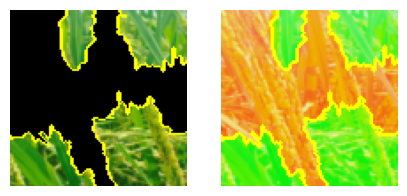

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (360).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), mobinet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')

1/1 [==============================] - 0s 50ms/step
Predicted class: 0, Confidence: [[0.00201543]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 68ms/step


  1%|          | 10/1000 [00:00<00:13, 74.33it/s]

1/1 [==============================] - 0s 68ms/step


  2%|▏         | 20/1000 [00:00<00:12, 77.33it/s]

1/1 [==============================] - 0s 68ms/step


  3%|▎         | 30/1000 [00:00<00:12, 78.17it/s]

1/1 [==============================] - 0s 54ms/step


  4%|▍         | 40/1000 [00:00<00:11, 80.21it/s]

1/1 [==============================] - 0s 59ms/step


  5%|▌         | 50/1000 [00:00<00:11, 82.19it/s]

1/1 [==============================] - 0s 67ms/step


  6%|▌         | 60/1000 [00:00<00:11, 83.36it/s]

1/1 [==============================] - 0s 59ms/step


  7%|▋         | 70/1000 [00:00<00:11, 83.74it/s]

1/1 [==============================] - 0s 65ms/step


  8%|▊         | 80/1000 [00:00<00:11, 82.49it/s]

1/1 [==============================] - 0s 68ms/step


  9%|▉         | 90/1000 [00:01<00:10, 83.06it/s]

1/1 [==============================] - 0s 85ms/step


 10%|█         | 100/1000 [00:01<00:11, 75.64it/s]

1/1 [==============================] - 0s 58ms/step


 11%|█         | 110/1000 [00:01<00:11, 76.89it/s]

1/1 [==============================] - 0s 60ms/step


 12%|█▏        | 120/1000 [00:01<00:11, 79.25it/s]

1/1 [==============================] - 0s 67ms/step


 13%|█▎        | 130/1000 [00:01<00:11, 78.22it/s]

1/1 [==============================] - 0s 68ms/step


 14%|█▍        | 140/1000 [00:01<00:10, 78.55it/s]

1/1 [==============================] - 0s 67ms/step


 15%|█▌        | 150/1000 [00:01<00:10, 80.39it/s]

1/1 [==============================] - 0s 56ms/step


 16%|█▌        | 160/1000 [00:02<00:10, 79.21it/s]

1/1 [==============================] - 0s 67ms/step


 17%|█▋        | 170/1000 [00:02<00:10, 79.24it/s]

1/1 [==============================] - 0s 82ms/step


 18%|█▊        | 180/1000 [00:02<00:10, 75.20it/s]

1/1 [==============================] - 0s 61ms/step


 19%|█▉        | 190/1000 [00:02<00:10, 77.46it/s]

1/1 [==============================] - 0s 67ms/step


 20%|██        | 200/1000 [00:02<00:10, 77.14it/s]

1/1 [==============================] - 0s 67ms/step


 21%|██        | 210/1000 [00:02<00:10, 77.89it/s]

1/1 [==============================] - 0s 68ms/step


 22%|██▏       | 220/1000 [00:02<00:09, 78.45it/s]

1/1 [==============================] - 0s 68ms/step


 23%|██▎       | 230/1000 [00:02<00:09, 78.75it/s]

1/1 [==============================] - 0s 60ms/step


 24%|██▍       | 240/1000 [00:03<00:09, 76.30it/s]

1/1 [==============================] - 0s 67ms/step


 25%|██▌       | 250/1000 [00:03<00:09, 78.78it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▌       | 260/1000 [00:03<00:09, 77.53it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██▋       | 270/1000 [00:03<00:09, 78.29it/s]

1/1 [==============================] - 0s 76ms/step


 28%|██▊       | 280/1000 [00:03<00:09, 74.33it/s]

1/1 [==============================] - 0s 59ms/step


 29%|██▉       | 290/1000 [00:03<00:09, 77.35it/s]

1/1 [==============================] - 0s 67ms/step


 30%|███       | 300/1000 [00:03<00:08, 79.65it/s]

1/1 [==============================] - 0s 60ms/step


 31%|███       | 310/1000 [00:03<00:08, 79.48it/s]

1/1 [==============================] - 0s 69ms/step


 32%|███▏      | 320/1000 [00:04<00:08, 81.52it/s]

1/1 [==============================] - 0s 87ms/step


 33%|███▎      | 330/1000 [00:04<00:09, 70.35it/s]

1/1 [==============================] - 0s 76ms/step


 34%|███▍      | 340/1000 [00:04<00:09, 69.57it/s]

1/1 [==============================] - 0s 75ms/step


 35%|███▌      | 350/1000 [00:04<00:09, 67.65it/s]

1/1 [==============================] - 0s 64ms/step


 36%|███▌      | 360/1000 [00:04<00:09, 69.33it/s]

1/1 [==============================] - 0s 68ms/step


 37%|███▋      | 370/1000 [00:04<00:08, 72.06it/s]

1/1 [==============================] - 0s 63ms/step


 38%|███▊      | 380/1000 [00:04<00:08, 72.67it/s]

1/1 [==============================] - 0s 63ms/step


 39%|███▉      | 390/1000 [00:05<00:08, 74.00it/s]

1/1 [==============================] - 0s 69ms/step


 40%|████      | 400/1000 [00:05<00:07, 75.40it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 410/1000 [00:05<00:07, 75.67it/s]

1/1 [==============================] - 0s 67ms/step


 42%|████▏     | 420/1000 [00:05<00:07, 75.53it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 430/1000 [00:05<00:07, 77.31it/s]

1/1 [==============================] - 0s 70ms/step


 44%|████▍     | 440/1000 [00:05<00:07, 79.03it/s]

1/1 [==============================] - 0s 60ms/step


 45%|████▌     | 450/1000 [00:05<00:07, 77.57it/s]

1/1 [==============================] - 0s 77ms/step


 46%|████▌     | 460/1000 [00:05<00:07, 74.66it/s]

1/1 [==============================] - 0s 62ms/step


 47%|████▋     | 470/1000 [00:06<00:07, 75.62it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 480/1000 [00:06<00:06, 77.12it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 490/1000 [00:06<00:06, 77.68it/s]

1/1 [==============================] - 0s 69ms/step


 50%|█████     | 500/1000 [00:06<00:06, 75.77it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████     | 510/1000 [00:06<00:06, 75.93it/s]

1/1 [==============================] - 0s 69ms/step


 52%|█████▏    | 520/1000 [00:06<00:06, 68.72it/s]

1/1 [==============================] - 0s 76ms/step


 53%|█████▎    | 530/1000 [00:06<00:07, 65.37it/s]

1/1 [==============================] - 0s 76ms/step


 54%|█████▍    | 540/1000 [00:07<00:07, 61.93it/s]

1/1 [==============================] - 0s 67ms/step


 55%|█████▌    | 550/1000 [00:07<00:07, 63.00it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 560/1000 [00:07<00:06, 66.38it/s]

1/1 [==============================] - 0s 71ms/step


 57%|█████▋    | 570/1000 [00:07<00:06, 66.89it/s]

1/1 [==============================] - 0s 70ms/step


 58%|█████▊    | 580/1000 [00:07<00:06, 67.48it/s]

1/1 [==============================] - 0s 75ms/step


 59%|█████▉    | 590/1000 [00:07<00:06, 67.24it/s]

1/1 [==============================] - 0s 105ms/step


 60%|██████    | 600/1000 [00:08<00:06, 60.65it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████    | 610/1000 [00:08<00:06, 63.46it/s]

1/1 [==============================] - 0s 101ms/step


 62%|██████▏   | 620/1000 [00:08<00:06, 59.48it/s]

1/1 [==============================] - 0s 85ms/step


 63%|██████▎   | 630/1000 [00:08<00:06, 58.77it/s]

1/1 [==============================] - 0s 84ms/step


 64%|██████▍   | 640/1000 [00:08<00:05, 60.16it/s]

1/1 [==============================] - 0s 62ms/step


 65%|██████▌   | 650/1000 [00:08<00:05, 65.74it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 660/1000 [00:08<00:04, 71.00it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 670/1000 [00:09<00:04, 73.60it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 680/1000 [00:09<00:04, 74.92it/s]

1/1 [==============================] - 0s 69ms/step


 69%|██████▉   | 690/1000 [00:09<00:04, 76.96it/s]

1/1 [==============================] - 0s 66ms/step


 70%|███████   | 700/1000 [00:09<00:03, 77.85it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 710/1000 [00:09<00:03, 78.79it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 720/1000 [00:09<00:03, 82.07it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 730/1000 [00:09<00:03, 83.05it/s]

1/1 [==============================] - 0s 68ms/step


 74%|███████▍  | 740/1000 [00:09<00:03, 80.55it/s]

1/1 [==============================] - 0s 68ms/step


 75%|███████▌  | 750/1000 [00:10<00:03, 80.05it/s]

1/1 [==============================] - 0s 86ms/step


 76%|███████▌  | 760/1000 [00:10<00:03, 75.15it/s]

1/1 [==============================] - 0s 67ms/step


 77%|███████▋  | 770/1000 [00:10<00:03, 75.55it/s]

1/1 [==============================] - 0s 68ms/step


 78%|███████▊  | 780/1000 [00:10<00:02, 75.20it/s]

1/1 [==============================] - 0s 78ms/step


 79%|███████▉  | 790/1000 [00:10<00:02, 73.38it/s]

1/1 [==============================] - 0s 59ms/step


 80%|████████  | 800/1000 [00:10<00:02, 75.71it/s]

1/1 [==============================] - 0s 76ms/step


 81%|████████  | 810/1000 [00:10<00:02, 75.32it/s]

1/1 [==============================] - 0s 76ms/step


 82%|████████▏ | 820/1000 [00:11<00:02, 72.40it/s]

1/1 [==============================] - 0s 59ms/step


 83%|████████▎ | 830/1000 [00:11<00:02, 73.16it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 840/1000 [00:11<00:02, 73.65it/s]

1/1 [==============================] - 0s 59ms/step


 85%|████████▌ | 850/1000 [00:11<00:01, 77.03it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 860/1000 [00:11<00:01, 80.81it/s]

1/1 [==============================] - 0s 68ms/step


 87%|████████▋ | 870/1000 [00:11<00:01, 80.94it/s]

1/1 [==============================] - 0s 85ms/step


 88%|████████▊ | 880/1000 [00:11<00:01, 74.45it/s]

1/1 [==============================] - 0s 72ms/step


 89%|████████▉ | 890/1000 [00:12<00:01, 68.80it/s]

1/1 [==============================] - 0s 59ms/step


 90%|█████████ | 900/1000 [00:12<00:01, 67.60it/s]

1/1 [==============================] - 0s 85ms/step


 91%|█████████ | 910/1000 [00:12<00:01, 66.04it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 920/1000 [00:12<00:01, 67.25it/s]

1/1 [==============================] - 0s 66ms/step


 93%|█████████▎| 930/1000 [00:12<00:00, 72.06it/s]

1/1 [==============================] - 0s 68ms/step


 94%|█████████▍| 940/1000 [00:12<00:00, 72.76it/s]

1/1 [==============================] - 0s 65ms/step


 95%|█████████▌| 950/1000 [00:12<00:00, 73.55it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▌| 960/1000 [00:12<00:00, 75.49it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 970/1000 [00:13<00:00, 76.65it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 980/1000 [00:13<00:00, 77.33it/s]

1/1 [==============================] - 0s 59ms/step


 99%|█████████▉| 990/1000 [00:13<00:00, 76.87it/s]

1/1 [==============================] - 0s 59ms/step


100%|██████████| 1000/1000 [00:13<00:00, 74.14it/s]


(-0.5, 99.5, 99.5, -0.5)

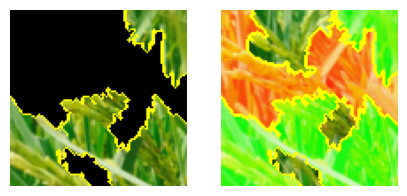

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (372).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), mobinet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')

1/1 [==============================] - 0s 42ms/step
Predicted class: 0, Confidence: [[0.00207827]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 65ms/step


  1%|          | 10/1000 [00:00<00:13, 72.23it/s]

1/1 [==============================] - 0s 70ms/step


  2%|▏         | 20/1000 [00:00<00:13, 70.61it/s]

1/1 [==============================] - 0s 76ms/step


  3%|▎         | 30/1000 [00:00<00:13, 70.81it/s]

1/1 [==============================] - 0s 79ms/step


  4%|▍         | 40/1000 [00:00<00:14, 64.04it/s]

1/1 [==============================] - 0s 100ms/step


  5%|▌         | 50/1000 [00:00<00:17, 55.69it/s]

1/1 [==============================] - 0s 74ms/step


  6%|▌         | 60/1000 [00:01<00:16, 55.58it/s]

1/1 [==============================] - 0s 96ms/step


  7%|▋         | 70/1000 [00:01<00:17, 52.53it/s]

1/1 [==============================] - 0s 69ms/step


  8%|▊         | 80/1000 [00:01<00:17, 51.94it/s]

1/1 [==============================] - 0s 66ms/step


  9%|▉         | 90/1000 [00:01<00:16, 56.22it/s]

1/1 [==============================] - 0s 77ms/step


 10%|█         | 100/1000 [00:01<00:16, 54.95it/s]

1/1 [==============================] - 0s 57ms/step


 11%|█         | 110/1000 [00:01<00:15, 58.80it/s]

1/1 [==============================] - 0s 101ms/step


 12%|█▏        | 120/1000 [00:02<00:16, 54.98it/s]

1/1 [==============================] - 0s 98ms/step


 13%|█▎        | 130/1000 [00:02<00:16, 51.74it/s]

1/1 [==============================] - 0s 76ms/step


 14%|█▍        | 140/1000 [00:02<00:16, 51.51it/s]

1/1 [==============================] - 0s 92ms/step


 15%|█▌        | 150/1000 [00:02<00:16, 51.90it/s]

1/1 [==============================] - 0s 102ms/step


 16%|█▌        | 160/1000 [00:02<00:16, 49.49it/s]

1/1 [==============================] - 0s 92ms/step


 17%|█▋        | 170/1000 [00:03<00:17, 47.93it/s]

1/1 [==============================] - 0s 100ms/step


 18%|█▊        | 180/1000 [00:03<00:17, 47.55it/s]

1/1 [==============================] - 0s 76ms/step


 19%|█▉        | 190/1000 [00:03<00:16, 48.07it/s]

1/1 [==============================] - 0s 87ms/step


 20%|██        | 200/1000 [00:03<00:16, 48.27it/s]

1/1 [==============================] - 0s 92ms/step


 21%|██        | 210/1000 [00:03<00:16, 48.95it/s]

1/1 [==============================] - 0s 88ms/step


 22%|██▏       | 220/1000 [00:04<00:16, 48.59it/s]

1/1 [==============================] - 0s 87ms/step


 23%|██▎       | 230/1000 [00:04<00:15, 48.36it/s]

1/1 [==============================] - 0s 92ms/step


 24%|██▍       | 240/1000 [00:04<00:16, 47.06it/s]

1/1 [==============================] - 0s 69ms/step


 25%|██▌       | 250/1000 [00:04<00:15, 48.96it/s]

1/1 [==============================] - 0s 92ms/step


 26%|██▌       | 260/1000 [00:05<00:15, 48.24it/s]

1/1 [==============================] - 0s 83ms/step


 27%|██▋       | 270/1000 [00:05<00:15, 48.42it/s]

1/1 [==============================] - 0s 90ms/step


 28%|██▊       | 280/1000 [00:05<00:15, 47.68it/s]

1/1 [==============================] - 0s 83ms/step


 29%|██▉       | 290/1000 [00:05<00:14, 49.07it/s]

1/1 [==============================] - 0s 63ms/step


 30%|███       | 300/1000 [00:05<00:14, 49.69it/s]

1/1 [==============================] - 0s 102ms/step


 31%|███       | 310/1000 [00:06<00:13, 50.47it/s]

1/1 [==============================] - 0s 76ms/step


 32%|███▏      | 320/1000 [00:06<00:13, 49.76it/s]

1/1 [==============================] - 0s 64ms/step


 33%|███▎      | 330/1000 [00:06<00:12, 54.61it/s]

1/1 [==============================] - 0s 69ms/step


 34%|███▍      | 340/1000 [00:06<00:11, 58.48it/s]

1/1 [==============================] - 0s 108ms/step


 35%|███▌      | 350/1000 [00:06<00:12, 53.18it/s]

1/1 [==============================] - 0s 107ms/step


 36%|███▌      | 360/1000 [00:06<00:12, 49.99it/s]

1/1 [==============================] - 0s 84ms/step


 37%|███▋      | 370/1000 [00:07<00:12, 49.31it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 380/1000 [00:07<00:12, 50.85it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▉      | 390/1000 [00:07<00:11, 54.78it/s]

1/1 [==============================] - 0s 60ms/step


 40%|████      | 400/1000 [00:07<00:10, 56.91it/s]

1/1 [==============================] - 0s 67ms/step


 41%|████      | 410/1000 [00:07<00:10, 55.47it/s]

1/1 [==============================] - 0s 68ms/step


 42%|████▏     | 420/1000 [00:08<00:09, 58.49it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 430/1000 [00:08<00:09, 60.90it/s]

1/1 [==============================] - 0s 94ms/step


 44%|████▍     | 440/1000 [00:08<00:09, 57.21it/s]

1/1 [==============================] - 0s 102ms/step


 45%|████▌     | 450/1000 [00:08<00:10, 53.75it/s]

1/1 [==============================] - 0s 95ms/step


 46%|████▌     | 460/1000 [00:08<00:10, 49.82it/s]

1/1 [==============================] - 0s 68ms/step


 47%|████▋     | 470/1000 [00:09<00:20, 25.28it/s]

1/1 [==============================] - 0s 75ms/step


 48%|████▊     | 480/1000 [00:09<00:16, 31.33it/s]

1/1 [==============================] - 0s 116ms/step


 49%|████▉     | 490/1000 [00:10<00:14, 34.17it/s]

1/1 [==============================] - 0s 74ms/step


 50%|█████     | 500/1000 [00:10<00:13, 37.88it/s]

1/1 [==============================] - 0s 108ms/step


 51%|█████     | 510/1000 [00:10<00:12, 39.79it/s]

1/1 [==============================] - 0s 102ms/step


 52%|█████▏    | 520/1000 [00:10<00:11, 40.66it/s]

1/1 [==============================] - 0s 96ms/step


 53%|█████▎    | 530/1000 [00:10<00:11, 42.42it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▍    | 540/1000 [00:11<00:10, 43.47it/s]

1/1 [==============================] - 0s 74ms/step


 55%|█████▌    | 550/1000 [00:11<00:09, 48.90it/s]

1/1 [==============================] - 0s 92ms/step


 56%|█████▌    | 560/1000 [00:11<00:08, 48.97it/s]

1/1 [==============================] - 0s 97ms/step


 57%|█████▋    | 570/1000 [00:11<00:09, 47.61it/s]

1/1 [==============================] - 0s 97ms/step


 58%|█████▊    | 580/1000 [00:11<00:08, 47.41it/s]

1/1 [==============================] - 0s 77ms/step


 59%|█████▉    | 590/1000 [00:12<00:08, 48.84it/s]

1/1 [==============================] - 0s 67ms/step


 60%|██████    | 600/1000 [00:12<00:07, 50.61it/s]

1/1 [==============================] - 0s 90ms/step


 61%|██████    | 610/1000 [00:12<00:07, 49.92it/s]

1/1 [==============================] - 0s 65ms/step


 62%|██████▏   | 620/1000 [00:12<00:07, 50.79it/s]

1/1 [==============================] - 0s 75ms/step


 63%|██████▎   | 630/1000 [00:12<00:06, 53.95it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████▍   | 640/1000 [00:13<00:06, 52.34it/s]

1/1 [==============================] - 0s 64ms/step


 65%|██████▌   | 650/1000 [00:13<00:06, 57.63it/s]

1/1 [==============================] - 0s 91ms/step


 66%|██████▌   | 660/1000 [00:13<00:06, 55.06it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████▋   | 670/1000 [00:13<00:06, 52.10it/s]

1/1 [==============================] - 0s 109ms/step


 68%|██████▊   | 680/1000 [00:13<00:06, 50.32it/s]

1/1 [==============================] - 0s 68ms/step


 69%|██████▉   | 690/1000 [00:13<00:06, 50.80it/s]

1/1 [==============================] - 0s 101ms/step


 70%|███████   | 700/1000 [00:14<00:05, 50.07it/s]

1/1 [==============================] - 0s 74ms/step


 71%|███████   | 710/1000 [00:14<00:05, 50.38it/s]

1/1 [==============================] - 0s 101ms/step


 72%|███████▏  | 720/1000 [00:14<00:05, 48.98it/s]

1/1 [==============================] - 0s 68ms/step


 73%|███████▎  | 730/1000 [00:14<00:05, 49.91it/s]

1/1 [==============================] - 0s 92ms/step


 74%|███████▍  | 740/1000 [00:14<00:05, 49.95it/s]

1/1 [==============================] - 0s 90ms/step


 75%|███████▌  | 750/1000 [00:15<00:05, 49.15it/s]

1/1 [==============================] - 0s 91ms/step


 76%|███████▌  | 760/1000 [00:15<00:04, 49.36it/s]

1/1 [==============================] - 0s 77ms/step


 77%|███████▋  | 770/1000 [00:15<00:04, 50.04it/s]

1/1 [==============================] - 0s 103ms/step


 78%|███████▊  | 780/1000 [00:15<00:04, 48.29it/s]

1/1 [==============================] - 0s 66ms/step


 79%|███████▉  | 790/1000 [00:16<00:04, 49.49it/s]

1/1 [==============================] - 0s 68ms/step


 80%|████████  | 800/1000 [00:16<00:03, 52.29it/s]

1/1 [==============================] - 0s 97ms/step


 81%|████████  | 810/1000 [00:16<00:03, 50.74it/s]

1/1 [==============================] - 0s 93ms/step


 82%|████████▏ | 820/1000 [00:16<00:03, 48.67it/s]

1/1 [==============================] - 0s 108ms/step


 83%|████████▎ | 830/1000 [00:16<00:03, 46.74it/s]

1/1 [==============================] - 0s 100ms/step


 84%|████████▍ | 840/1000 [00:17<00:03, 46.07it/s]

1/1 [==============================] - 0s 99ms/step


 85%|████████▌ | 850/1000 [00:17<00:03, 46.23it/s]

1/1 [==============================] - 0s 67ms/step


 86%|████████▌ | 860/1000 [00:17<00:02, 49.19it/s]

1/1 [==============================] - 0s 56ms/step


 87%|████████▋ | 870/1000 [00:17<00:02, 52.55it/s]

1/1 [==============================] - 0s 96ms/step


 88%|████████▊ | 880/1000 [00:17<00:02, 49.87it/s]

1/1 [==============================] - 0s 66ms/step


 89%|████████▉ | 890/1000 [00:18<00:02, 52.06it/s]

1/1 [==============================] - 0s 92ms/step


 90%|█████████ | 900/1000 [00:18<00:01, 50.74it/s]

1/1 [==============================] - 0s 72ms/step


 91%|█████████ | 910/1000 [00:18<00:01, 51.07it/s]

1/1 [==============================] - 0s 81ms/step


 92%|█████████▏| 920/1000 [00:18<00:01, 52.48it/s]

1/1 [==============================] - 0s 100ms/step


 93%|█████████▎| 930/1000 [00:18<00:01, 50.40it/s]

1/1 [==============================] - 0s 101ms/step


 94%|█████████▍| 940/1000 [00:19<00:01, 48.47it/s]

1/1 [==============================] - 0s 100ms/step


 95%|█████████▌| 950/1000 [00:19<00:01, 47.81it/s]

1/1 [==============================] - 0s 82ms/step


 96%|█████████▌| 960/1000 [00:19<00:00, 46.60it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 970/1000 [00:19<00:00, 52.68it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 980/1000 [00:19<00:00, 55.14it/s]

1/1 [==============================] - 0s 75ms/step


 99%|█████████▉| 990/1000 [00:19<00:00, 56.62it/s]

1/1 [==============================] - 0s 83ms/step


100%|██████████| 1000/1000 [00:20<00:00, 49.69it/s]


(-0.5, 99.5, 99.5, -0.5)

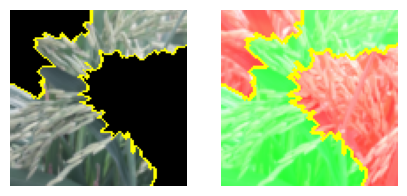

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (415).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), mobinet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')

UNHEALTHY


1/1 [==============================] - 0s 59ms/step
Predicted class: 0, Confidence: [[0.00025473]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 109ms/step


  1%|          | 10/1000 [00:00<00:24, 40.34it/s]

1/1 [==============================] - 0s 83ms/step


  2%|▏         | 20/1000 [00:00<00:19, 50.36it/s]

1/1 [==============================] - 0s 98ms/step


  3%|▎         | 30/1000 [00:00<00:20, 48.33it/s]

1/1 [==============================] - 0s 77ms/step


  4%|▍         | 40/1000 [00:00<00:19, 50.30it/s]

1/1 [==============================] - 0s 65ms/step


  5%|▌         | 50/1000 [00:01<00:18, 50.91it/s]

1/1 [==============================] - 0s 104ms/step


  6%|▌         | 60/1000 [00:01<00:18, 50.10it/s]

1/1 [==============================] - 0s 119ms/step


  7%|▋         | 70/1000 [00:01<00:20, 45.25it/s]

1/1 [==============================] - 0s 82ms/step


  8%|▊         | 80/1000 [00:01<00:19, 47.38it/s]

1/1 [==============================] - 0s 79ms/step


  9%|▉         | 90/1000 [00:01<00:18, 49.91it/s]

1/1 [==============================] - 0s 115ms/step


 10%|█         | 100/1000 [00:02<00:19, 45.68it/s]

1/1 [==============================] - 0s 87ms/step


 11%|█         | 110/1000 [00:02<00:19, 46.24it/s]

1/1 [==============================] - 0s 78ms/step


 12%|█▏        | 120/1000 [00:02<00:17, 50.18it/s]

1/1 [==============================] - 0s 82ms/step


 13%|█▎        | 130/1000 [00:02<00:16, 52.38it/s]

1/1 [==============================] - 0s 123ms/step


 14%|█▍        | 140/1000 [00:02<00:16, 50.95it/s]

1/1 [==============================] - 0s 128ms/step


 15%|█▌        | 150/1000 [00:03<00:17, 48.54it/s]

1/1 [==============================] - 0s 83ms/step


 16%|█▌        | 160/1000 [00:03<00:16, 49.78it/s]

1/1 [==============================] - 0s 79ms/step


 17%|█▋        | 170/1000 [00:03<00:15, 52.00it/s]

1/1 [==============================] - 0s 84ms/step


 18%|█▊        | 180/1000 [00:03<00:15, 52.69it/s]

1/1 [==============================] - 0s 70ms/step


 19%|█▉        | 190/1000 [00:03<00:14, 55.84it/s]

1/1 [==============================] - 0s 71ms/step


 20%|██        | 200/1000 [00:03<00:14, 55.71it/s]

1/1 [==============================] - 0s 72ms/step


 21%|██        | 210/1000 [00:04<00:13, 57.97it/s]

1/1 [==============================] - 0s 105ms/step


 22%|██▏       | 220/1000 [00:04<00:14, 52.68it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██▎       | 230/1000 [00:04<00:15, 51.28it/s]

1/1 [==============================] - 0s 75ms/step


 24%|██▍       | 240/1000 [00:04<00:14, 51.83it/s]

1/1 [==============================] - 0s 110ms/step


 25%|██▌       | 250/1000 [00:05<00:15, 47.09it/s]

1/1 [==============================] - 0s 122ms/step


 26%|██▌       | 260/1000 [00:05<00:16, 44.51it/s]

1/1 [==============================] - 0s 78ms/step


 27%|██▋       | 270/1000 [00:05<00:15, 46.46it/s]

1/1 [==============================] - 0s 83ms/step


 28%|██▊       | 280/1000 [00:05<00:14, 49.83it/s]

1/1 [==============================] - 0s 86ms/step


 29%|██▉       | 290/1000 [00:05<00:13, 52.80it/s]

1/1 [==============================] - 0s 95ms/step


 30%|███       | 300/1000 [00:05<00:12, 54.32it/s]

1/1 [==============================] - 0s 80ms/step


 31%|███       | 310/1000 [00:06<00:13, 52.84it/s]

1/1 [==============================] - 0s 77ms/step


 32%|███▏      | 320/1000 [00:06<00:12, 53.69it/s]

1/1 [==============================] - 0s 83ms/step


 33%|███▎      | 330/1000 [00:06<00:11, 56.96it/s]

1/1 [==============================] - 0s 129ms/step


 34%|███▍      | 340/1000 [00:06<00:12, 51.60it/s]

1/1 [==============================] - 0s 84ms/step


 35%|███▌      | 350/1000 [00:06<00:12, 50.52it/s]

1/1 [==============================] - 0s 81ms/step


 36%|███▌      | 360/1000 [00:07<00:12, 52.50it/s]

1/1 [==============================] - 0s 83ms/step


 37%|███▋      | 370/1000 [00:07<00:12, 51.76it/s]

1/1 [==============================] - 0s 95ms/step


 38%|███▊      | 380/1000 [00:07<00:12, 50.35it/s]

1/1 [==============================] - 0s 70ms/step


 39%|███▉      | 390/1000 [00:07<00:11, 54.69it/s]

1/1 [==============================] - 0s 74ms/step


 40%|████      | 400/1000 [00:07<00:10, 55.98it/s]

1/1 [==============================] - 0s 80ms/step


 41%|████      | 410/1000 [00:07<00:10, 57.86it/s]

1/1 [==============================] - 0s 107ms/step


 42%|████▏     | 420/1000 [00:08<00:10, 52.74it/s]

1/1 [==============================] - 0s 86ms/step


 43%|████▎     | 430/1000 [00:08<00:10, 52.30it/s]

1/1 [==============================] - 0s 101ms/step


 44%|████▍     | 440/1000 [00:08<00:10, 52.20it/s]

1/1 [==============================] - 0s 90ms/step


 45%|████▌     | 450/1000 [00:08<00:10, 52.36it/s]

1/1 [==============================] - 0s 93ms/step


 46%|████▌     | 460/1000 [00:08<00:10, 51.96it/s]

1/1 [==============================] - 0s 120ms/step


 47%|████▋     | 470/1000 [00:09<00:10, 49.42it/s]

1/1 [==============================] - 0s 83ms/step


 48%|████▊     | 480/1000 [00:09<00:11, 46.56it/s]

1/1 [==============================] - 0s 77ms/step


 49%|████▉     | 490/1000 [00:09<00:10, 50.38it/s]

1/1 [==============================] - 0s 100ms/step


 50%|█████     | 500/1000 [00:09<00:09, 51.35it/s]

1/1 [==============================] - 0s 118ms/step


 51%|█████     | 510/1000 [00:10<00:10, 47.67it/s]

1/1 [==============================] - 0s 104ms/step


 52%|█████▏    | 520/1000 [00:10<00:10, 45.55it/s]

1/1 [==============================] - 0s 83ms/step


 53%|█████▎    | 530/1000 [00:10<00:09, 47.93it/s]

1/1 [==============================] - 0s 87ms/step


 54%|█████▍    | 540/1000 [00:10<00:09, 50.32it/s]

1/1 [==============================] - 0s 130ms/step


 55%|█████▌    | 550/1000 [00:10<00:09, 46.36it/s]

1/1 [==============================] - 0s 86ms/step


 56%|█████▌    | 560/1000 [00:11<00:09, 46.55it/s]

1/1 [==============================] - 0s 75ms/step


 57%|█████▋    | 570/1000 [00:11<00:08, 51.04it/s]

1/1 [==============================] - 0s 80ms/step


 58%|█████▊    | 580/1000 [00:11<00:07, 52.71it/s]

1/1 [==============================] - 0s 88ms/step


 59%|█████▉    | 590/1000 [00:11<00:07, 51.66it/s]

1/1 [==============================] - 0s 96ms/step


 60%|██████    | 600/1000 [00:11<00:07, 50.61it/s]

1/1 [==============================] - 0s 104ms/step


 61%|██████    | 610/1000 [00:12<00:07, 50.02it/s]

1/1 [==============================] - 0s 75ms/step


 62%|██████▏   | 620/1000 [00:12<00:07, 50.97it/s]

1/1 [==============================] - 0s 81ms/step


 63%|██████▎   | 630/1000 [00:12<00:06, 53.03it/s]

1/1 [==============================] - 0s 80ms/step


 64%|██████▍   | 640/1000 [00:12<00:06, 53.42it/s]

1/1 [==============================] - 0s 77ms/step


 65%|██████▌   | 650/1000 [00:12<00:06, 55.63it/s]

1/1 [==============================] - 0s 87ms/step


 66%|██████▌   | 660/1000 [00:12<00:06, 56.24it/s]

1/1 [==============================] - 0s 95ms/step


 67%|██████▋   | 670/1000 [00:13<00:06, 54.59it/s]

1/1 [==============================] - 0s 73ms/step


 68%|██████▊   | 680/1000 [00:13<00:05, 55.35it/s]

1/1 [==============================] - 0s 100ms/step


 69%|██████▉   | 690/1000 [00:13<00:05, 54.49it/s]

1/1 [==============================] - 0s 73ms/step


 70%|███████   | 700/1000 [00:13<00:05, 53.15it/s]

1/1 [==============================] - 0s 96ms/step


 71%|███████   | 710/1000 [00:13<00:05, 53.34it/s]

1/1 [==============================] - 0s 76ms/step


 72%|███████▏  | 720/1000 [00:14<00:04, 56.41it/s]

1/1 [==============================] - 0s 78ms/step


 73%|███████▎  | 730/1000 [00:14<00:04, 58.23it/s]

1/1 [==============================] - 0s 71ms/step


 74%|███████▍  | 740/1000 [00:14<00:04, 60.48it/s]

1/1 [==============================] - 0s 81ms/step


 75%|███████▌  | 750/1000 [00:14<00:04, 60.19it/s]

1/1 [==============================] - 0s 80ms/step


 76%|███████▌  | 760/1000 [00:14<00:04, 59.74it/s]

1/1 [==============================] - 0s 96ms/step


 77%|███████▋  | 770/1000 [00:14<00:03, 57.74it/s]

1/1 [==============================] - 0s 69ms/step


 78%|███████▊  | 780/1000 [00:15<00:03, 57.90it/s]

1/1 [==============================] - 0s 83ms/step


 79%|███████▉  | 790/1000 [00:15<00:03, 57.87it/s]

1/1 [==============================] - 0s 74ms/step


 80%|████████  | 800/1000 [00:15<00:03, 59.48it/s]

1/1 [==============================] - 0s 105ms/step


 81%|████████  | 810/1000 [00:15<00:03, 56.31it/s]

1/1 [==============================] - 0s 80ms/step


 82%|████████▏ | 820/1000 [00:15<00:03, 52.11it/s]

1/1 [==============================] - 0s 80ms/step


 83%|████████▎ | 830/1000 [00:15<00:03, 54.27it/s]

1/1 [==============================] - 0s 105ms/step


 84%|████████▍ | 840/1000 [00:16<00:03, 47.62it/s]

1/1 [==============================] - 0s 73ms/step


 85%|████████▌ | 850/1000 [00:16<00:02, 51.73it/s]

1/1 [==============================] - 0s 79ms/step


 86%|████████▌ | 860/1000 [00:16<00:02, 53.17it/s]

1/1 [==============================] - 0s 72ms/step


 87%|████████▋ | 870/1000 [00:16<00:02, 56.50it/s]

1/1 [==============================] - 0s 84ms/step


 88%|████████▊ | 880/1000 [00:16<00:02, 56.06it/s]

1/1 [==============================] - 0s 81ms/step


 89%|████████▉ | 890/1000 [00:17<00:01, 56.19it/s]

1/1 [==============================] - 0s 78ms/step


 90%|█████████ | 900/1000 [00:17<00:01, 56.38it/s]

1/1 [==============================] - 0s 76ms/step


 91%|█████████ | 910/1000 [00:17<00:01, 59.09it/s]

1/1 [==============================] - 0s 77ms/step


 92%|█████████▏| 920/1000 [00:17<00:01, 60.09it/s]

1/1 [==============================] - 0s 79ms/step


 93%|█████████▎| 930/1000 [00:17<00:01, 58.93it/s]

1/1 [==============================] - 0s 77ms/step


 94%|█████████▍| 940/1000 [00:17<00:01, 58.08it/s]

1/1 [==============================] - 0s 74ms/step


 95%|█████████▌| 950/1000 [00:18<00:00, 59.04it/s]

1/1 [==============================] - 0s 78ms/step


 96%|█████████▌| 960/1000 [00:18<00:00, 59.20it/s]

1/1 [==============================] - 0s 76ms/step


 97%|█████████▋| 970/1000 [00:18<00:00, 57.39it/s]

1/1 [==============================] - 0s 91ms/step


 98%|█████████▊| 980/1000 [00:18<00:00, 55.60it/s]

1/1 [==============================] - 0s 105ms/step


 99%|█████████▉| 990/1000 [00:18<00:00, 53.62it/s]

1/1 [==============================] - 0s 78ms/step


100%|██████████| 1000/1000 [00:18<00:00, 52.66it/s]


(-0.5, 99.5, 99.5, -0.5)

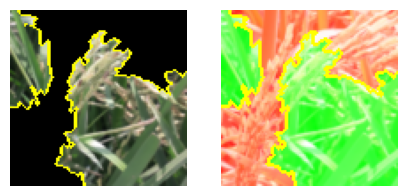

In [25]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (312).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), mobinet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 41ms/step
Predicted class: 0, Confidence: [[0.995462]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step


  1%|          | 10/1000 [00:00<00:11, 84.61it/s]

1/1 [==============================] - 0s 59ms/step


  2%|▏         | 20/1000 [00:00<00:11, 86.37it/s]

1/1 [==============================] - 0s 60ms/step


  3%|▎         | 30/1000 [00:00<00:11, 86.05it/s]

1/1 [==============================] - 0s 58ms/step


  4%|▍         | 40/1000 [00:00<00:11, 86.68it/s]

1/1 [==============================] - 0s 55ms/step


  5%|▌         | 50/1000 [00:00<00:11, 84.97it/s]

1/1 [==============================] - 0s 61ms/step


  6%|▌         | 60/1000 [00:00<00:11, 83.26it/s]

1/1 [==============================] - 0s 55ms/step


  7%|▋         | 70/1000 [00:00<00:10, 85.10it/s]

1/1 [==============================] - 0s 59ms/step


  8%|▊         | 80/1000 [00:00<00:10, 85.02it/s]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 90/1000 [00:01<00:10, 88.95it/s]

1/1 [==============================] - 0s 47ms/step


 10%|█         | 105/1000 [00:01<00:08, 106.29it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▏        | 120/1000 [00:01<00:09, 94.18it/s] 

1/1 [==============================] - 0s 53ms/step


 13%|█▎        | 130/1000 [00:01<00:09, 94.47it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 140/1000 [00:01<00:09, 94.46it/s]

1/1 [==============================] - 0s 52ms/step


 15%|█▌        | 150/1000 [00:01<00:08, 95.12it/s]

1/1 [==============================] - 0s 53ms/step


 16%|█▌        | 160/1000 [00:01<00:08, 96.10it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 180/1000 [00:01<00:08, 101.47it/s]

1/1 [==============================] - 0s 49ms/step


 19%|█▉        | 191/1000 [00:02<00:07, 102.82it/s]

1/1 [==============================] - 0s 49ms/step


 20%|██        | 202/1000 [00:02<00:07, 104.45it/s]

1/1 [==============================] - 0s 53ms/step


 21%|██▏       | 214/1000 [00:02<00:07, 108.42it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 230/1000 [00:02<00:07, 97.10it/s] 

1/1 [==============================] - 0s 49ms/step


 25%|██▍       | 246/1000 [00:02<00:06, 112.00it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 260/1000 [00:02<00:07, 99.43it/s] 

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 280/1000 [00:02<00:07, 102.51it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███       | 300/1000 [00:03<00:06, 104.11it/s]

1/1 [==============================] - 0s 46ms/step


 32%|███▏      | 320/1000 [00:03<00:06, 107.06it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 340/1000 [00:03<00:05, 110.07it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▌      | 360/1000 [00:03<00:05, 110.58it/s]

1/1 [==============================] - 0s 48ms/step


 38%|███▊      | 377/1000 [00:03<00:05, 122.35it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 390/1000 [00:03<00:05, 106.89it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 410/1000 [00:04<00:05, 108.93it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 430/1000 [00:04<00:05, 110.50it/s]

1/1 [==============================] - 0s 45ms/step


 45%|████▌     | 450/1000 [00:04<00:04, 111.16it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 470/1000 [00:04<00:04, 111.72it/s]

1/1 [==============================] - 0s 47ms/step


 49%|████▉     | 490/1000 [00:04<00:04, 111.34it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 510/1000 [00:04<00:04, 109.01it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 530/1000 [00:05<00:04, 107.63it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▍    | 542/1000 [00:05<00:04, 109.90it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 554/1000 [00:05<00:03, 111.81it/s]

1/1 [==============================] - 0s 48ms/step


 57%|█████▋    | 570/1000 [00:05<00:04, 101.91it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▊    | 587/1000 [00:05<00:03, 116.60it/s]

1/1 [==============================] - 0s 48ms/step


 60%|██████    | 600/1000 [00:05<00:04, 99.62it/s] 

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 620/1000 [00:06<00:03, 101.34it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 631/1000 [00:06<00:03, 102.92it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 642/1000 [00:06<00:03, 101.00it/s]

1/1 [==============================] - 0s 50ms/step


 65%|██████▌   | 653/1000 [00:06<00:03, 101.68it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▋   | 664/1000 [00:06<00:03, 102.52it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 675/1000 [00:06<00:03, 103.71it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 690/1000 [00:06<00:03, 95.79it/s] 

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 710/1000 [00:06<00:02, 101.13it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 730/1000 [00:07<00:02, 105.32it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 750/1000 [00:07<00:02, 108.89it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 770/1000 [00:07<00:02, 111.68it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 790/1000 [00:07<00:01, 112.34it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 810/1000 [00:07<00:01, 112.71it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 830/1000 [00:07<00:01, 110.43it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 850/1000 [00:08<00:01, 111.03it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 870/1000 [00:08<00:01, 111.96it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 890/1000 [00:08<00:00, 112.51it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 910/1000 [00:08<00:00, 112.20it/s]

1/1 [==============================] - 0s 48ms/step


 93%|█████████▎| 930/1000 [00:08<00:00, 112.31it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 950/1000 [00:09<00:00, 112.34it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 970/1000 [00:09<00:00, 112.67it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▉| 990/1000 [00:09<00:00, 113.17it/s]

1/1 [==============================] - 0s 47ms/step


100%|██████████| 1000/1000 [00:09<00:00, 105.50it/s]


(-0.5, 99.5, 99.5, -0.5)

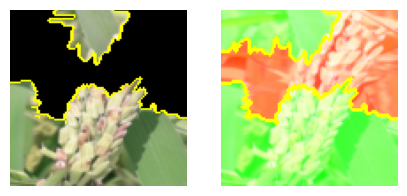

In [122]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (270).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), mobinet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 35ms/step
Predicted class: 0, Confidence: [[0.99546134]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 20/1000 [00:00<00:08, 120.15it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 40/1000 [00:00<00:08, 118.35it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 60/1000 [00:00<00:07, 118.88it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 80/1000 [00:00<00:07, 117.70it/s]

1/1 [==============================] - 0s 45ms/step


 10%|█         | 100/1000 [00:00<00:07, 115.42it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█▏        | 120/1000 [00:01<00:07, 114.80it/s]

1/1 [==============================] - 0s 45ms/step


 14%|█▍        | 140/1000 [00:01<00:07, 115.30it/s]

1/1 [==============================] - 0s 46ms/step


 16%|█▌        | 160/1000 [00:01<00:07, 114.04it/s]

1/1 [==============================] - 0s 46ms/step


 18%|█▊        | 180/1000 [00:01<00:07, 114.23it/s]

1/1 [==============================] - 0s 46ms/step


 20%|██        | 200/1000 [00:01<00:06, 114.88it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 220/1000 [00:01<00:06, 114.61it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 240/1000 [00:02<00:06, 114.63it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 260/1000 [00:02<00:06, 115.90it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 280/1000 [00:02<00:06, 116.65it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 300/1000 [00:02<00:06, 115.20it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▏      | 320/1000 [00:02<00:05, 116.86it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 340/1000 [00:02<00:05, 116.67it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 360/1000 [00:03<00:05, 116.36it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 380/1000 [00:03<00:05, 115.93it/s]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 400/1000 [00:03<00:05, 114.12it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 420/1000 [00:03<00:05, 115.10it/s]

1/1 [==============================] - 0s 46ms/step


 44%|████▍     | 440/1000 [00:03<00:04, 115.40it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 460/1000 [00:03<00:04, 114.95it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 480/1000 [00:04<00:04, 114.69it/s]

1/1 [==============================] - 0s 46ms/step


 50%|█████     | 500/1000 [00:04<00:04, 114.70it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 520/1000 [00:04<00:04, 114.85it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 540/1000 [00:04<00:04, 114.04it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████▌    | 560/1000 [00:04<00:03, 113.50it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 580/1000 [00:05<00:03, 113.98it/s]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 600/1000 [00:05<00:03, 113.62it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 620/1000 [00:05<00:03, 114.40it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 640/1000 [00:05<00:03, 113.92it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 660/1000 [00:05<00:02, 113.88it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 680/1000 [00:05<00:02, 114.00it/s]

1/1 [==============================] - 0s 46ms/step


 70%|███████   | 700/1000 [00:06<00:02, 114.43it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 720/1000 [00:06<00:02, 114.58it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 740/1000 [00:06<00:02, 113.60it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 760/1000 [00:06<00:02, 113.30it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 780/1000 [00:06<00:01, 114.12it/s]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 800/1000 [00:06<00:01, 114.10it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 820/1000 [00:07<00:01, 113.82it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 840/1000 [00:07<00:01, 112.58it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 860/1000 [00:07<00:01, 113.32it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 880/1000 [00:07<00:01, 112.64it/s]

1/1 [==============================] - 0s 44ms/step


 90%|█████████ | 900/1000 [00:07<00:00, 113.15it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 920/1000 [00:08<00:00, 113.46it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 940/1000 [00:08<00:00, 112.72it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 960/1000 [00:08<00:00, 112.52it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 980/1000 [00:08<00:00, 112.71it/s]

1/1 [==============================] - 0s 44ms/step


100%|██████████| 1000/1000 [00:08<00:00, 114.48it/s]


(-0.5, 99.5, 99.5, -0.5)

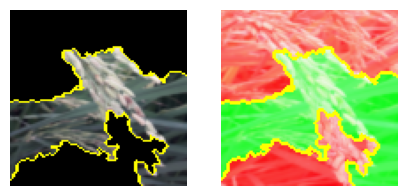

In [123]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (284).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds =mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), mobinet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 35ms/step
Predicted class: 0, Confidence: [[0.99546206]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 20/1000 [00:00<00:08, 121.22it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 40/1000 [00:00<00:08, 119.10it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 60/1000 [00:00<00:08, 115.75it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 80/1000 [00:00<00:07, 116.85it/s]

1/1 [==============================] - 0s 46ms/step


 10%|█         | 100/1000 [00:00<00:07, 116.24it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 120/1000 [00:01<00:07, 116.36it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 140/1000 [00:01<00:07, 115.90it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▌        | 160/1000 [00:01<00:07, 114.98it/s]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 180/1000 [00:01<00:07, 114.33it/s]

1/1 [==============================] - 0s 47ms/step


 20%|██        | 200/1000 [00:01<00:07, 113.53it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 220/1000 [00:01<00:06, 113.67it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 240/1000 [00:02<00:06, 112.16it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 260/1000 [00:02<00:06, 113.04it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 280/1000 [00:02<00:06, 112.58it/s]

1/1 [==============================] - 0s 44ms/step


 30%|███       | 300/1000 [00:02<00:06, 113.31it/s]

1/1 [==============================] - 0s 46ms/step


 32%|███▏      | 320/1000 [00:02<00:06, 112.42it/s]

1/1 [==============================] - 0s 52ms/step


 33%|███▎      | 332/1000 [00:02<00:06, 99.12it/s] 

1/1 [==============================] - 0s 49ms/step


 34%|███▍      | 343/1000 [00:03<00:06, 101.19it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 360/1000 [00:03<00:06, 99.15it/s] 

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 380/1000 [00:03<00:05, 104.46it/s]

1/1 [==============================] - 0s 43ms/step


 40%|████      | 400/1000 [00:03<00:05, 108.11it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 420/1000 [00:03<00:05, 109.79it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 440/1000 [00:03<00:05, 111.64it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 460/1000 [00:04<00:04, 112.76it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 480/1000 [00:04<00:04, 112.79it/s]

1/1 [==============================] - 0s 45ms/step


 50%|█████     | 500/1000 [00:04<00:04, 112.56it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 520/1000 [00:04<00:04, 112.07it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 540/1000 [00:04<00:04, 112.18it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 560/1000 [00:05<00:03, 112.11it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 580/1000 [00:05<00:03, 112.32it/s]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 600/1000 [00:05<00:03, 111.99it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 620/1000 [00:05<00:03, 112.68it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 640/1000 [00:05<00:03, 113.21it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 660/1000 [00:05<00:02, 113.36it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 680/1000 [00:06<00:02, 114.30it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 700/1000 [00:06<00:02, 112.86it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 712/1000 [00:06<00:02, 113.66it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 730/1000 [00:06<00:02, 109.12it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 750/1000 [00:06<00:02, 110.78it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 770/1000 [00:06<00:02, 111.48it/s]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 782/1000 [00:06<00:01, 111.65it/s]

1/1 [==============================] - 0s 46ms/step


 80%|████████  | 800/1000 [00:07<00:01, 107.23it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 820/1000 [00:07<00:01, 109.33it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 840/1000 [00:07<00:01, 110.18it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▌ | 852/1000 [00:07<00:01, 110.79it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 870/1000 [00:07<00:01, 106.45it/s]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 890/1000 [00:07<00:01, 108.08it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 910/1000 [00:08<00:00, 109.06it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 930/1000 [00:08<00:00, 111.31it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 950/1000 [00:08<00:00, 112.32it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 970/1000 [00:08<00:00, 111.92it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▉| 990/1000 [00:08<00:00, 112.71it/s]

1/1 [==============================] - 0s 46ms/step


100%|██████████| 1000/1000 [00:08<00:00, 111.48it/s]


(-0.5, 99.5, 99.5, -0.5)

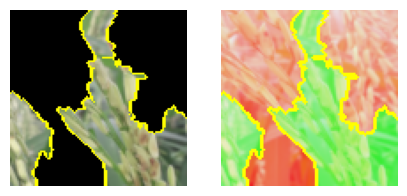

In [124]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (297).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), mobinet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 34ms/step
Predicted class: 0, Confidence: [[0.9954616]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 20/1000 [00:00<00:08, 115.92it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▍         | 40/1000 [00:00<00:08, 114.71it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 60/1000 [00:00<00:08, 113.69it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 80/1000 [00:00<00:08, 114.56it/s]

1/1 [==============================] - 0s 62ms/step


  9%|▉         | 92/1000 [00:00<00:07, 113.53it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 110/1000 [00:00<00:08, 107.55it/s]

1/1 [==============================] - 0s 47ms/step


 13%|█▎        | 130/1000 [00:01<00:07, 109.74it/s]

1/1 [==============================] - 0s 47ms/step


 15%|█▌        | 150/1000 [00:01<00:07, 110.49it/s]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 170/1000 [00:01<00:07, 111.64it/s]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 190/1000 [00:01<00:07, 112.34it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 210/1000 [00:01<00:06, 113.11it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 230/1000 [00:02<00:06, 113.03it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██▌       | 250/1000 [00:02<00:06, 113.74it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 270/1000 [00:02<00:06, 112.82it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▉       | 290/1000 [00:02<00:06, 112.93it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███       | 310/1000 [00:02<00:06, 114.05it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 330/1000 [00:02<00:05, 114.27it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▌      | 350/1000 [00:03<00:05, 112.13it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▌      | 362/1000 [00:03<00:05, 109.69it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 373/1000 [00:03<00:05, 106.96it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 384/1000 [00:03<00:05, 107.12it/s]

1/1 [==============================] - 0s 51ms/step


 40%|███▉      | 395/1000 [00:03<00:05, 107.75it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 406/1000 [00:03<00:05, 106.02it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 417/1000 [00:03<00:05, 103.95it/s]

1/1 [==============================] - 0s 53ms/step


 43%|████▎     | 428/1000 [00:03<00:05, 104.17it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▍     | 439/1000 [00:03<00:05, 103.94it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 450/1000 [00:04<00:06, 79.89it/s] 

1/1 [==============================] - 0s 61ms/step


 46%|████▌     | 460/1000 [00:04<00:06, 81.64it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 470/1000 [00:04<00:06, 84.22it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 480/1000 [00:04<00:05, 86.81it/s]

1/1 [==============================] - 0s 65ms/step


 49%|████▉     | 490/1000 [00:04<00:06, 84.19it/s]

1/1 [==============================] - 0s 61ms/step


 50%|█████     | 500/1000 [00:04<00:05, 84.29it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████     | 510/1000 [00:04<00:05, 84.96it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 520/1000 [00:04<00:05, 86.83it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 530/1000 [00:05<00:05, 88.52it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▍    | 540/1000 [00:05<00:05, 86.38it/s]

1/1 [==============================] - 0s 60ms/step


 55%|█████▌    | 550/1000 [00:05<00:05, 86.51it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▌    | 560/1000 [00:05<00:05, 87.67it/s]

1/1 [==============================] - 0s 61ms/step


 57%|█████▋    | 570/1000 [00:05<00:04, 87.77it/s]

1/1 [==============================] - 0s 88ms/step


 58%|█████▊    | 580/1000 [00:05<00:05, 73.26it/s]

1/1 [==============================] - 0s 191ms/step


 59%|█████▉    | 590/1000 [00:06<00:07, 53.21it/s]

1/1 [==============================] - 0s 126ms/step


 60%|██████    | 600/1000 [00:06<00:07, 50.91it/s]

1/1 [==============================] - 0s 74ms/step


 61%|██████    | 610/1000 [00:06<00:07, 54.41it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▏   | 620/1000 [00:06<00:06, 59.02it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 630/1000 [00:06<00:05, 63.09it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 640/1000 [00:06<00:05, 67.30it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▌   | 650/1000 [00:06<00:04, 70.82it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 660/1000 [00:07<00:04, 75.62it/s]

1/1 [==============================] - 0s 54ms/step


 67%|██████▋   | 670/1000 [00:07<00:04, 80.83it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 680/1000 [00:07<00:03, 85.56it/s]

1/1 [==============================] - 0s 53ms/step


 70%|██████▉   | 696/1000 [00:07<00:02, 105.27it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 707/1000 [00:07<00:02, 101.71it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 718/1000 [00:07<00:02, 100.77it/s]

1/1 [==============================] - 0s 55ms/step


 73%|███████▎  | 729/1000 [00:07<00:02, 97.95it/s] 

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 739/1000 [00:07<00:02, 95.78it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▍  | 749/1000 [00:07<00:02, 94.52it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▌  | 759/1000 [00:08<00:02, 90.77it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 769/1000 [00:08<00:02, 90.53it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 779/1000 [00:08<00:02, 90.23it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▉  | 789/1000 [00:08<00:02, 91.21it/s]

1/1 [==============================] - 0s 55ms/step


 80%|███████▉  | 799/1000 [00:08<00:02, 90.83it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████  | 809/1000 [00:08<00:02, 89.46it/s]

1/1 [==============================] - 0s 64ms/step


 82%|████████▏ | 818/1000 [00:08<00:02, 82.30it/s]

1/1 [==============================] - 0s 61ms/step


 83%|████████▎ | 827/1000 [00:08<00:02, 78.84it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▎ | 835/1000 [00:08<00:02, 76.68it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 843/1000 [00:09<00:02, 76.11it/s]

1/1 [==============================] - 0s 61ms/step


 85%|████████▌ | 851/1000 [00:09<00:02, 73.86it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 860/1000 [00:09<00:01, 74.00it/s]

1/1 [==============================] - 0s 58ms/step


 87%|████████▋ | 870/1000 [00:09<00:01, 77.46it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 880/1000 [00:09<00:01, 81.08it/s]

1/1 [==============================] - 0s 59ms/step


 89%|████████▉ | 890/1000 [00:09<00:01, 82.97it/s]

1/1 [==============================] - 0s 58ms/step


 90%|█████████ | 900/1000 [00:09<00:01, 81.69it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████ | 910/1000 [00:09<00:01, 79.98it/s]

1/1 [==============================] - 0s 74ms/step


 92%|█████████▏| 920/1000 [00:10<00:01, 75.19it/s]

1/1 [==============================] - 0s 68ms/step


 93%|█████████▎| 930/1000 [00:10<00:00, 72.65it/s]

1/1 [==============================] - 0s 71ms/step


 94%|█████████▍| 940/1000 [00:10<00:00, 71.57it/s]

1/1 [==============================] - 0s 62ms/step


 95%|█████████▌| 950/1000 [00:10<00:00, 73.39it/s]

1/1 [==============================] - 0s 55ms/step


 96%|█████████▌| 960/1000 [00:10<00:00, 77.95it/s]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 970/1000 [00:10<00:00, 82.93it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▉| 990/1000 [00:10<00:00, 91.94it/s]

1/1 [==============================] - 0s 47ms/step


100%|██████████| 1000/1000 [00:10<00:00, 90.95it/s]


(-0.5, 99.5, 99.5, -0.5)

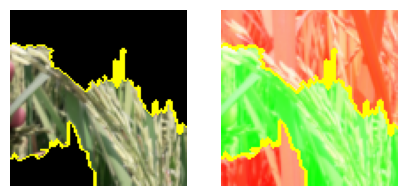

In [125]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (271).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), mobinet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 35ms/step
Predicted class: 0, Confidence: [[0.99546194]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 59ms/step


  1%|          | 10/1000 [00:00<00:11, 87.86it/s]

1/1 [==============================] - 0s 51ms/step


  2%|▏         | 20/1000 [00:00<00:10, 91.24it/s]

1/1 [==============================] - 0s 55ms/step


  3%|▎         | 30/1000 [00:00<00:10, 89.38it/s]

1/1 [==============================] - 0s 54ms/step


  4%|▍         | 40/1000 [00:00<00:10, 89.16it/s]

1/1 [==============================] - 0s 54ms/step


  5%|▌         | 50/1000 [00:00<00:10, 90.79it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 60/1000 [00:00<00:10, 91.48it/s]

1/1 [==============================] - 0s 56ms/step


  7%|▋         | 70/1000 [00:00<00:10, 90.68it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 80/1000 [00:00<00:10, 90.90it/s]

1/1 [==============================] - 0s 56ms/step


  9%|▉         | 90/1000 [00:00<00:10, 89.49it/s]

1/1 [==============================] - 0s 53ms/step


 10%|█         | 100/1000 [00:01<00:09, 90.96it/s]

1/1 [==============================] - 0s 54ms/step


 11%|█         | 110/1000 [00:01<00:09, 89.71it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▏        | 120/1000 [00:01<00:09, 90.27it/s]

1/1 [==============================] - 0s 60ms/step


 13%|█▎        | 130/1000 [00:01<00:09, 88.38it/s]

1/1 [==============================] - 0s 52ms/step


 14%|█▍        | 140/1000 [00:01<00:09, 89.79it/s]

1/1 [==============================] - 0s 69ms/step


 15%|█▌        | 150/1000 [00:01<00:10, 83.61it/s]

1/1 [==============================] - 0s 67ms/step


 16%|█▌        | 160/1000 [00:01<00:10, 76.70it/s]

1/1 [==============================] - 0s 73ms/step


 17%|█▋        | 170/1000 [00:01<00:11, 73.57it/s]

1/1 [==============================] - 0s 69ms/step


 18%|█▊        | 180/1000 [00:02<00:11, 72.36it/s]

1/1 [==============================] - 0s 56ms/step


 19%|█▉        | 190/1000 [00:02<00:10, 76.15it/s]

1/1 [==============================] - 0s 55ms/step


 20%|██        | 200/1000 [00:02<00:10, 79.56it/s]

1/1 [==============================] - 0s 54ms/step


 21%|██        | 210/1000 [00:02<00:09, 83.39it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 221/1000 [00:02<00:08, 90.33it/s]

1/1 [==============================] - 0s 50ms/step


 24%|██▎       | 235/1000 [00:02<00:07, 103.82it/s]

1/1 [==============================] - 0s 60ms/step


 25%|██▍       | 246/1000 [00:02<00:07, 102.26it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▌       | 257/1000 [00:02<00:07, 99.18it/s] 

1/1 [==============================] - 0s 56ms/step


 27%|██▋       | 268/1000 [00:03<00:07, 98.42it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 278/1000 [00:03<00:07, 92.80it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 288/1000 [00:03<00:07, 90.62it/s]

1/1 [==============================] - 0s 61ms/step


 30%|██▉       | 298/1000 [00:03<00:08, 86.01it/s]

1/1 [==============================] - 0s 61ms/step


 31%|███       | 307/1000 [00:03<00:08, 80.77it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 320/1000 [00:03<00:09, 73.50it/s]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 330/1000 [00:03<00:08, 77.45it/s]

1/1 [==============================] - 0s 58ms/step


 34%|███▍      | 340/1000 [00:03<00:08, 79.62it/s]

1/1 [==============================] - 0s 61ms/step


 35%|███▌      | 350/1000 [00:04<00:08, 80.80it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 360/1000 [00:04<00:07, 82.39it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 370/1000 [00:04<00:07, 82.95it/s]

1/1 [==============================] - 0s 56ms/step


 38%|███▊      | 380/1000 [00:04<00:07, 83.72it/s]

1/1 [==============================] - 0s 55ms/step


 39%|███▉      | 390/1000 [00:04<00:07, 85.10it/s]

1/1 [==============================] - 0s 60ms/step


 40%|████      | 400/1000 [00:04<00:07, 85.29it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████      | 410/1000 [00:04<00:06, 85.70it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 420/1000 [00:04<00:06, 86.39it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 430/1000 [00:05<00:06, 86.62it/s]

1/1 [==============================] - 0s 60ms/step


 44%|████▍     | 440/1000 [00:05<00:06, 87.02it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▌     | 450/1000 [00:05<00:06, 90.00it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 470/1000 [00:05<00:05, 95.74it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 490/1000 [00:05<00:05, 101.28it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 510/1000 [00:05<00:04, 105.44it/s]

1/1 [==============================] - 0s 97ms/step


 53%|█████▎    | 530/1000 [00:06<00:04, 96.44it/s] 

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 540/1000 [00:06<00:04, 95.07it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▌    | 558/1000 [00:06<00:03, 112.89it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 571/1000 [00:06<00:04, 97.72it/s] 

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 590/1000 [00:06<00:04, 100.29it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 610/1000 [00:06<00:03, 104.41it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 630/1000 [00:06<00:03, 108.12it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▌   | 650/1000 [00:07<00:03, 109.87it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 670/1000 [00:07<00:03, 109.75it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 690/1000 [00:07<00:02, 111.68it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 710/1000 [00:07<00:02, 112.78it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 730/1000 [00:07<00:02, 113.27it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 750/1000 [00:07<00:02, 112.68it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 770/1000 [00:08<00:02, 112.58it/s]

1/1 [==============================] - 0s 46ms/step


 79%|███████▉  | 790/1000 [00:08<00:01, 112.62it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 810/1000 [00:08<00:01, 112.12it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 830/1000 [00:08<00:01, 109.76it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▌ | 850/1000 [00:08<00:01, 110.12it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 870/1000 [00:09<00:01, 110.84it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▉ | 890/1000 [00:09<00:00, 111.13it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 910/1000 [00:09<00:00, 111.37it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 923/1000 [00:09<00:00, 114.93it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 940/1000 [00:09<00:00, 108.41it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 960/1000 [00:09<00:00, 109.71it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 980/1000 [00:10<00:00, 108.92it/s]

1/1 [==============================] - 0s 47ms/step


100%|██████████| 1000/1000 [00:10<00:00, 97.49it/s] 


(-0.5, 99.5, 99.5, -0.5)

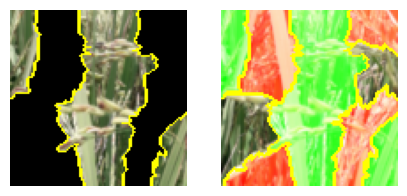

In [126]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (252).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), mobinet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 39ms/step
Predicted class: 0, Confidence: [[0.9954612]]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 51ms/step


  2%|▏         | 19/1000 [00:00<00:05, 188.44it/s]

1/1 [==============================] - 0s 52ms/step


  4%|▍         | 38/1000 [00:00<00:08, 112.87it/s]

1/1 [==============================] - 0s 54ms/step


  5%|▌         | 51/1000 [00:00<00:10, 89.78it/s] 

1/1 [==============================] - 0s 55ms/step


  6%|▌         | 62/1000 [00:00<00:10, 92.97it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 73/1000 [00:00<00:09, 95.28it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 84/1000 [00:00<00:09, 99.25it/s]

1/1 [==============================] - 0s 57ms/step


 10%|▉         | 95/1000 [00:00<00:09, 100.55it/s]

1/1 [==============================] - 0s 53ms/step


 11%|█         | 106/1000 [00:01<00:08, 102.17it/s]

1/1 [==============================] - 0s 53ms/step


 12%|█▏        | 117/1000 [00:01<00:08, 103.26it/s]

1/1 [==============================] - 0s 58ms/step


 13%|█▎        | 128/1000 [00:01<00:08, 101.04it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 139/1000 [00:01<00:08, 100.09it/s]

1/1 [==============================] - 0s 54ms/step


 15%|█▌        | 150/1000 [00:01<00:10, 78.94it/s] 

1/1 [==============================] - 0s 59ms/step


 16%|█▌        | 160/1000 [00:01<00:10, 81.41it/s]

1/1 [==============================] - 0s 52ms/step


 17%|█▋        | 170/1000 [00:01<00:09, 85.42it/s]

1/1 [==============================] - 0s 50ms/step


 19%|█▊        | 186/1000 [00:01<00:07, 104.69it/s]

1/1 [==============================] - 0s 51ms/step


 20%|█▉        | 198/1000 [00:01<00:07, 107.80it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██        | 210/1000 [00:02<00:09, 87.67it/s] 

1/1 [==============================] - 0s 54ms/step


 22%|██▏       | 220/1000 [00:02<00:08, 87.04it/s]

1/1 [==============================] - 0s 52ms/step


 23%|██▎       | 232/1000 [00:02<00:08, 94.93it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▌       | 250/1000 [00:02<00:07, 94.72it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 270/1000 [00:02<00:07, 101.29it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▉       | 290/1000 [00:02<00:06, 105.26it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 310/1000 [00:03<00:06, 108.51it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 330/1000 [00:03<00:06, 110.29it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▌      | 350/1000 [00:03<00:05, 111.55it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 370/1000 [00:03<00:05, 113.75it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 390/1000 [00:03<00:05, 114.16it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 410/1000 [00:03<00:05, 114.82it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 430/1000 [00:04<00:04, 115.63it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▌     | 450/1000 [00:04<00:04, 114.47it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 470/1000 [00:04<00:04, 115.22it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 490/1000 [00:04<00:04, 114.14it/s]

1/1 [==============================] - 0s 57ms/step


 51%|█████     | 510/1000 [00:04<00:04, 107.32it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 521/1000 [00:05<00:04, 107.75it/s]

1/1 [==============================] - 0s 50ms/step


 53%|█████▎    | 532/1000 [00:05<00:04, 107.46it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▍    | 543/1000 [00:05<00:04, 107.17it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▌    | 554/1000 [00:05<00:04, 107.14it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▋    | 565/1000 [00:05<00:04, 105.91it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 576/1000 [00:05<00:04, 105.83it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 588/1000 [00:05<00:03, 109.65it/s]

1/1 [==============================] - 0s 48ms/step


 60%|██████    | 600/1000 [00:05<00:04, 91.92it/s] 

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 620/1000 [00:05<00:03, 100.83it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 640/1000 [00:06<00:03, 103.69it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 660/1000 [00:06<00:03, 106.28it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 680/1000 [00:06<00:03, 106.60it/s]

1/1 [==============================] - 0s 46ms/step


 70%|███████   | 700/1000 [00:06<00:02, 108.40it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 720/1000 [00:06<00:02, 109.46it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 740/1000 [00:07<00:02, 109.05it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 760/1000 [00:07<00:02, 110.19it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 780/1000 [00:07<00:01, 110.74it/s]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 800/1000 [00:07<00:01, 111.30it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 820/1000 [00:07<00:01, 110.28it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 840/1000 [00:07<00:01, 111.49it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 860/1000 [00:08<00:01, 110.73it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 880/1000 [00:08<00:01, 110.71it/s]

1/1 [==============================] - 0s 46ms/step


 90%|█████████ | 900/1000 [00:08<00:00, 111.35it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 920/1000 [00:08<00:00, 111.12it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 940/1000 [00:08<00:00, 109.86it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 960/1000 [00:09<00:00, 110.70it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 980/1000 [00:09<00:00, 110.96it/s]

1/1 [==============================] - 0s 47ms/step


100%|██████████| 1000/1000 [00:09<00:00, 106.27it/s]


(-0.5, 99.5, 99.5, -0.5)

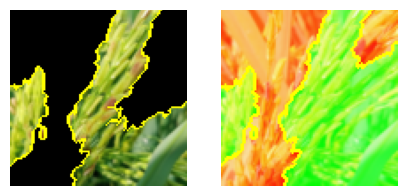

In [127]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (393).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), mobinet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 34ms/step
Predicted class: 0, Confidence: [[0.9954612]]


  0%|          | 0/5000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 395ms/step


  0%|          | 10/5000 [00:00<03:38, 22.88it/s]

1/1 [==============================] - 0s 44ms/step


  1%|          | 30/5000 [00:00<01:27, 56.84it/s]

1/1 [==============================] - 0s 44ms/step


  1%|          | 50/5000 [00:00<01:03, 77.87it/s]

1/1 [==============================] - 0s 47ms/step


  1%|▏         | 70/5000 [00:00<00:54, 90.59it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 90/5000 [00:01<00:49, 99.16it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 110/5000 [00:01<00:47, 103.72it/s]

1/1 [==============================] - 0s 48ms/step


  3%|▎         | 130/5000 [00:01<00:45, 106.83it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 150/5000 [00:01<00:44, 110.10it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 170/5000 [00:01<00:42, 112.36it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 190/5000 [00:01<00:42, 113.25it/s]

1/1 [==============================] - 0s 49ms/step


  4%|▍         | 210/5000 [00:02<00:42, 113.87it/s]

1/1 [==============================] - 0s 55ms/step


  4%|▍         | 222/5000 [00:02<00:41, 114.39it/s]

1/1 [==============================] - 0s 52ms/step


  5%|▍         | 234/5000 [00:02<00:41, 114.47it/s]

1/1 [==============================] - 0s 52ms/step


  5%|▍         | 246/5000 [00:02<00:41, 115.28it/s]

1/1 [==============================] - 0s 52ms/step


  5%|▌         | 260/5000 [00:02<00:48, 97.41it/s] 

1/1 [==============================] - 0s 56ms/step


  5%|▌         | 271/5000 [00:02<00:48, 97.43it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▌         | 282/5000 [00:02<00:47, 99.44it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 293/5000 [00:02<00:47, 99.83it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▌         | 304/5000 [00:03<00:45, 102.24it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▋         | 315/5000 [00:03<00:44, 104.14it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 329/5000 [00:03<00:40, 114.00it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 341/5000 [00:03<00:51, 91.06it/s] 

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 358/5000 [00:03<00:42, 110.17it/s]

1/1 [==============================] - 0s 56ms/step


  7%|▋         | 371/5000 [00:03<00:52, 88.45it/s] 

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 382/5000 [00:03<00:49, 92.56it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 393/5000 [00:04<00:47, 96.69it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 408/5000 [00:04<00:41, 110.09it/s]

1/1 [==============================] - 0s 55ms/step


  8%|▊         | 420/5000 [00:04<00:51, 88.21it/s] 

1/1 [==============================] - 0s 54ms/step


  9%|▊         | 431/5000 [00:04<00:50, 90.96it/s]

1/1 [==============================] - 0s 60ms/step


  9%|▉         | 442/5000 [00:04<00:49, 92.51it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 452/5000 [00:04<00:48, 93.57it/s]

1/1 [==============================] - 0s 63ms/step


  9%|▉         | 462/5000 [00:04<00:54, 83.74it/s]

1/1 [==============================] - 0s 212ms/step


  9%|▉         | 471/5000 [00:05<01:18, 57.52it/s]

1/1 [==============================] - 0s 125ms/step


 10%|▉         | 480/5000 [00:05<01:25, 52.80it/s]

1/1 [==============================] - 0s 64ms/step


 10%|▉         | 490/5000 [00:05<01:17, 58.41it/s]

1/1 [==============================] - 0s 50ms/step


 10%|█         | 510/5000 [00:05<01:01, 73.61it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█         | 530/5000 [00:05<00:52, 84.36it/s]

1/1 [==============================] - 0s 61ms/step


 11%|█         | 540/5000 [00:05<00:52, 85.50it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█         | 550/5000 [00:06<00:51, 86.85it/s]

1/1 [==============================] - 0s 56ms/step


 11%|█         | 560/5000 [00:06<00:50, 88.31it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█▏        | 570/5000 [00:06<00:49, 89.44it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 580/5000 [00:06<00:48, 91.38it/s]

1/1 [==============================] - 0s 54ms/step


 12%|█▏        | 590/5000 [00:06<00:47, 92.24it/s]

1/1 [==============================] - 0s 54ms/step


 12%|█▏        | 600/5000 [00:06<00:47, 93.31it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▏        | 610/5000 [00:06<00:48, 91.22it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▏        | 620/5000 [00:06<00:49, 88.07it/s]

1/1 [==============================] - 0s 53ms/step


 13%|█▎        | 630/5000 [00:06<00:48, 89.33it/s]

1/1 [==============================] - 0s 53ms/step


 13%|█▎        | 640/5000 [00:07<00:49, 88.32it/s]

1/1 [==============================] - 0s 62ms/step


 13%|█▎        | 650/5000 [00:07<00:49, 87.56it/s]

1/1 [==============================] - 0s 57ms/step


 13%|█▎        | 660/5000 [00:07<00:49, 87.00it/s]

1/1 [==============================] - 0s 62ms/step


 13%|█▎        | 670/5000 [00:07<00:51, 84.65it/s]

1/1 [==============================] - 0s 68ms/step


 14%|█▎        | 680/5000 [00:07<00:53, 80.22it/s]

1/1 [==============================] - 0s 62ms/step


 14%|█▍        | 690/5000 [00:07<00:54, 79.32it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 700/5000 [00:07<00:53, 80.91it/s]

1/1 [==============================] - 0s 65ms/step


 14%|█▍        | 710/5000 [00:07<00:53, 80.01it/s]

1/1 [==============================] - 0s 68ms/step


 14%|█▍        | 720/5000 [00:08<00:54, 78.62it/s]

1/1 [==============================] - 0s 54ms/step


 15%|█▍        | 730/5000 [00:08<00:52, 81.05it/s]

1/1 [==============================] - 0s 55ms/step


 15%|█▍        | 740/5000 [00:08<00:50, 84.53it/s]

1/1 [==============================] - 0s 54ms/step


 15%|█▌        | 750/5000 [00:08<00:48, 87.54it/s]

1/1 [==============================] - 0s 52ms/step


 15%|█▌        | 760/5000 [00:08<00:47, 89.60it/s]

1/1 [==============================] - 0s 52ms/step


 15%|█▌        | 770/5000 [00:08<00:45, 91.96it/s]

1/1 [==============================] - 0s 52ms/step


 16%|█▌        | 780/5000 [00:08<00:45, 91.77it/s]

1/1 [==============================] - 0s 51ms/step


 16%|█▌        | 790/5000 [00:08<00:45, 93.47it/s]

1/1 [==============================] - 0s 53ms/step


 16%|█▌        | 801/5000 [00:08<00:42, 98.03it/s]

1/1 [==============================] - 0s 49ms/step


 16%|█▋        | 815/5000 [00:08<00:38, 110.03it/s]

1/1 [==============================] - 0s 51ms/step


 17%|█▋        | 827/5000 [00:09<00:37, 112.28it/s]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 840/5000 [00:09<00:44, 93.41it/s] 

1/1 [==============================] - 0s 54ms/step


 17%|█▋        | 850/5000 [00:09<00:43, 94.97it/s]

1/1 [==============================] - 0s 51ms/step


 17%|█▋        | 870/5000 [00:09<00:41, 98.83it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 888/5000 [00:09<00:35, 117.44it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 901/5000 [00:09<00:41, 98.02it/s] 

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 912/5000 [00:09<00:40, 100.11it/s]

1/1 [==============================] - 0s 53ms/step


 19%|█▊        | 930/5000 [00:10<00:41, 97.63it/s] 

1/1 [==============================] - 0s 52ms/step


 19%|█▉        | 941/5000 [00:10<00:40, 100.35it/s]

1/1 [==============================] - 0s 54ms/step


 19%|█▉        | 952/5000 [00:10<00:39, 102.31it/s]

1/1 [==============================] - 0s 52ms/step


 19%|█▉        | 970/5000 [00:10<00:40, 98.79it/s] 

1/1 [==============================] - 0s 52ms/step


 20%|█▉        | 981/5000 [00:10<00:40, 100.41it/s]

1/1 [==============================] - 0s 47ms/step


 20%|██        | 1000/5000 [00:10<00:40, 99.93it/s]

1/1 [==============================] - 0s 47ms/step


 20%|██        | 1020/5000 [00:11<00:39, 101.12it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██        | 1040/5000 [00:11<00:38, 101.92it/s]

1/1 [==============================] - 0s 51ms/step


 21%|██        | 1060/5000 [00:11<00:38, 101.95it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 1080/5000 [00:11<00:38, 102.72it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 1091/5000 [00:11<00:38, 102.12it/s]

1/1 [==============================] - 0s 49ms/step


 22%|██▏       | 1109/5000 [00:11<00:32, 118.42it/s]

1/1 [==============================] - 0s 50ms/step


 22%|██▏       | 1122/5000 [00:12<00:39, 99.27it/s] 

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 1138/5000 [00:12<00:34, 112.13it/s]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 1151/5000 [00:12<00:40, 95.75it/s] 

1/1 [==============================] - 0s 52ms/step


 23%|██▎       | 1164/5000 [00:12<00:37, 103.01it/s]

1/1 [==============================] - 0s 50ms/step


 24%|██▎       | 1178/5000 [00:12<00:34, 111.61it/s]

1/1 [==============================] - 0s 55ms/step


 24%|██▍       | 1191/5000 [00:12<00:41, 92.85it/s] 

1/1 [==============================] - 0s 48ms/step


 24%|██▍       | 1210/5000 [00:12<00:39, 95.70it/s]

1/1 [==============================] - 0s 53ms/step


 24%|██▍       | 1221/5000 [00:12<00:38, 98.66it/s]

1/1 [==============================] - 0s 52ms/step


 25%|██▍       | 1232/5000 [00:13<00:37, 100.39it/s]

1/1 [==============================] - 0s 53ms/step


 25%|██▍       | 1243/5000 [00:13<00:36, 102.44it/s]

1/1 [==============================] - 0s 52ms/step


 25%|██▌       | 1254/5000 [00:13<00:35, 104.33it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▌       | 1265/5000 [00:13<00:35, 105.74it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▌       | 1276/5000 [00:13<00:35, 105.39it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▌       | 1287/5000 [00:13<00:34, 106.51it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 1298/5000 [00:13<00:34, 107.26it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 1309/5000 [00:13<00:34, 107.06it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▋       | 1320/5000 [00:13<00:43, 84.53it/s] 

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 1332/5000 [00:14<00:39, 93.01it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 1343/5000 [00:14<00:38, 96.24it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 1354/5000 [00:14<00:36, 99.90it/s]

1/1 [==============================] - 0s 51ms/step


 27%|██▋       | 1365/5000 [00:14<00:35, 101.76it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 1380/5000 [00:14<00:39, 91.89it/s] 

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 1390/5000 [00:14<00:38, 93.69it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 1400/5000 [00:14<00:38, 94.04it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 1410/5000 [00:14<00:37, 94.93it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 1425/5000 [00:15<00:32, 109.72it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 1440/5000 [00:15<00:37, 95.45it/s] 

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 1451/5000 [00:15<00:35, 98.60it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▉       | 1470/5000 [00:15<00:35, 99.12it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 1490/5000 [00:15<00:35, 100.20it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 1502/5000 [00:15<00:33, 104.31it/s]

1/1 [==============================] - 0s 54ms/step


 30%|███       | 1513/5000 [00:15<00:33, 105.42it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 1524/5000 [00:15<00:32, 105.92it/s]

1/1 [==============================] - 0s 49ms/step


 31%|███       | 1540/5000 [00:16<00:35, 96.53it/s] 

1/1 [==============================] - 0s 52ms/step


 31%|███       | 1555/5000 [00:16<00:31, 108.78it/s]

1/1 [==============================] - 0s 49ms/step


 31%|███▏      | 1570/5000 [00:16<00:34, 98.02it/s] 

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 1590/5000 [00:16<00:33, 101.09it/s]

1/1 [==============================] - 0s 52ms/step


 32%|███▏      | 1610/5000 [00:16<00:33, 101.68it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 1629/5000 [00:16<00:28, 119.34it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 1642/5000 [00:17<00:33, 99.32it/s] 

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 1654/5000 [00:17<00:32, 103.53it/s]

1/1 [==============================] - 0s 52ms/step


 33%|███▎      | 1670/5000 [00:17<00:35, 95.07it/s] 

1/1 [==============================] - 0s 60ms/step


 34%|███▍      | 1690/5000 [00:17<00:34, 96.58it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 1701/5000 [00:17<00:33, 98.65it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▍      | 1713/5000 [00:17<00:31, 103.17it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 1724/5000 [00:17<00:31, 104.31it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███▍      | 1740/5000 [00:18<00:33, 96.42it/s] 

1/1 [==============================] - 0s 53ms/step


 35%|███▌      | 1751/5000 [00:18<00:32, 99.45it/s]

1/1 [==============================] - 0s 52ms/step


 35%|███▌      | 1762/5000 [00:18<00:32, 100.96it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 1775/5000 [00:18<00:29, 108.29it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 1787/5000 [00:18<00:28, 111.19it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 1799/5000 [00:18<00:28, 113.11it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 1811/5000 [00:18<00:35, 89.47it/s] 

1/1 [==============================] - 0s 51ms/step


 36%|███▋      | 1821/5000 [00:18<00:34, 91.96it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 1831/5000 [00:19<00:33, 93.95it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 1850/5000 [00:19<00:33, 93.39it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 1860/5000 [00:19<00:33, 94.86it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 1880/5000 [00:19<00:31, 98.64it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 1896/5000 [00:19<00:27, 112.24it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 1908/5000 [00:19<00:27, 113.50it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 1920/5000 [00:19<00:33, 92.92it/s] 

1/1 [==============================] - 0s 51ms/step


 39%|███▊      | 1931/5000 [00:20<00:31, 96.06it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▉      | 1944/5000 [00:20<00:29, 104.18it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 1956/5000 [00:20<00:28, 106.62it/s]

1/1 [==============================] - 0s 52ms/step


 39%|███▉      | 1968/5000 [00:20<00:27, 109.59it/s]

1/1 [==============================] - 0s 55ms/step


 40%|███▉      | 1980/5000 [00:20<00:34, 87.36it/s] 

1/1 [==============================] - 0s 49ms/step


 40%|███▉      | 1990/5000 [00:20<00:33, 90.10it/s]

1/1 [==============================] - 0s 50ms/step


 40%|████      | 2006/5000 [00:20<00:27, 107.34it/s]

1/1 [==============================] - 0s 50ms/step


 40%|████      | 2018/5000 [00:20<00:26, 110.47it/s]

1/1 [==============================] - 0s 52ms/step


 41%|████      | 2030/5000 [00:21<00:33, 89.53it/s] 

1/1 [==============================] - 0s 50ms/step


 41%|████      | 2044/5000 [00:21<00:29, 101.19it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 2060/5000 [00:21<00:31, 93.91it/s] 

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 2080/5000 [00:21<00:30, 97.32it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 2100/5000 [00:21<00:28, 102.43it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 2120/5000 [00:21<00:26, 106.89it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 2140/5000 [00:22<00:26, 107.50it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 2160/5000 [00:22<00:26, 108.48it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▎     | 2180/5000 [00:22<00:25, 108.59it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 2200/5000 [00:22<00:25, 108.81it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 2220/5000 [00:22<00:25, 108.46it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▍     | 2240/5000 [00:23<00:25, 107.83it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 2260/5000 [00:23<00:25, 109.12it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 2280/5000 [00:23<00:24, 110.69it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 2300/5000 [00:23<00:24, 109.84it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▋     | 2320/5000 [00:23<00:24, 110.19it/s]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 2340/5000 [00:23<00:23, 111.26it/s]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 2360/5000 [00:24<00:23, 110.26it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 2380/5000 [00:24<00:23, 109.92it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 2400/5000 [00:24<00:23, 108.75it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 2420/5000 [00:24<00:23, 108.60it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 2440/5000 [00:24<00:23, 107.80it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 2460/5000 [00:25<00:23, 110.21it/s]

1/1 [==============================] - 0s 46ms/step


 50%|████▉     | 2480/5000 [00:25<00:22, 109.65it/s]

1/1 [==============================] - 0s 46ms/step


 50%|█████     | 2500/5000 [00:25<00:22, 109.38it/s]

1/1 [==============================] - 0s 47ms/step


 50%|█████     | 2520/5000 [00:25<00:22, 109.59it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 2540/5000 [00:25<00:22, 109.49it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 2560/5000 [00:25<00:22, 110.43it/s]

1/1 [==============================] - 0s 47ms/step


 52%|█████▏    | 2580/5000 [00:26<00:21, 110.27it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 2600/5000 [00:26<00:21, 110.14it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 2620/5000 [00:26<00:21, 109.19it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 2640/5000 [00:26<00:21, 110.85it/s]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 2660/5000 [00:26<00:21, 111.13it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 2680/5000 [00:26<00:20, 112.00it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 2700/5000 [00:27<00:20, 113.10it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 2720/5000 [00:27<00:20, 111.78it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▍    | 2740/5000 [00:27<00:20, 112.62it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▌    | 2760/5000 [00:27<00:19, 112.57it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 2780/5000 [00:27<00:19, 113.31it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 2800/5000 [00:28<00:19, 112.93it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▋    | 2820/5000 [00:28<00:19, 112.38it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 2840/5000 [00:28<00:19, 112.98it/s]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 2860/5000 [00:28<00:18, 113.61it/s]

1/1 [==============================] - 0s 76ms/step


 58%|█████▊    | 2880/5000 [00:28<00:20, 102.57it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 2891/5000 [00:28<00:20, 100.57it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 2902/5000 [00:29<00:20, 101.90it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 2913/5000 [00:29<00:20, 103.44it/s]

1/1 [==============================] - 0s 47ms/step


 59%|█████▊    | 2930/5000 [00:29<00:21, 98.16it/s] 

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 2950/5000 [00:29<00:19, 104.02it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 2970/5000 [00:29<00:18, 107.46it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 2990/5000 [00:29<00:18, 109.18it/s]

1/1 [==============================] - 0s 42ms/step


 60%|██████    | 3010/5000 [00:30<00:17, 111.18it/s]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 3030/5000 [00:30<00:17, 111.10it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 3050/5000 [00:30<00:17, 111.72it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████▏   | 3070/5000 [00:30<00:17, 111.51it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 3090/5000 [00:30<00:16, 112.96it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 3110/5000 [00:30<00:16, 113.52it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 3130/5000 [00:31<00:16, 112.12it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 3150/5000 [00:31<00:16, 112.42it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 3170/5000 [00:31<00:16, 112.03it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 3190/5000 [00:31<00:16, 111.69it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▍   | 3210/5000 [00:31<00:16, 111.54it/s]

1/1 [==============================] - 0s 52ms/step


 65%|██████▍   | 3230/5000 [00:32<00:16, 109.41it/s]

1/1 [==============================] - 0s 47ms/step


 65%|██████▌   | 3250/5000 [00:32<00:16, 107.46it/s]

1/1 [==============================] - 0s 46ms/step


 65%|██████▌   | 3270/5000 [00:32<00:15, 108.56it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 3290/5000 [00:32<00:15, 110.88it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 3310/5000 [00:32<00:15, 109.76it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 3330/5000 [00:32<00:15, 109.35it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 3350/5000 [00:33<00:15, 109.83it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 3370/5000 [00:33<00:14, 111.07it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 3390/5000 [00:33<00:14, 111.09it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 3410/5000 [00:33<00:14, 111.75it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▊   | 3430/5000 [00:33<00:14, 111.00it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 3450/5000 [00:33<00:13, 112.59it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 3470/5000 [00:34<00:13, 112.28it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 3490/5000 [00:34<00:13, 112.25it/s]

1/1 [==============================] - 0s 46ms/step


 70%|███████   | 3510/5000 [00:34<00:13, 110.98it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 3530/5000 [00:34<00:13, 111.35it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 3550/5000 [00:34<00:12, 112.14it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████▏  | 3570/5000 [00:35<00:12, 111.69it/s]

1/1 [==============================] - 0s 46ms/step


 72%|███████▏  | 3590/5000 [00:35<00:12, 111.16it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 3610/5000 [00:35<00:12, 110.55it/s]

1/1 [==============================] - 0s 88ms/step


 72%|███████▏  | 3622/5000 [00:35<00:13, 100.55it/s]

1/1 [==============================] - 0s 50ms/step


 73%|███████▎  | 3632/5000 [00:35<00:13, 98.86it/s] 

1/1 [==============================] - 0s 49ms/step


 73%|███████▎  | 3642/5000 [00:35<00:13, 98.73it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 3660/5000 [00:35<00:13, 97.15it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▎  | 3680/5000 [00:36<00:13, 99.87it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 3700/5000 [00:36<00:12, 103.11it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 3720/5000 [00:36<00:11, 107.05it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▍  | 3740/5000 [00:36<00:11, 108.29it/s]

1/1 [==============================] - 0s 43ms/step


 75%|███████▌  | 3760/5000 [00:36<00:11, 109.68it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 3780/5000 [00:37<00:10, 111.62it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 3800/5000 [00:37<00:10, 111.79it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▋  | 3820/5000 [00:37<00:10, 111.75it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 3840/5000 [00:37<00:10, 111.82it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 3860/5000 [00:37<00:10, 111.42it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 3880/5000 [00:37<00:10, 110.18it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 3900/5000 [00:38<00:09, 112.36it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 3920/5000 [00:38<00:09, 112.36it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 3940/5000 [00:38<00:09, 112.21it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 3960/5000 [00:38<00:09, 112.28it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████▉  | 3980/5000 [00:38<00:09, 111.76it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 4000/5000 [00:39<00:08, 112.01it/s]

1/1 [==============================] - 0s 49ms/step


 80%|████████  | 4020/5000 [00:39<00:08, 110.61it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 4040/5000 [00:39<00:08, 111.39it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 4060/5000 [00:39<00:08, 110.17it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 4080/5000 [00:39<00:08, 110.78it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 4100/5000 [00:39<00:08, 110.46it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 4120/5000 [00:40<00:07, 111.11it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 4140/5000 [00:40<00:07, 111.43it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 4160/5000 [00:40<00:07, 110.93it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▎ | 4180/5000 [00:40<00:07, 111.63it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 4200/5000 [00:40<00:07, 111.67it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 4220/5000 [00:41<00:07, 110.76it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▍ | 4240/5000 [00:41<00:06, 110.98it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 4260/5000 [00:41<00:06, 111.66it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 4280/5000 [00:41<00:06, 112.21it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 4300/5000 [00:41<00:06, 111.84it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▋ | 4320/5000 [00:41<00:06, 110.92it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 4332/5000 [00:42<00:05, 112.51it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 4350/5000 [00:42<00:05, 108.89it/s]

1/1 [==============================] - 0s 88ms/step


 87%|████████▋ | 4361/5000 [00:42<00:06, 96.85it/s] 

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 4371/5000 [00:42<00:06, 96.79it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 4381/5000 [00:42<00:06, 97.19it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 4391/5000 [00:42<00:06, 97.32it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 4410/5000 [00:42<00:05, 99.55it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▊ | 4430/5000 [00:43<00:05, 103.19it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▉ | 4450/5000 [00:43<00:05, 105.35it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 4470/5000 [00:43<00:04, 106.97it/s]

1/1 [==============================] - 0s 42ms/step


 90%|████████▉ | 4490/5000 [00:43<00:04, 109.87it/s]

1/1 [==============================] - 0s 44ms/step


 90%|█████████ | 4510/5000 [00:43<00:04, 110.37it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 4530/5000 [00:43<00:04, 111.65it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 4550/5000 [00:44<00:04, 111.61it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████▏| 4570/5000 [00:44<00:03, 109.78it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 4590/5000 [00:44<00:03, 110.70it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 4610/5000 [00:44<00:03, 110.21it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 4630/5000 [00:44<00:03, 111.89it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 4650/5000 [00:44<00:03, 112.85it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 4670/5000 [00:45<00:02, 112.26it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 4690/5000 [00:45<00:02, 110.58it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 4710/5000 [00:45<00:02, 111.53it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 4730/5000 [00:45<00:02, 111.75it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 4750/5000 [00:45<00:02, 110.67it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▌| 4770/5000 [00:46<00:02, 111.40it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 4790/5000 [00:46<00:01, 110.99it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▌| 4810/5000 [00:46<00:01, 110.99it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 4830/5000 [00:46<00:01, 111.43it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 4850/5000 [00:46<00:01, 111.86it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 4870/5000 [00:46<00:01, 110.52it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 4890/5000 [00:47<00:01, 109.72it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 4910/5000 [00:47<00:00, 110.51it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▊| 4930/5000 [00:47<00:00, 110.93it/s]

1/1 [==============================] - 0s 70ms/step


 99%|█████████▉| 4950/5000 [00:47<00:00, 99.81it/s] 

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 4961/5000 [00:47<00:00, 99.02it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 4972/5000 [00:47<00:00, 100.89it/s]

1/1 [==============================] - 0s 47ms/step


100%|█████████▉| 4985/5000 [00:48<00:00, 107.10it/s]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 4997/5000 [00:48<00:00, 109.71it/s]

1/1 [==============================] - 0s 48ms/step


100%|██████████| 5000/5000 [00:48<00:00, 103.56it/s]


(-0.5, 99.5, 99.5, -0.5)

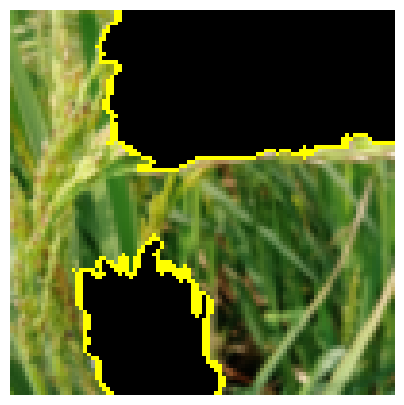

In [128]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (428).jpg'
images = read_and_transform_img(url)

if images is not None:
    # Make predictions using the model
    preds = mobinet_example_model.predict(images)
    prediction = np.argmax(preds)
    confidence = np.max(preds)
    print(f"Predicted class: {prediction}, Confidence: {preds}")
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

# Make sure to pass your own prediction function here
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=1, hide_color=0, num_samples=5000)

from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(mark_boundaries(temp, mask))
ax.axis('off')


In [87]:
mobinet_example_model = MOBINET(
    optimizer='sgd',neurons=512, batch_size=64, epochs=5, activation='tanh',patience=19
)

Epoch 1/5
11/11 [==============================] - 14s 519ms/step - loss: 0.2031 - accuracy: 0.9676
Epoch 2/5
11/11 [==============================] - 6s 573ms/step - loss: 0.0814 - accuracy: 0.9912
Epoch 3/5
11/11 [==============================] - 6s 528ms/step - loss: 0.0661 - accuracy: 0.9926
Epoch 4/5
11/11 [==============================] - 6s 553ms/step - loss: 0.0558 - accuracy: 0.9926
Epoch 5/5
11/11 [==============================] - 5s 451ms/step - loss: 0.0421 - accuracy: 0.9941
